CD1_(/km^2)	0.335-0.999 mm

CD2_(/km^2)	1.00-4.75 mm

CD3_(/km^2)	4.75-200 mm

CD4_(/km^2) >200 mm

WD1_(g/km^2) 0.335-0.999 mm

WD2_(g/km^2) 1.00-4.75 mm

WD3_(g/km^2) 4.75-200 mm
		
WD4_(g/km^2) >200 mm			

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 287 entries, 2007-09-16 to 2013-08-07
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Count_Density_Class2Plastic  287 non-null    float64       
 1   Date                         287 non-null    datetime64[ns]
 2   Moving_Average_9             279 non-null    float64       
 3   Moving_Average_21            267 non-null    float64       
 4   Moving_Average_36            252 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 13.5 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 287 entries, 2007-09-16 to 2013-08-07
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       -------

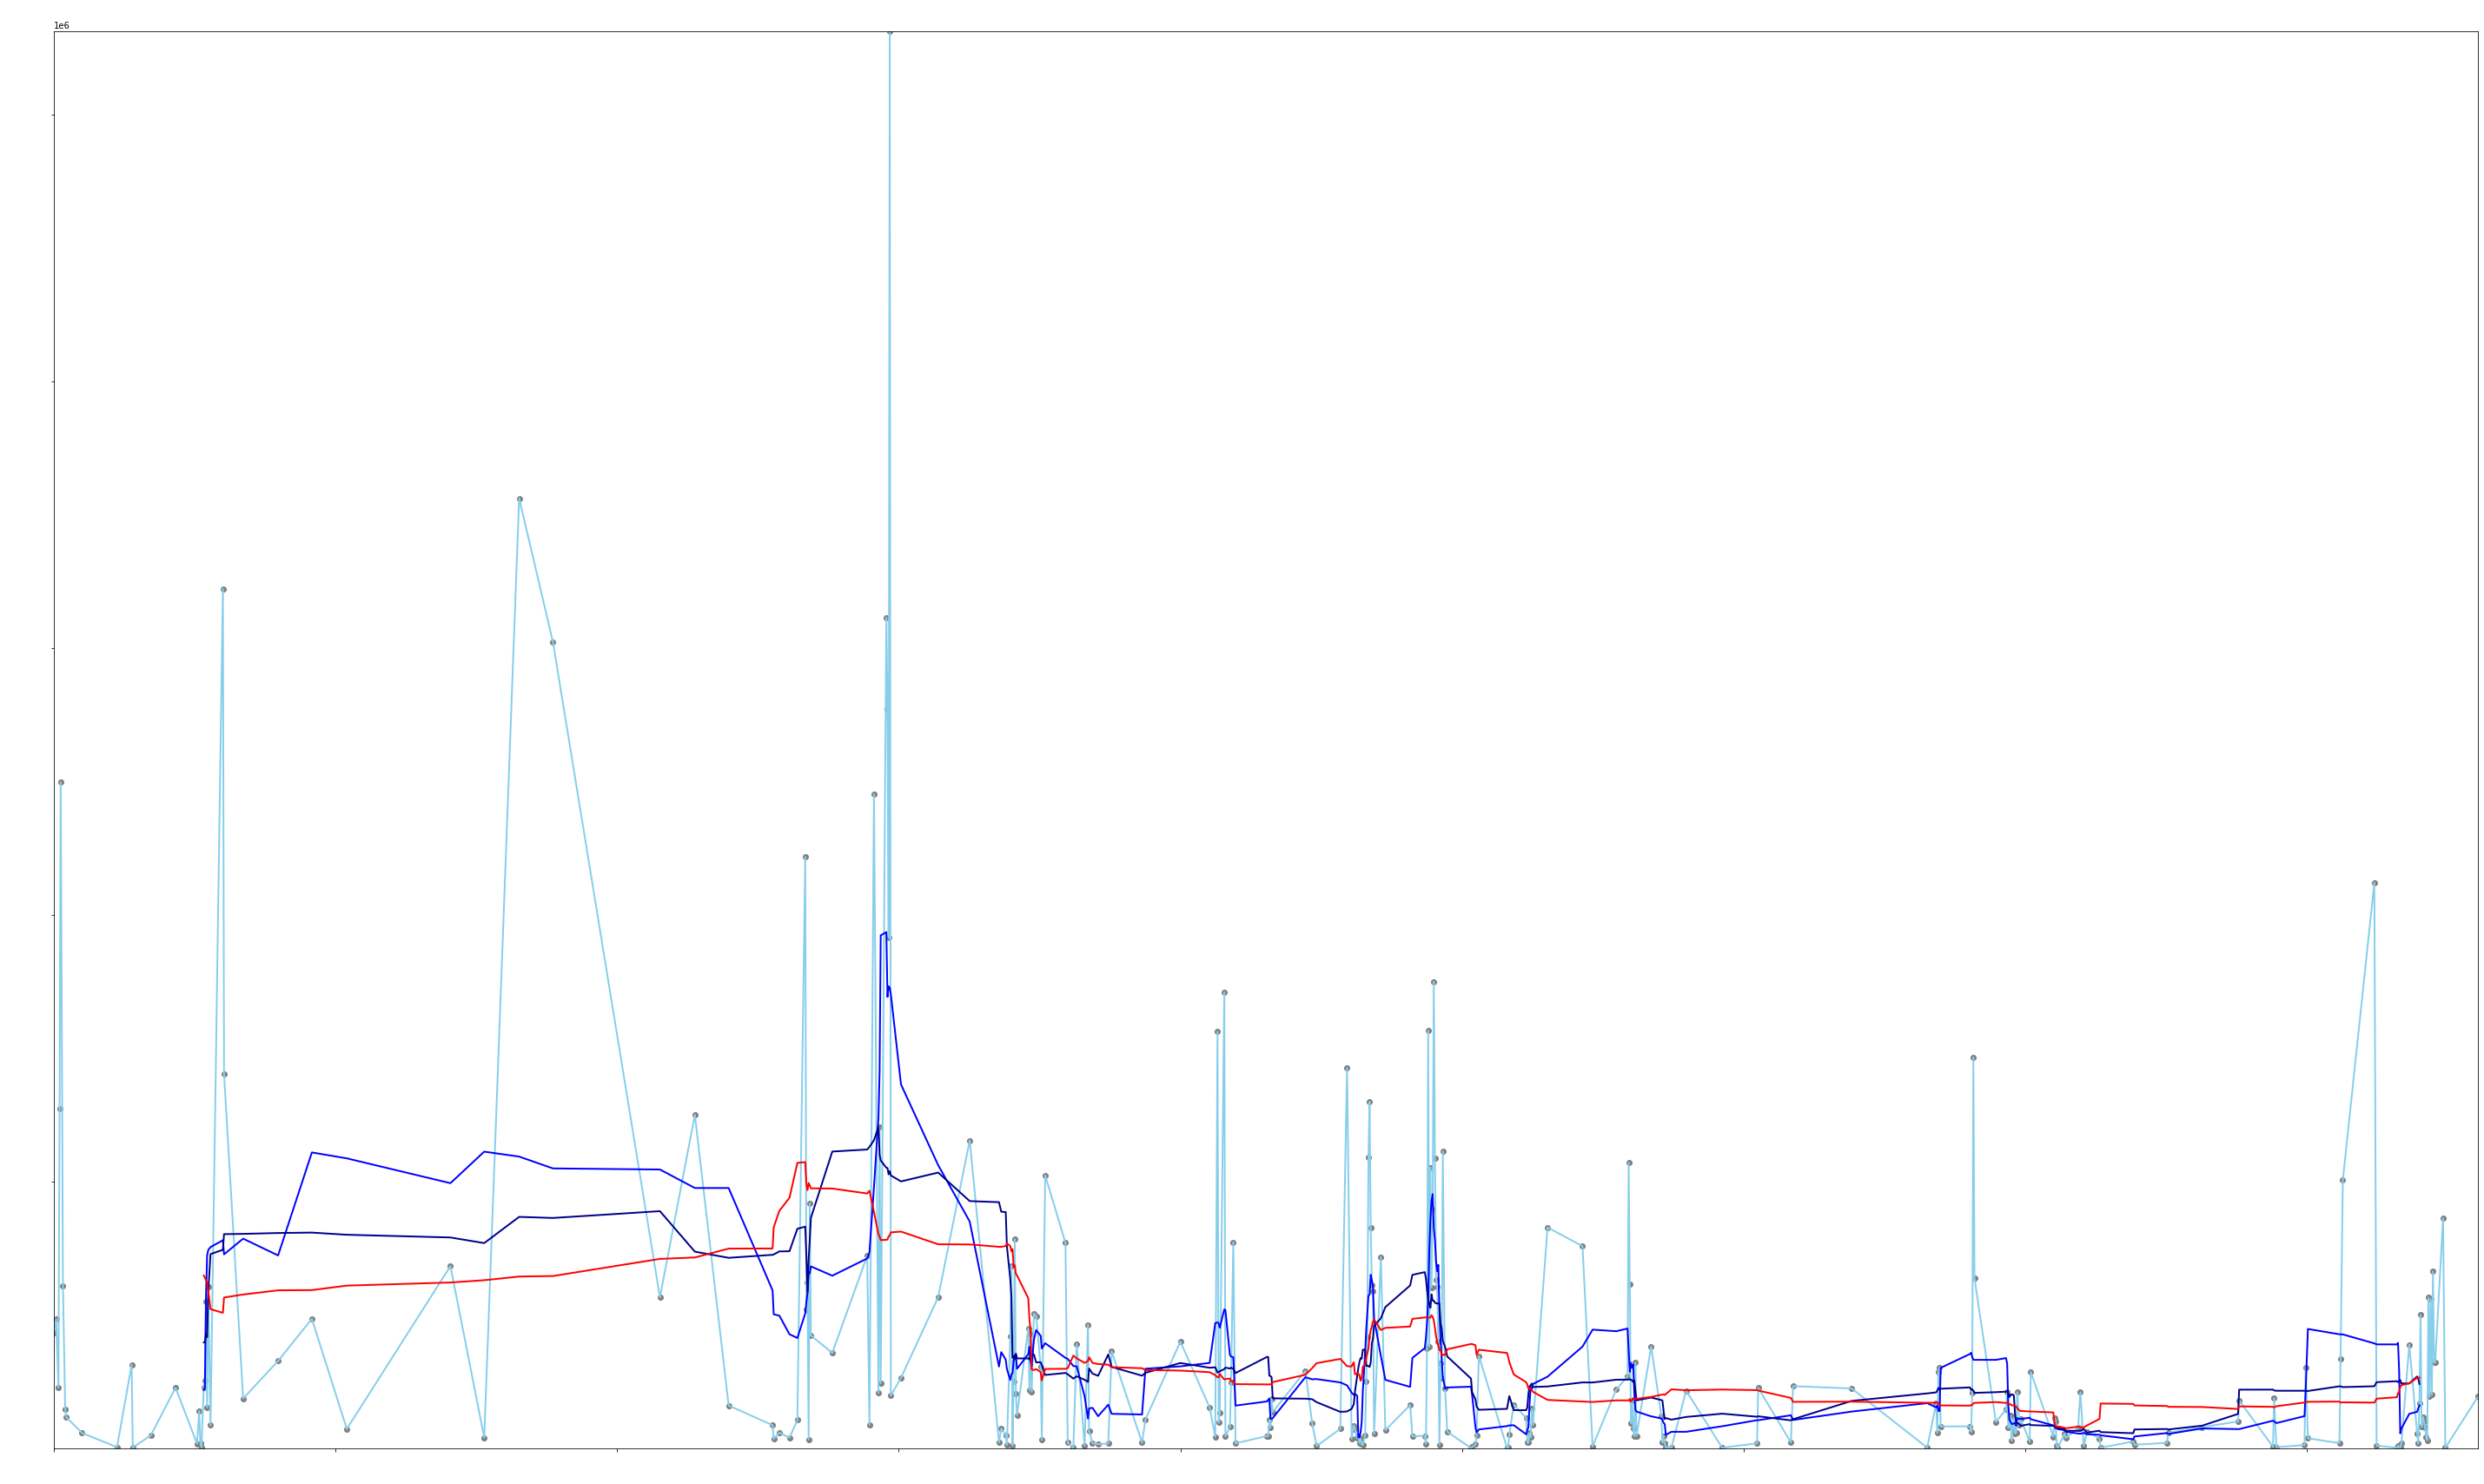

In [0]:
import pandas as pd

from google.colab import drive

drive.mount('/content/gdrive/')
pollution_data = pd.read_csv('/content/gdrive/My Drive/AI_NoteBook/PROJECT/Import_File/PlasticMarinePollutionDataset.csv')

########## [PREPROCESSING] ##########
pollution_data.rename(columns = {'CD1_(/km^2)' : 'Count_Density_Class1Plastic'}, inplace = True)
pollution_data.rename(columns = {'CD2_(/km^2)' : 'Count_Density_Class2Plastic'}, inplace = True)
pollution_data.rename(columns = {'CD3_(/km^2)' : 'Count_Density_Class3Plastic'}, inplace = True)
pollution_data.rename(columns = {'CD4 _(/km^2)' : 'Count_Density_Class4Plastic'}, inplace = True)

pollution_data.rename(columns = {'WD1_(g/km^2)' : 'Weight_Density_Class1Plastic'}, inplace = True)
pollution_data.rename(columns = {'WD2_(g/km^2)' : 'Weight_Density_Class2Plastic'}, inplace = True)
pollution_data.rename(columns = {'WD3_(g/km^2)' : 'Weight_Density_Class3Plastic'}, inplace = True)
pollution_data.rename(columns = {'WD4_(g/km^2)' : 'Weight_Density_Class4Plastic'}, inplace = True)

pollution_data['Count_Density_Class1Plastic'] = pollution_data.Count_Density_Class1Plastic.str.replace(' ', '')
pollution_data['Count_Density_Class2Plastic'] = pollution_data.Count_Density_Class2Plastic.str.replace(' ', '')
pollution_data['Count_Density_Class3Plastic'] = pollution_data.Count_Density_Class3Plastic.str.replace(' ', '')
pollution_data['Weight_Density_Class2Plastic'] = pollution_data.Weight_Density_Class2Plastic.str.replace(' ', '')
pollution_data['Weight_Density_Class3Plastic'] = pollution_data.Weight_Density_Class3Plastic.str.replace(' ', '')
pollution_data['Weight_Density_Class4Plastic'] = pollution_data.Weight_Density_Class4Plastic.str.replace(' ', '')

pollution_data['Count_Density_Class1Plastic'] = pollution_data.Count_Density_Class1Plastic.str.replace(',', '').astype(float)
pollution_data['Count_Density_Class2Plastic'] = pollution_data.Count_Density_Class2Plastic.str.replace(',', '').astype(float)
pollution_data['Count_Density_Class3Plastic'] = pollution_data.Count_Density_Class3Plastic.str.replace(',', '').astype(float)
pollution_data['Weight_Density_Class2Plastic'] = pollution_data.Weight_Density_Class2Plastic.str.replace(',', '').astype(float)
pollution_data['Weight_Density_Class3Plastic'] = pollution_data.Weight_Density_Class3Plastic.str.replace(',', '').astype(float)
pollution_data['Weight_Density_Class4Plastic'] = pollution_data.Weight_Density_Class4Plastic.str.replace(',', '').astype(float)

pollution_data = pollution_data.drop_duplicates(keep = 'first')

pollution_data['Data'] = pollution_data.Date.astype(str)

pollution_data_2 = pollution_data[['Date','Count_Density_Class2Plastic']]

pollution_data_2 = pollution_data_2.dropna(how = 'any')

########## [REMOVE ZEROS] #########
pollution_data_2 = pollution_data_2.drop(index = pollution_data_2[pollution_data_2['Count_Density_Class2Plastic'] == 0].index)

pollution_data_2['Date'] = pd.to_datetime(pollution_data_2.Date)

pollution_data_2_GroupByDate = pollution_data_2.groupby('Date').Count_Density_Class2Plastic.sum()

pollution_data_2_GroupByDate = pd.DataFrame(pollution_data_2_GroupByDate)

pollution_data_2_GroupByDate ['Date'] = pollution_data_2_GroupByDate.index

######### [MOVING AVERAGES APPROACH] ##########
pollution_data_2_GroupByDate ['Moving_Average_9'] = pollution_data_2_GroupByDate.Count_Density_Class2Plastic.rolling(9, center=True).mean()
pollution_data_2_GroupByDate ['Moving_Average_21'] = pollution_data_2_GroupByDate.Count_Density_Class2Plastic.rolling(21, center=True).mean()
pollution_data_2_GroupByDate ['Moving_Average_36'] = pollution_data_2_GroupByDate.Count_Density_Class2Plastic.rolling(36, center=True).mean()

pollution_data_2_GroupByDate.info()
pollution_data_2_GroupByDate.shape
pollution_data_2_GroupByDate.head(254)

startdate = pd.to_datetime('2007/09/16')

pollution_data_2_GroupByDate ['Days after 2007-09-16'] = (pollution_data_2_GroupByDate.Date).subtract(startdate)

pollution_data_2_GroupByDate ['Days after 2007-09-16']  = pollution_data_2_GroupByDate['Days after 2007-09-16'].astype(str)

pollution_data_2_GroupByDate ['Days after 2007-09-16'] = pollution_data_2_GroupByDate ['Days after 2007-09-16'].str.replace(' days 00:00:00.000000000', '')

pollution_data_2_GroupByDate.info()
pollution_data_2_GroupByDate.head(254)


X_original = pollution_data_2_GroupByDate ['Days after 2007-09-16'].astype(float)
y_original = pollution_data_2_GroupByDate ['Count_Density_Class2Plastic']

pollution_data_2_GroupByDate_moving_average_9 = pollution_data_2_GroupByDate.dropna(how='any')
#print (pollution_data_1_GroupByDate_moving_average_9.head(50)) 
X_moving_average_9 = pollution_data_2_GroupByDate_moving_average_9 ['Days after 2007-09-16'].astype(float)
y_moving_average_9 = pollution_data_2_GroupByDate_moving_average_9 ['Moving_Average_9']

pollution_data_2_GroupByDate_moving_average_21 = pollution_data_2_GroupByDate.dropna(how='any')
#print (pollution_data_1_GroupByDate_moving_average_9.head(50)) 
X_moving_average_21 = pollution_data_2_GroupByDate_moving_average_21 ['Days after 2007-09-16'].astype(float)
y_moving_average_21 = pollution_data_2_GroupByDate_moving_average_21 ['Moving_Average_21']

pollution_data_2_GroupByDate_moving_average_36 = pollution_data_2_GroupByDate.dropna(how='any')
#print (pollution_data_1_GroupByDate_moving_average_9.head(50)) 
X_moving_average_36 = pollution_data_2_GroupByDate_moving_average_36 ['Days after 2007-09-16'].astype(float)
y_moving_average_36 = pollution_data_2_GroupByDate_moving_average_36 ['Moving_Average_36']

print (X_original)
print (y_original)
print (X_moving_average_9)
print (y_moving_average_9)
print (X_moving_average_21)
print (y_moving_average_21)
print (X_moving_average_36)
print (y_moving_average_36)

import matplotlib.pyplot as plt

########## [PLOT DATAS] ##########
plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.xlim(X_original.min(), X_original.max())
plt.ylim(y_original.min(), y_original.max())

plt.scatter(X_original, y_original, color='gray')
plt.plot(X_original, y_original, color='skyblue', linewidth = '2')

plt.plot(X_moving_average_9, y_moving_average_9, color='blue', linewidth = '2')

plt.plot(X_moving_average_21, y_moving_average_21, color='darkblue', linewidth = '2')

plt.plot(X_moving_average_36, y_moving_average_36, color='red', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

THE REGRESSION WITH DEGREE = 1

Linear Regressor performance:
Mean absolute error =  64503.79
Mean squared error =  9547377829.51
Median absolute error =  52722.89
Explained variance score =  -0.06
R2 score =  -0.07


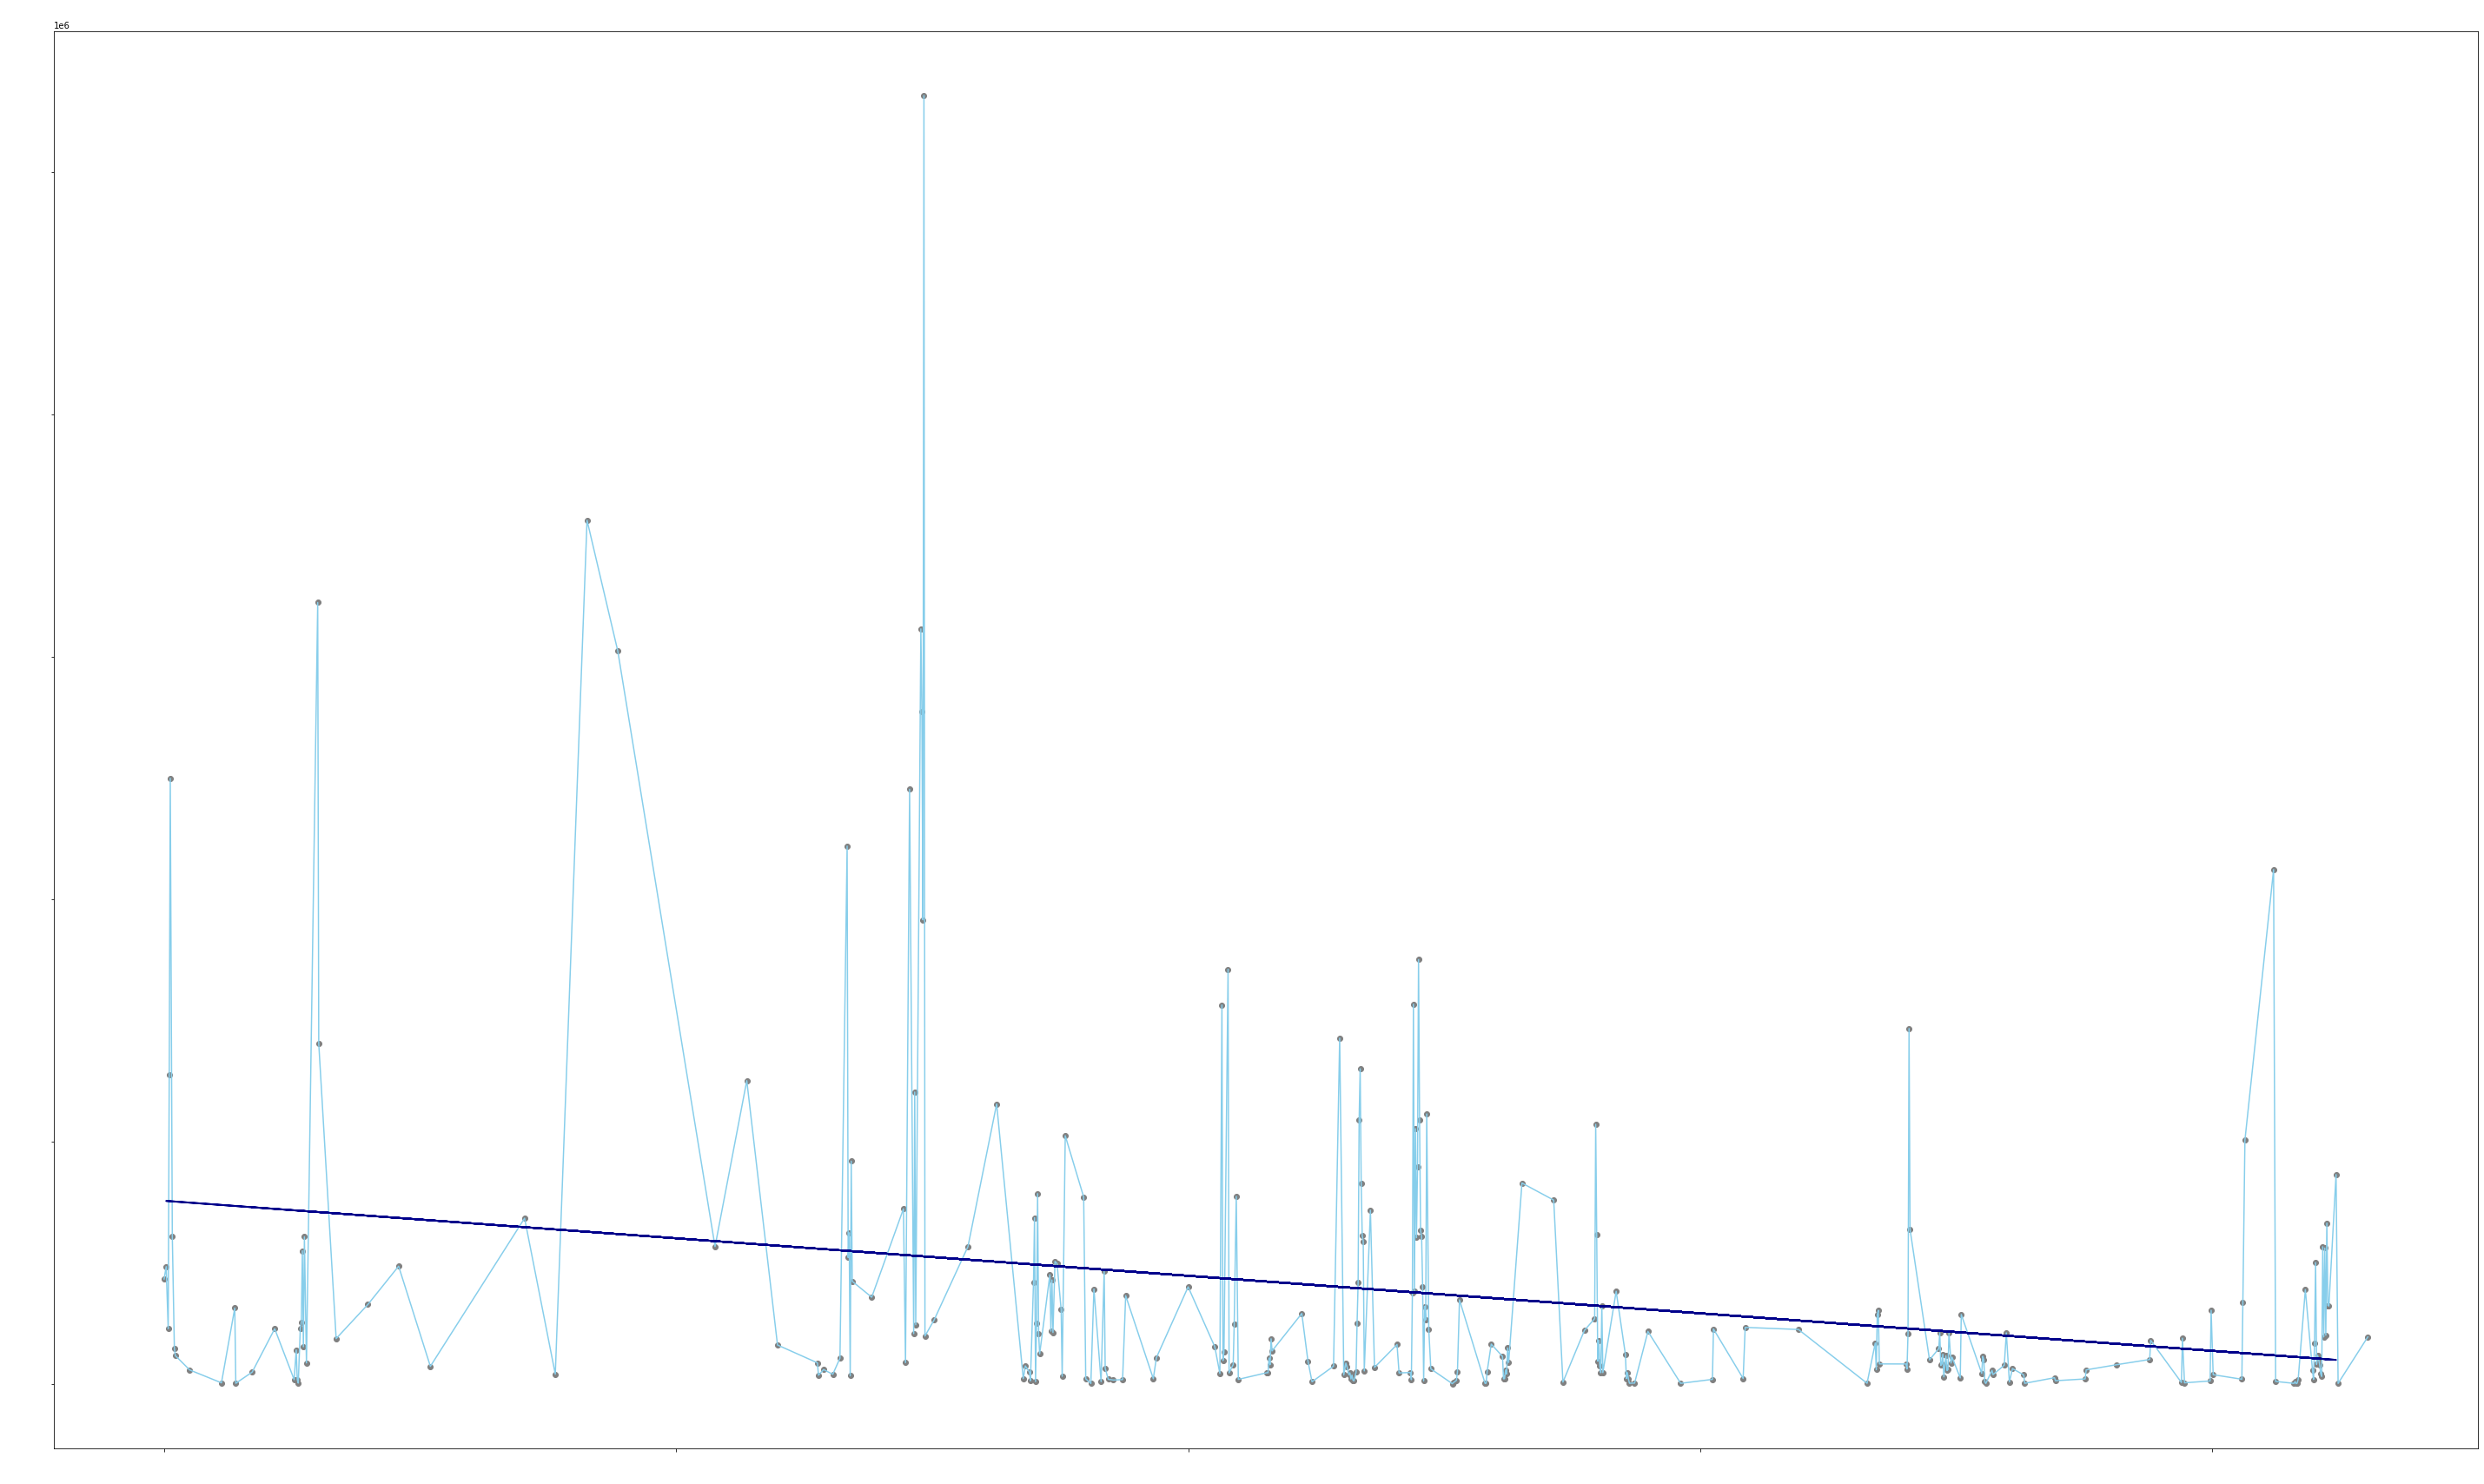

Linear Regressor performance:
Mean absolute error =  51296.44
Mean squared error =  6011278961.71
Median absolute error =  33408.37
Explained variance score =  0.26
R2 score =  0.25


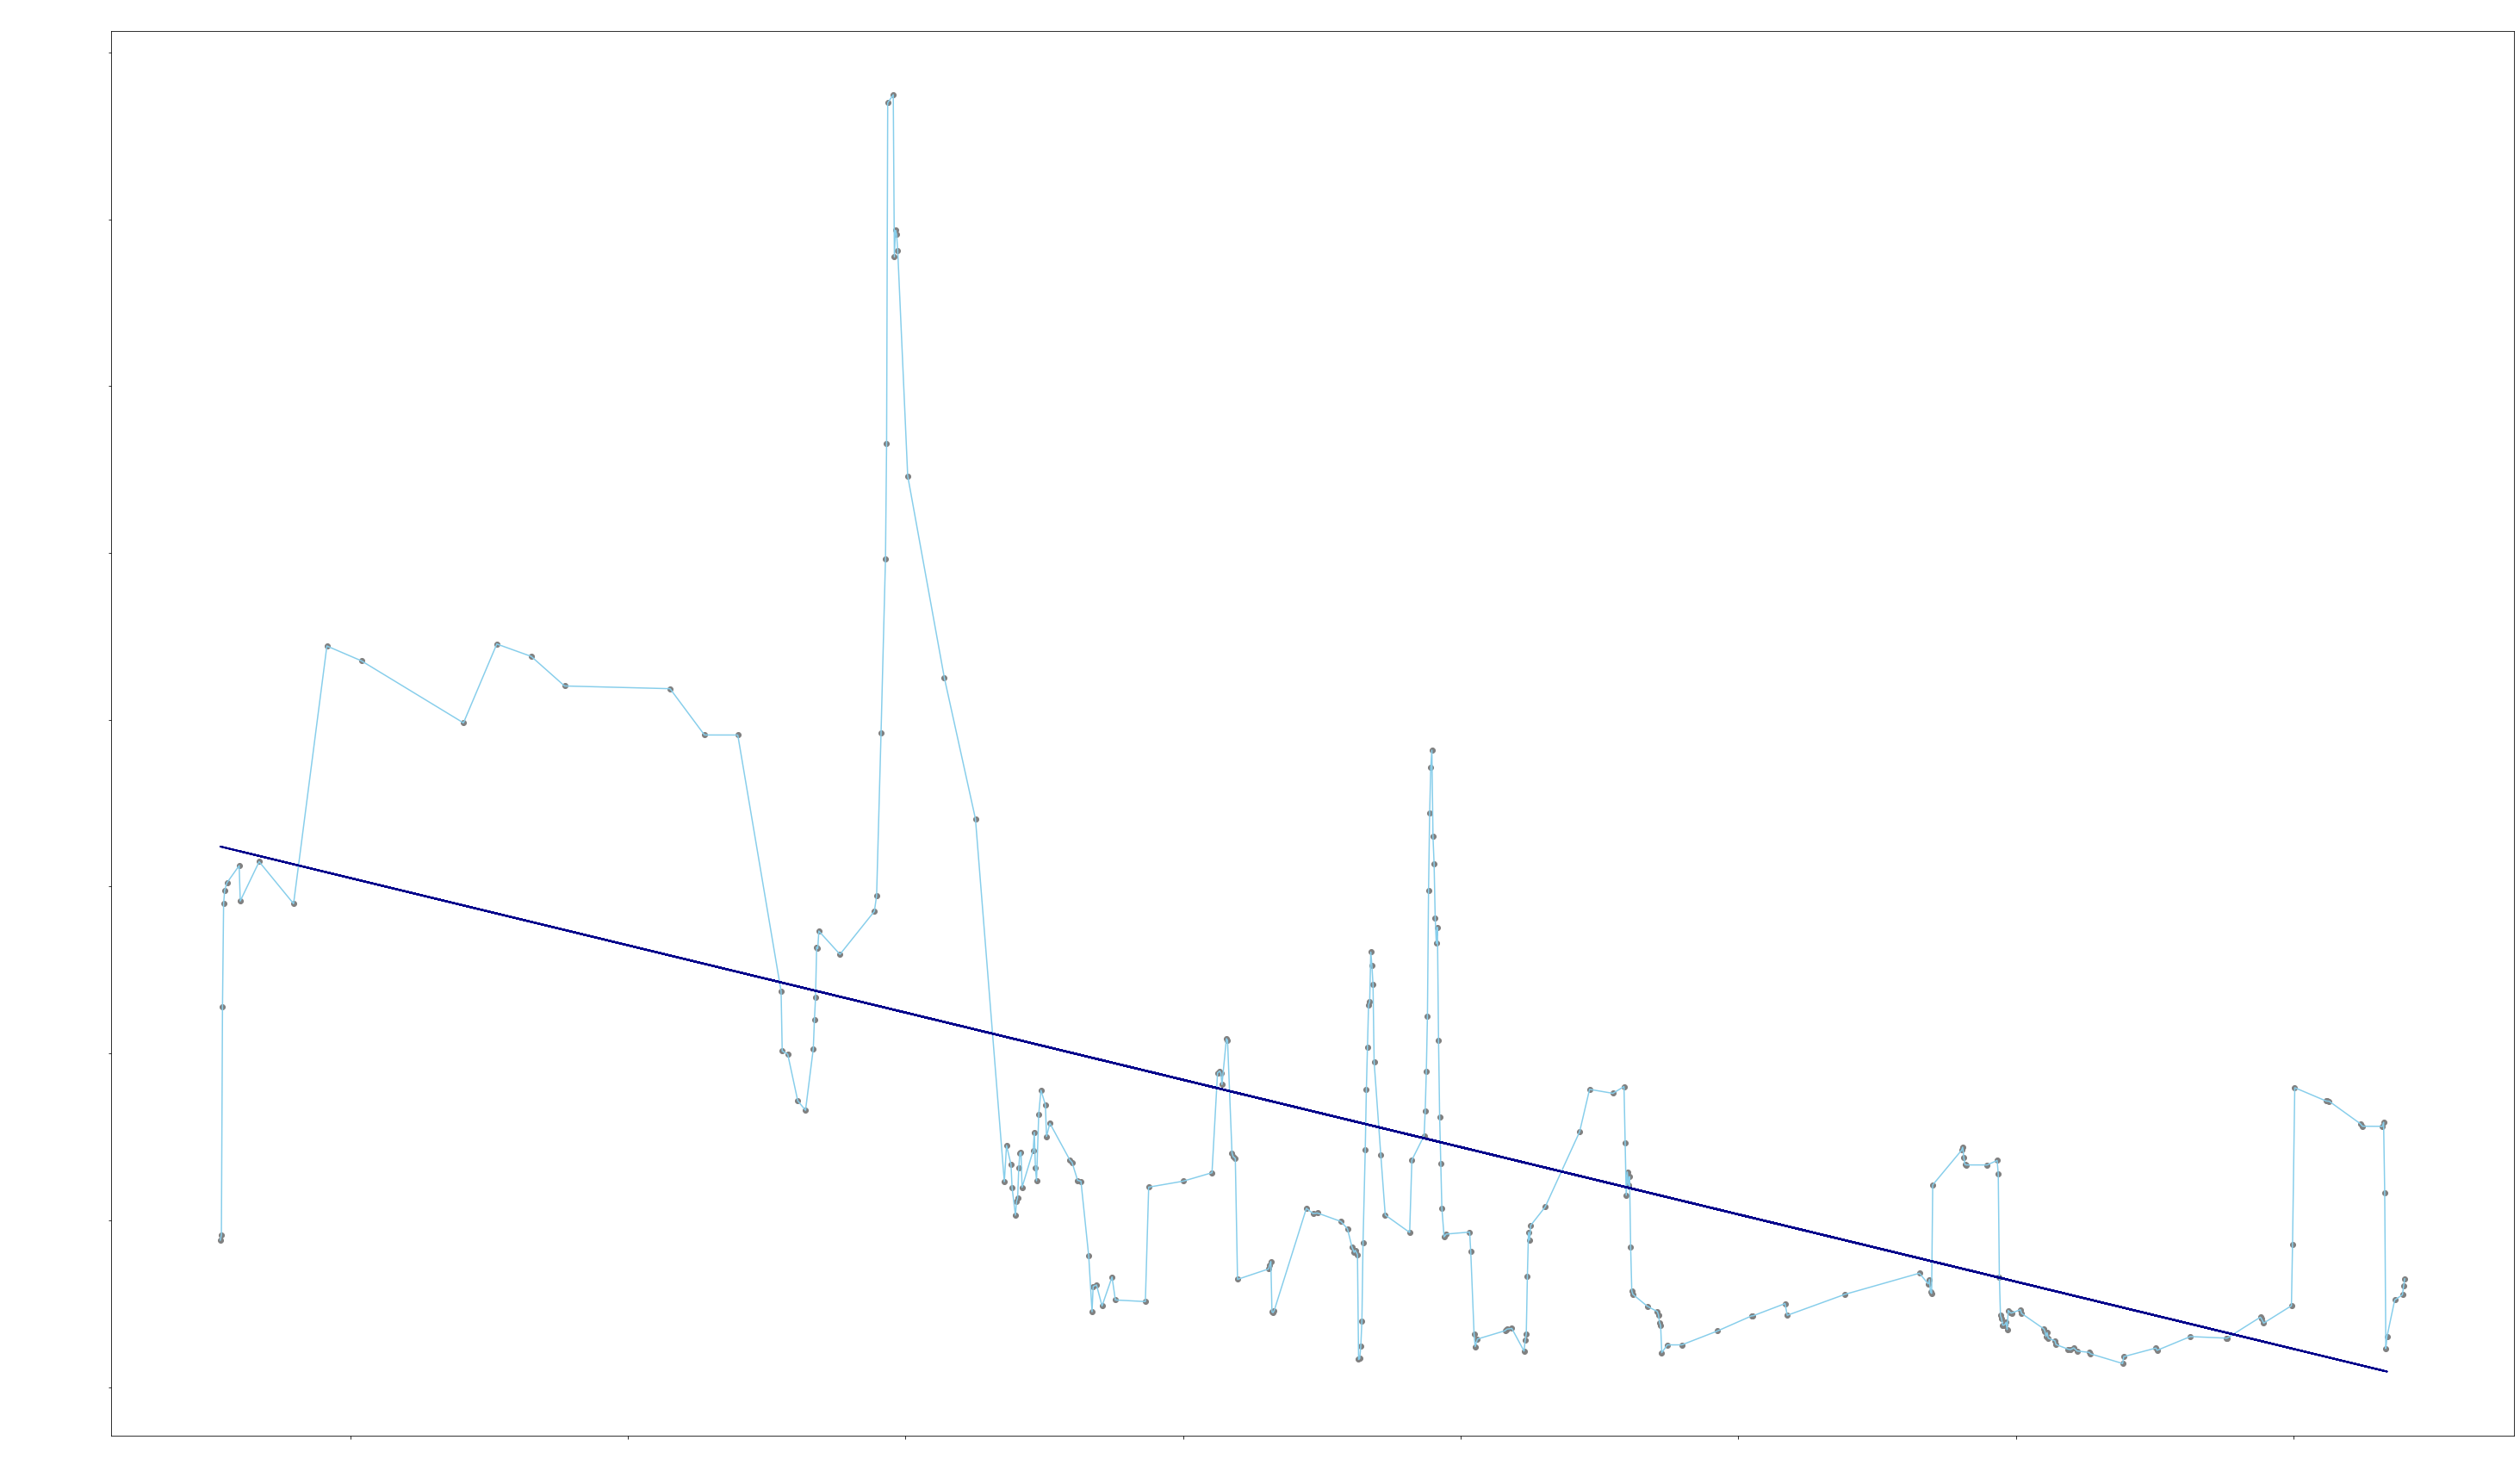

Linear Regressor performance:
Mean absolute error =  36726.74
Mean squared error =  2069953327.21
Median absolute error =  28970.24
Explained variance score =  0.49
R2 score =  0.47


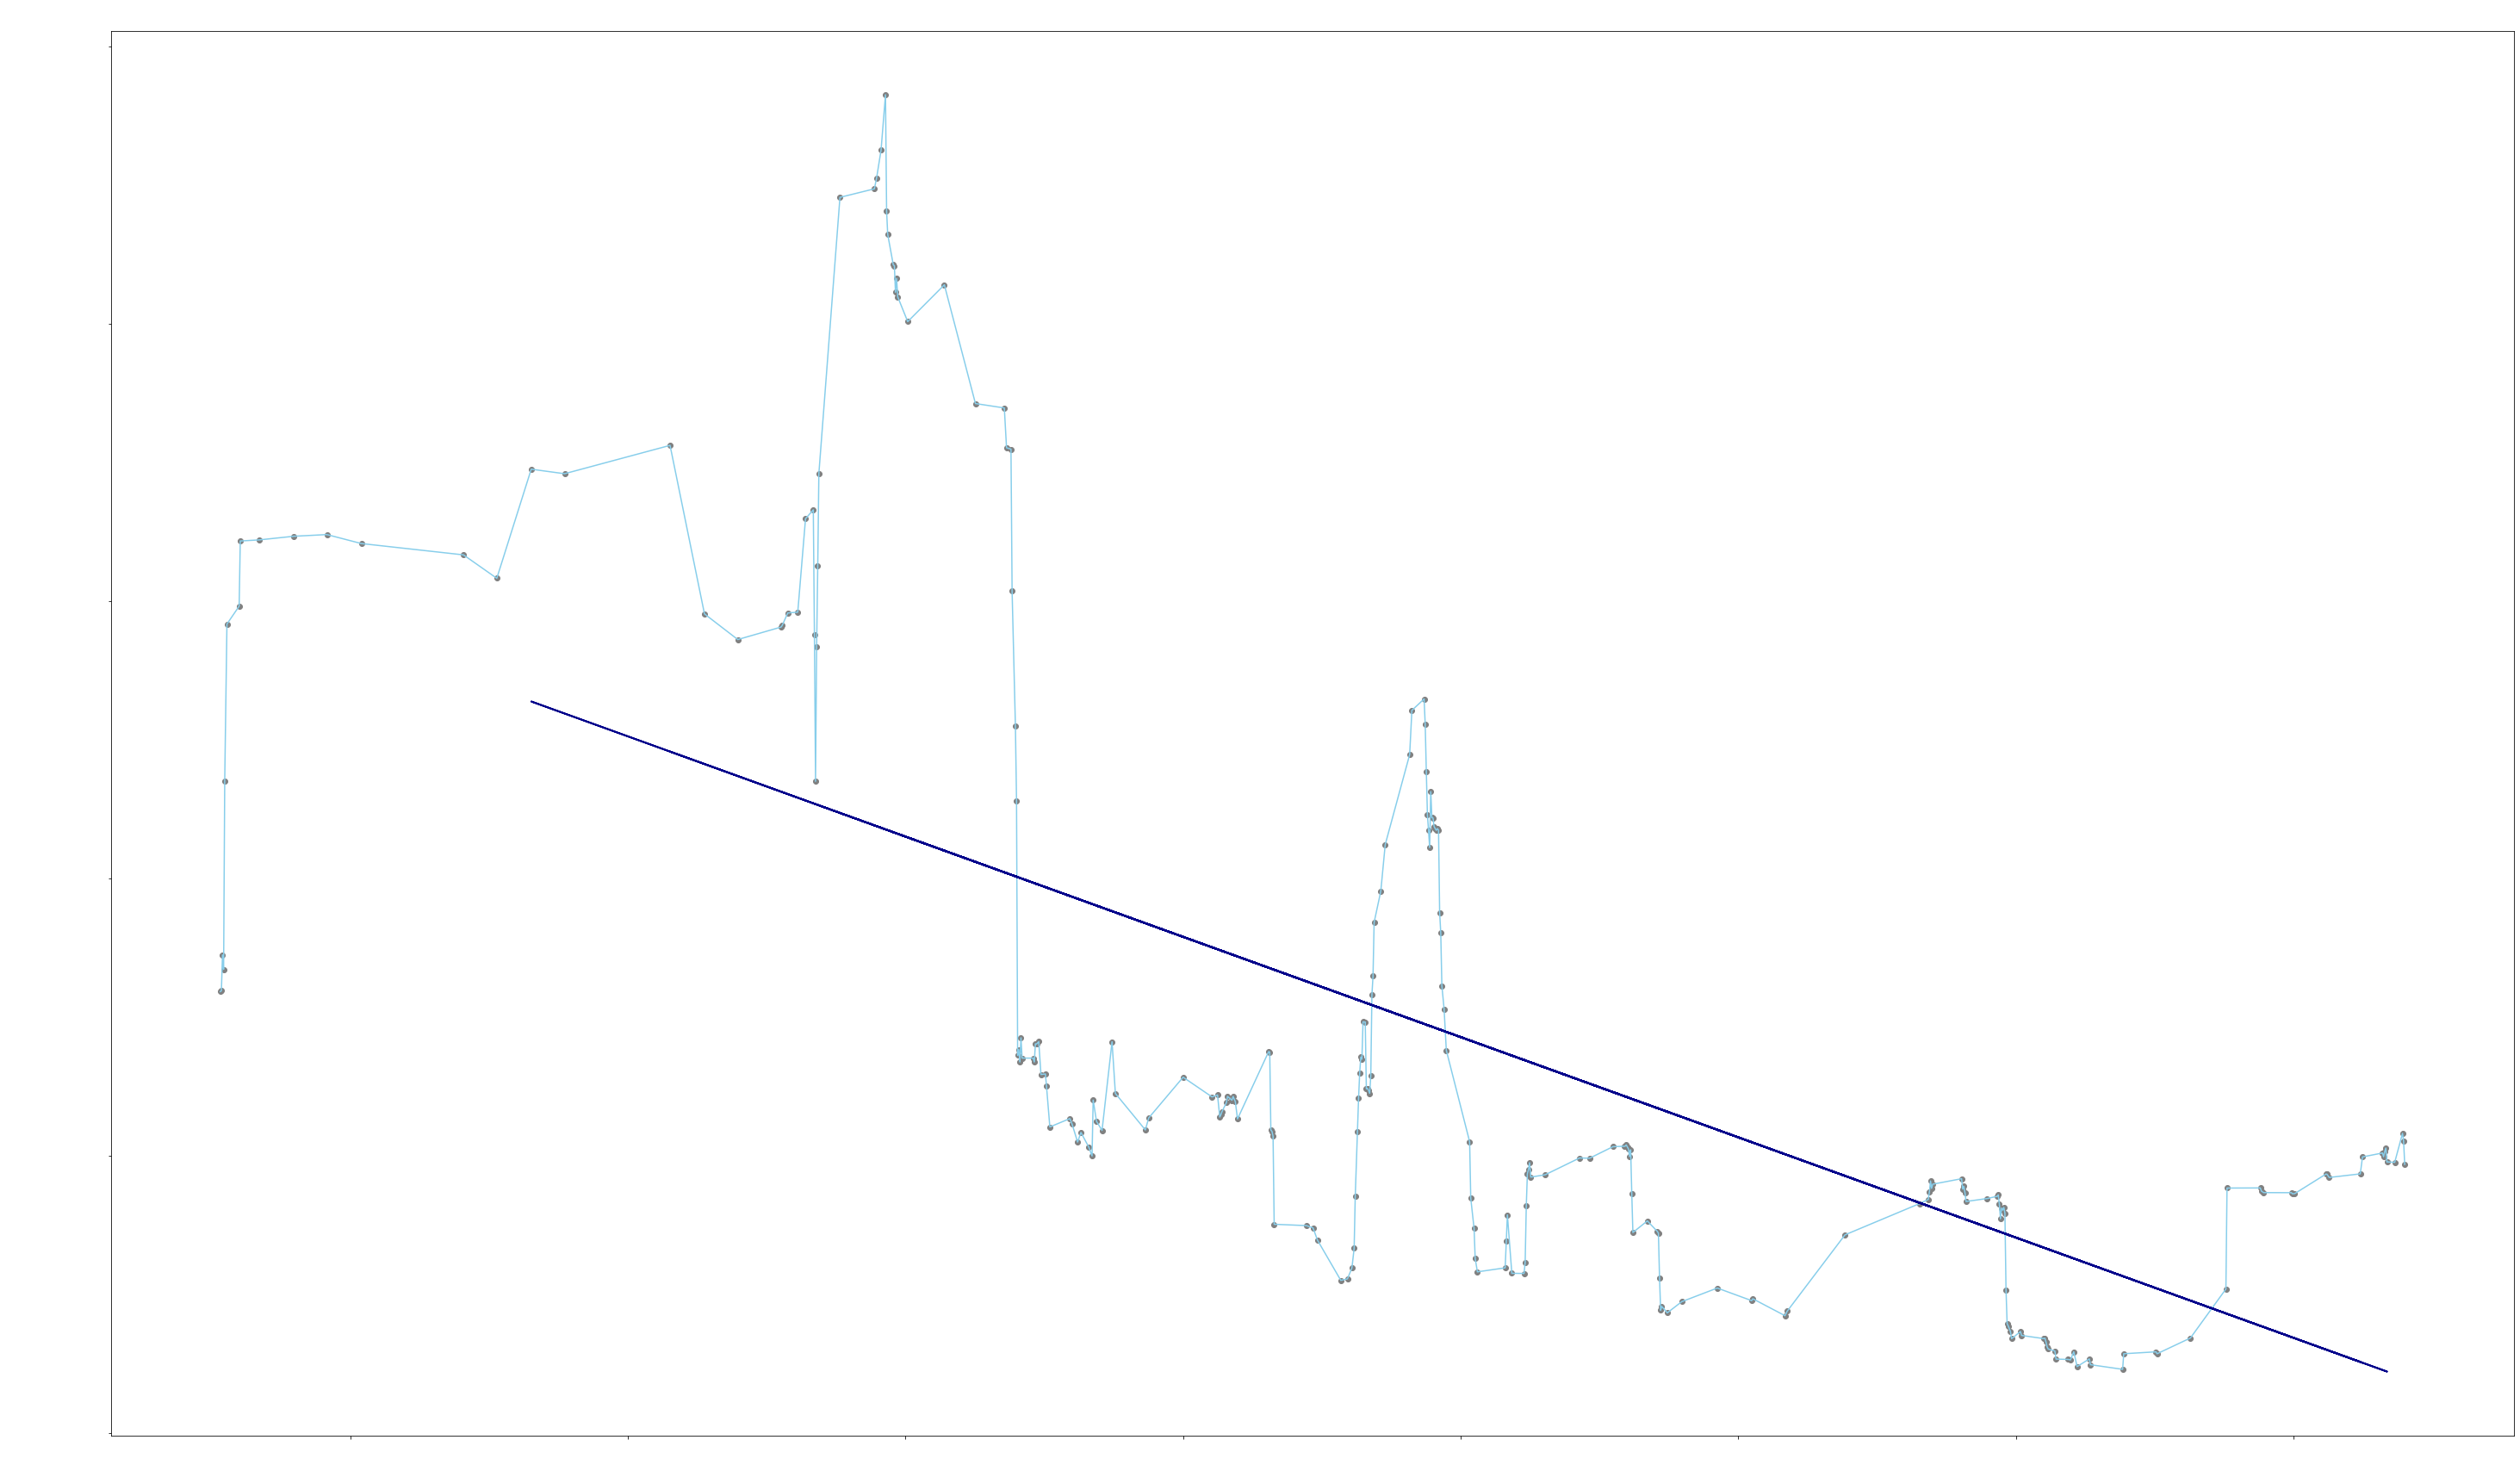

Linear Regressor performance:
Mean absolute error =  26915.97
Mean squared error =  1134041894.92
Median absolute error =  23824.11
Explained variance score =  0.59
R2 score =  0.59


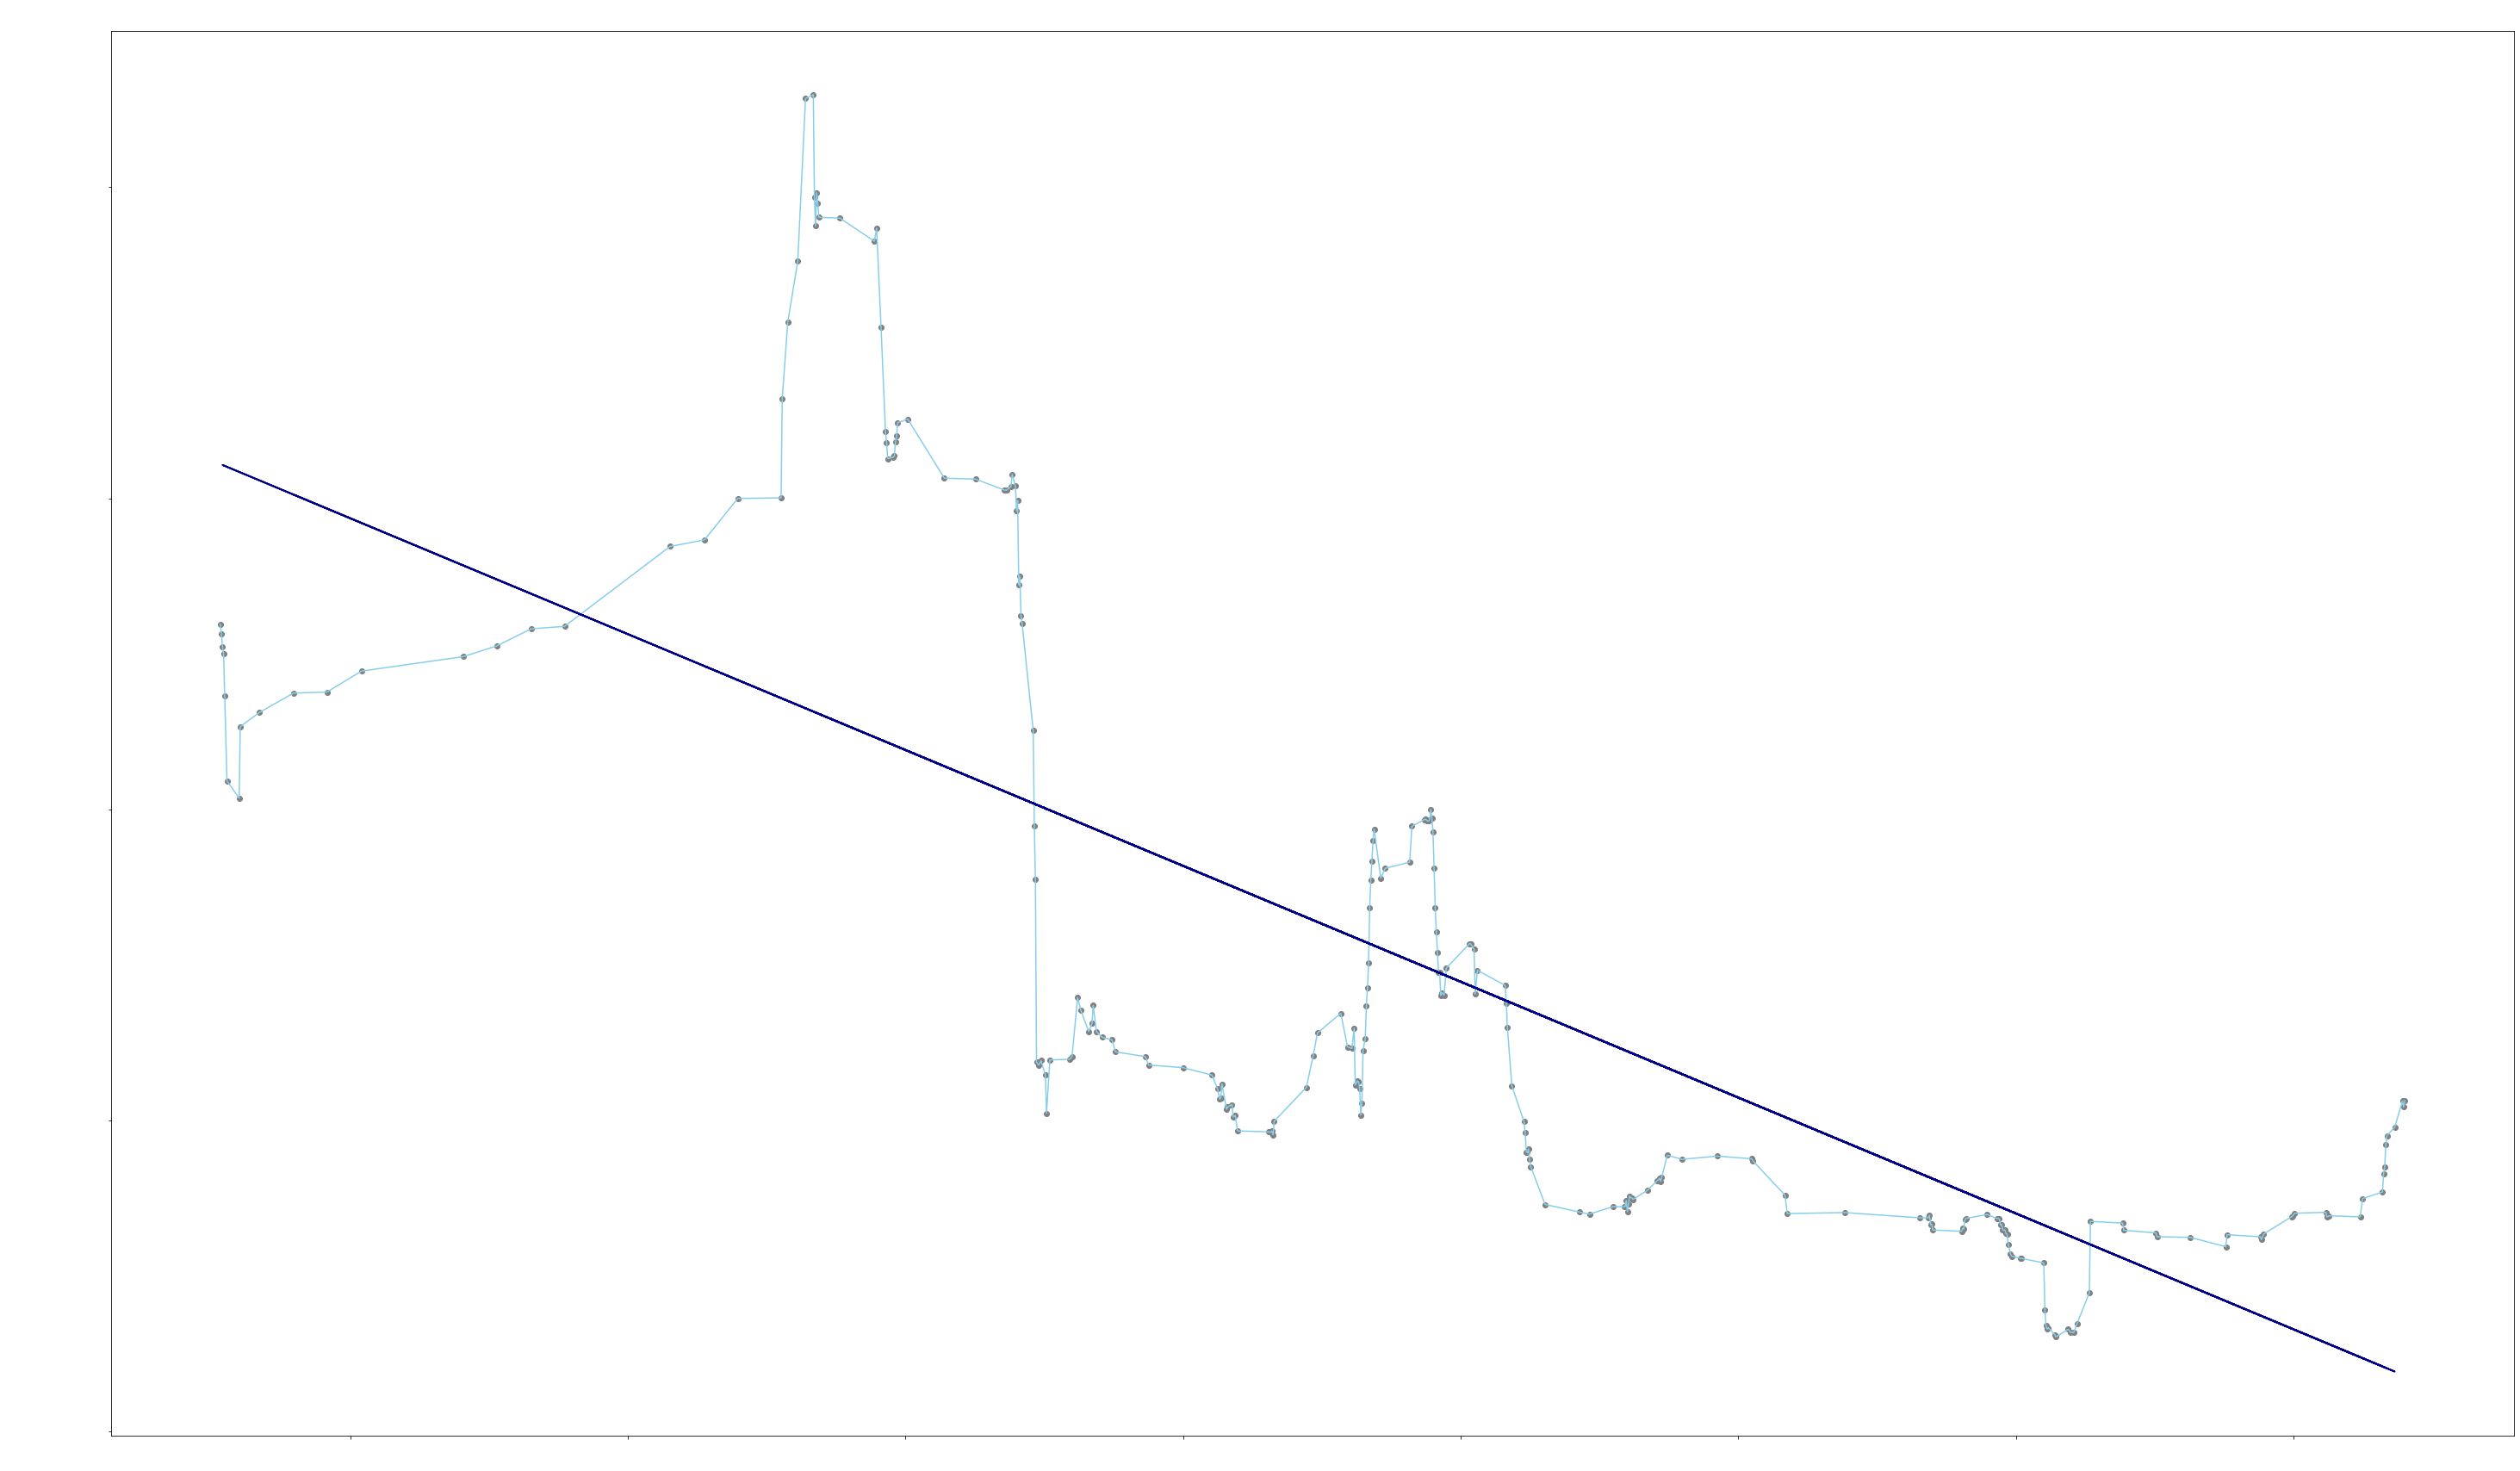

In [0]:
import pickle

import numpy as np
from numpy import array

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_original, y_original, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.to_numpy()

X_test = X_test.reshape(-1,1)

y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 1 > ] ##########
polynomial = PolynomialFeatures(degree=1)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 1 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_original, y_original, color='gray')
plt.plot(X_original, y_original, color='skyblue')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_9, y_moving_average_9, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.to_numpy()

X_test = X_test.reshape(-1,1)

y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 1 > ] ##########
polynomial = PolynomialFeatures(degree=1)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 1 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_9, y_moving_average_9, color='gray')
plt.plot(X_moving_average_9, y_moving_average_9, color='skyblue')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_21, y_moving_average_21, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.to_numpy()

X_test = X_test.reshape(-1,1)

y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 1 > ] ##########
polynomial = PolynomialFeatures(degree=1)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 1 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_21, y_moving_average_21, color='gray')
plt.plot(X_moving_average_21, y_moving_average_21, color='skyblue')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_36, y_moving_average_36, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.to_numpy()

X_test = X_test.reshape(-1,1)

y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 1 > ] ##########
polynomial = PolynomialFeatures(degree=1)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 1 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_36, y_moving_average_36, color='gray')
plt.plot(X_moving_average_36, y_moving_average_36, color='skyblue')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

**THE REGRESSiON WITH DGREE = 3**

Linear Regressor performance:
Mean absolute error =  118447.47
Mean squared error =  30708500768.36
Median absolute error =  84250.9
Explained variance score =  -0.25
R2 score =  -0.26


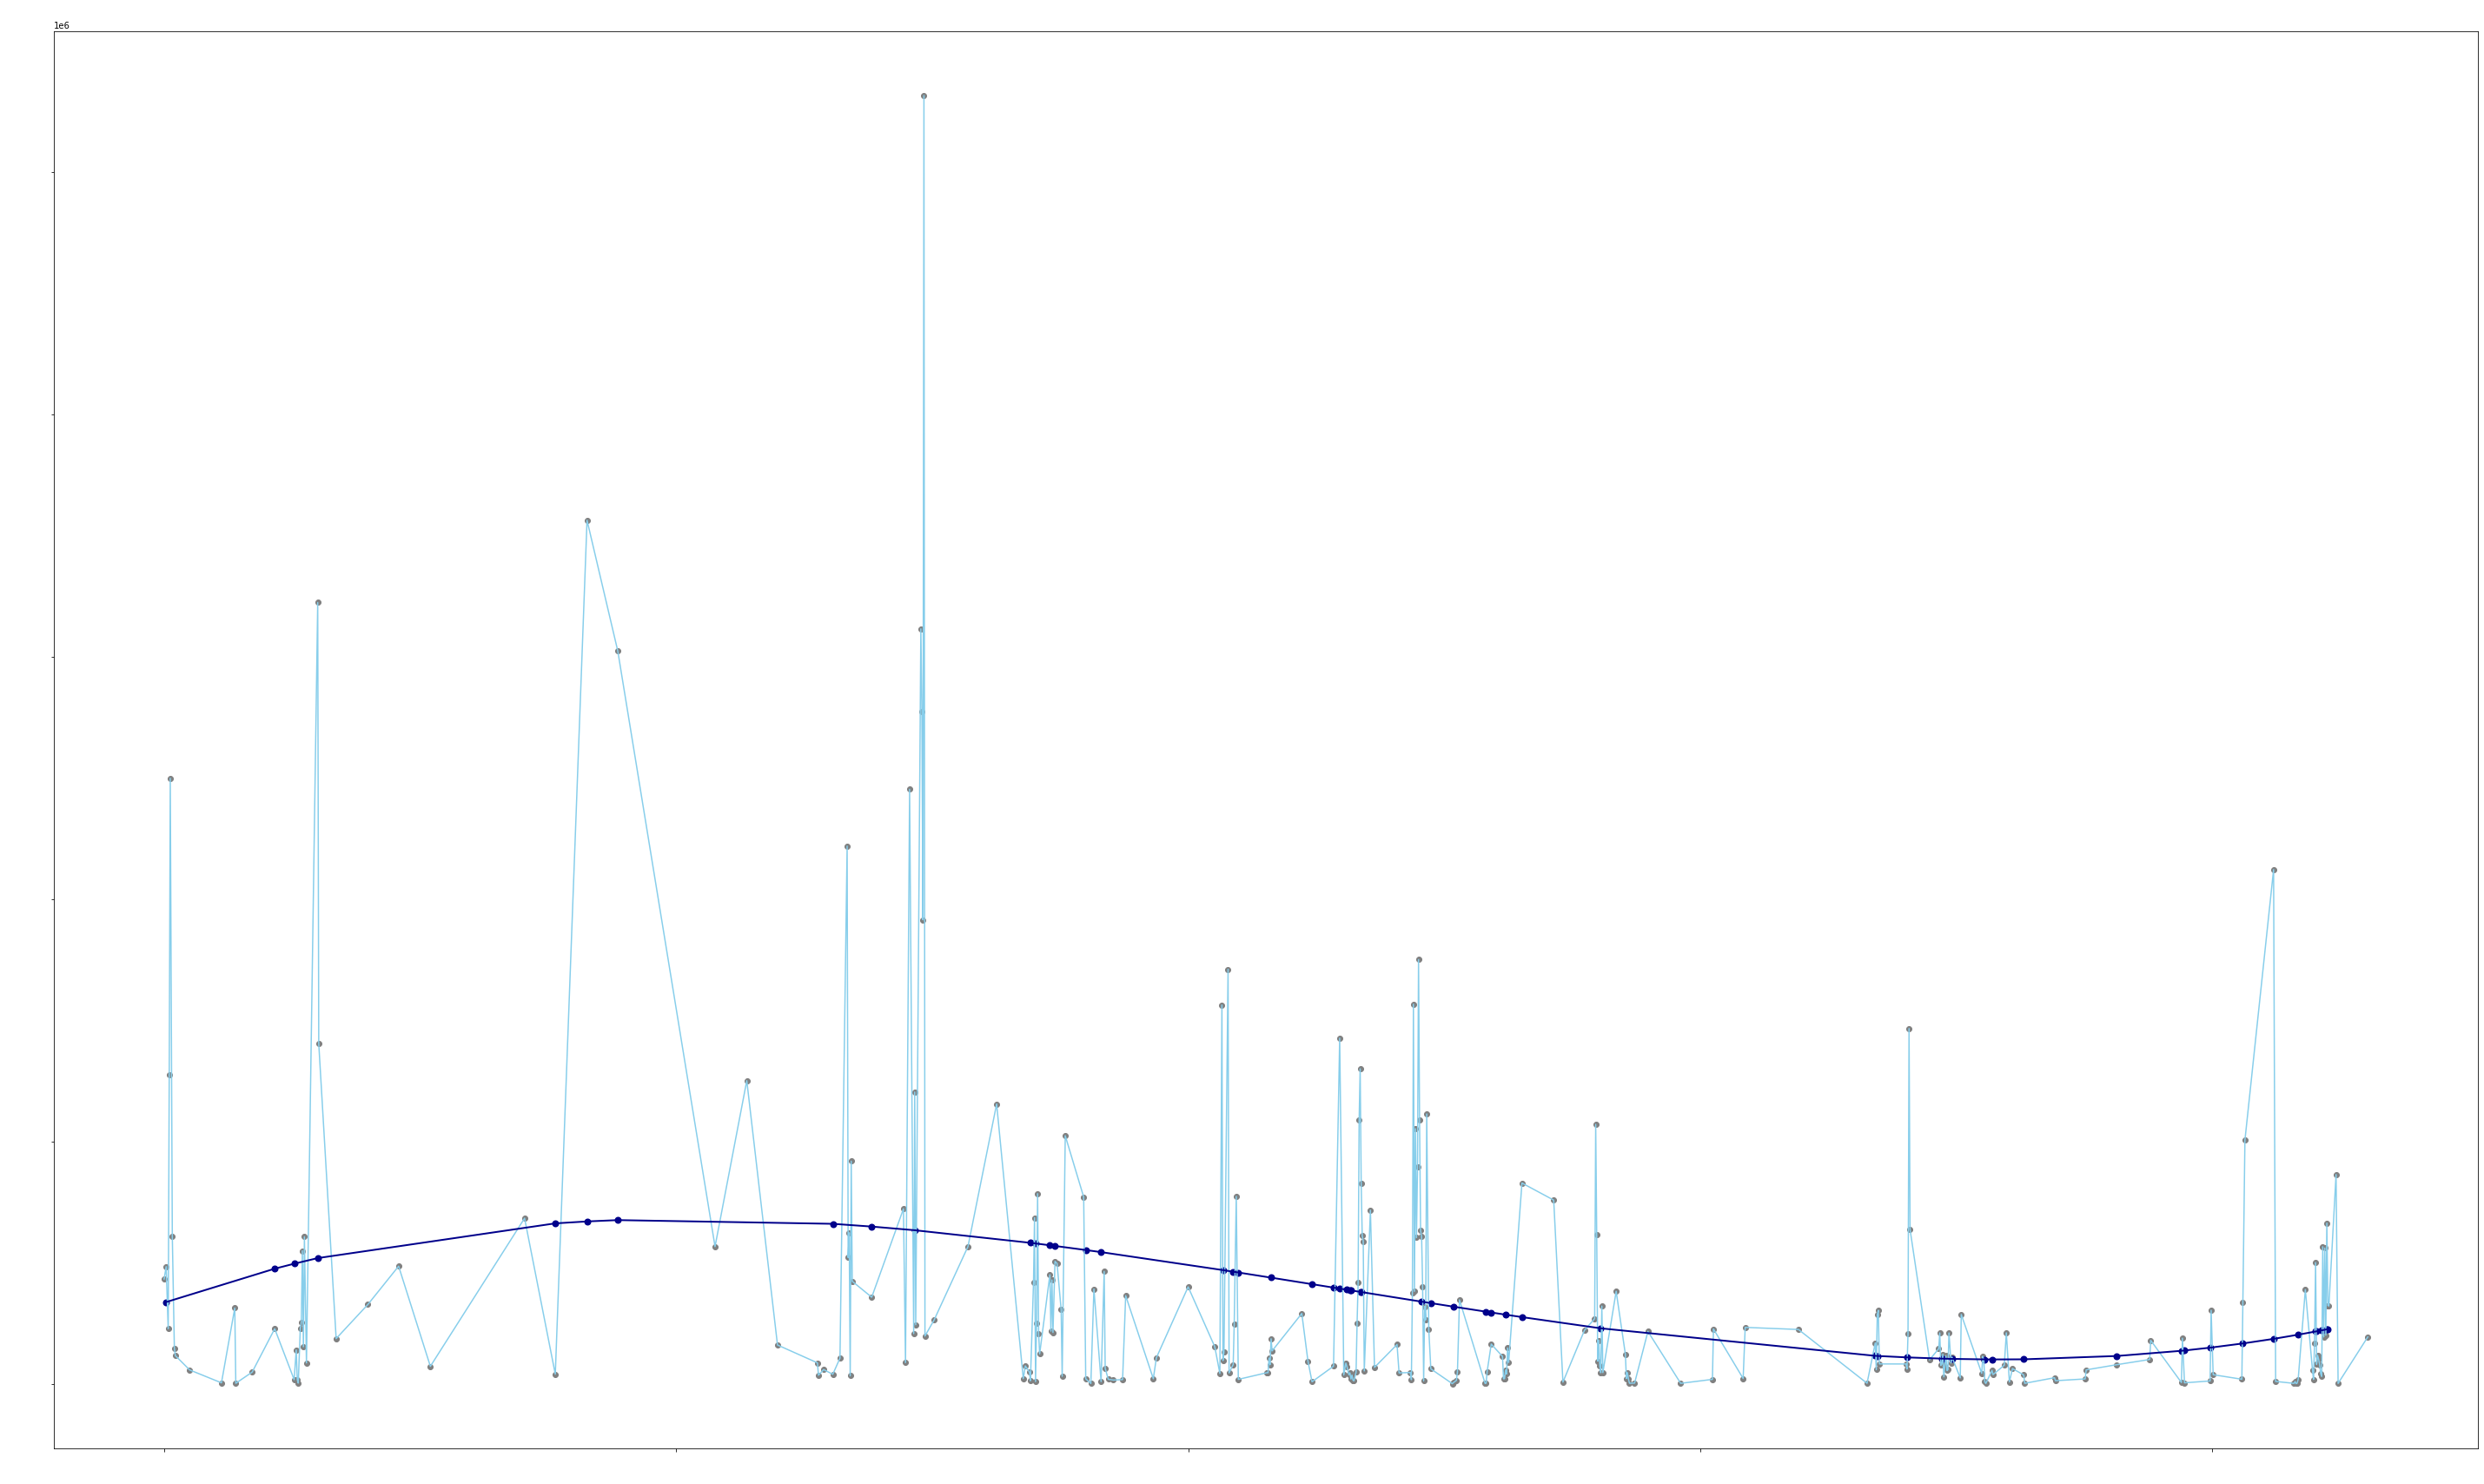

Linear Regressor performance:
Mean absolute error =  89894.06
Mean squared error =  11491404357.93
Median absolute error =  95478.31
Explained variance score =  -0.9
R2 score =  -0.9


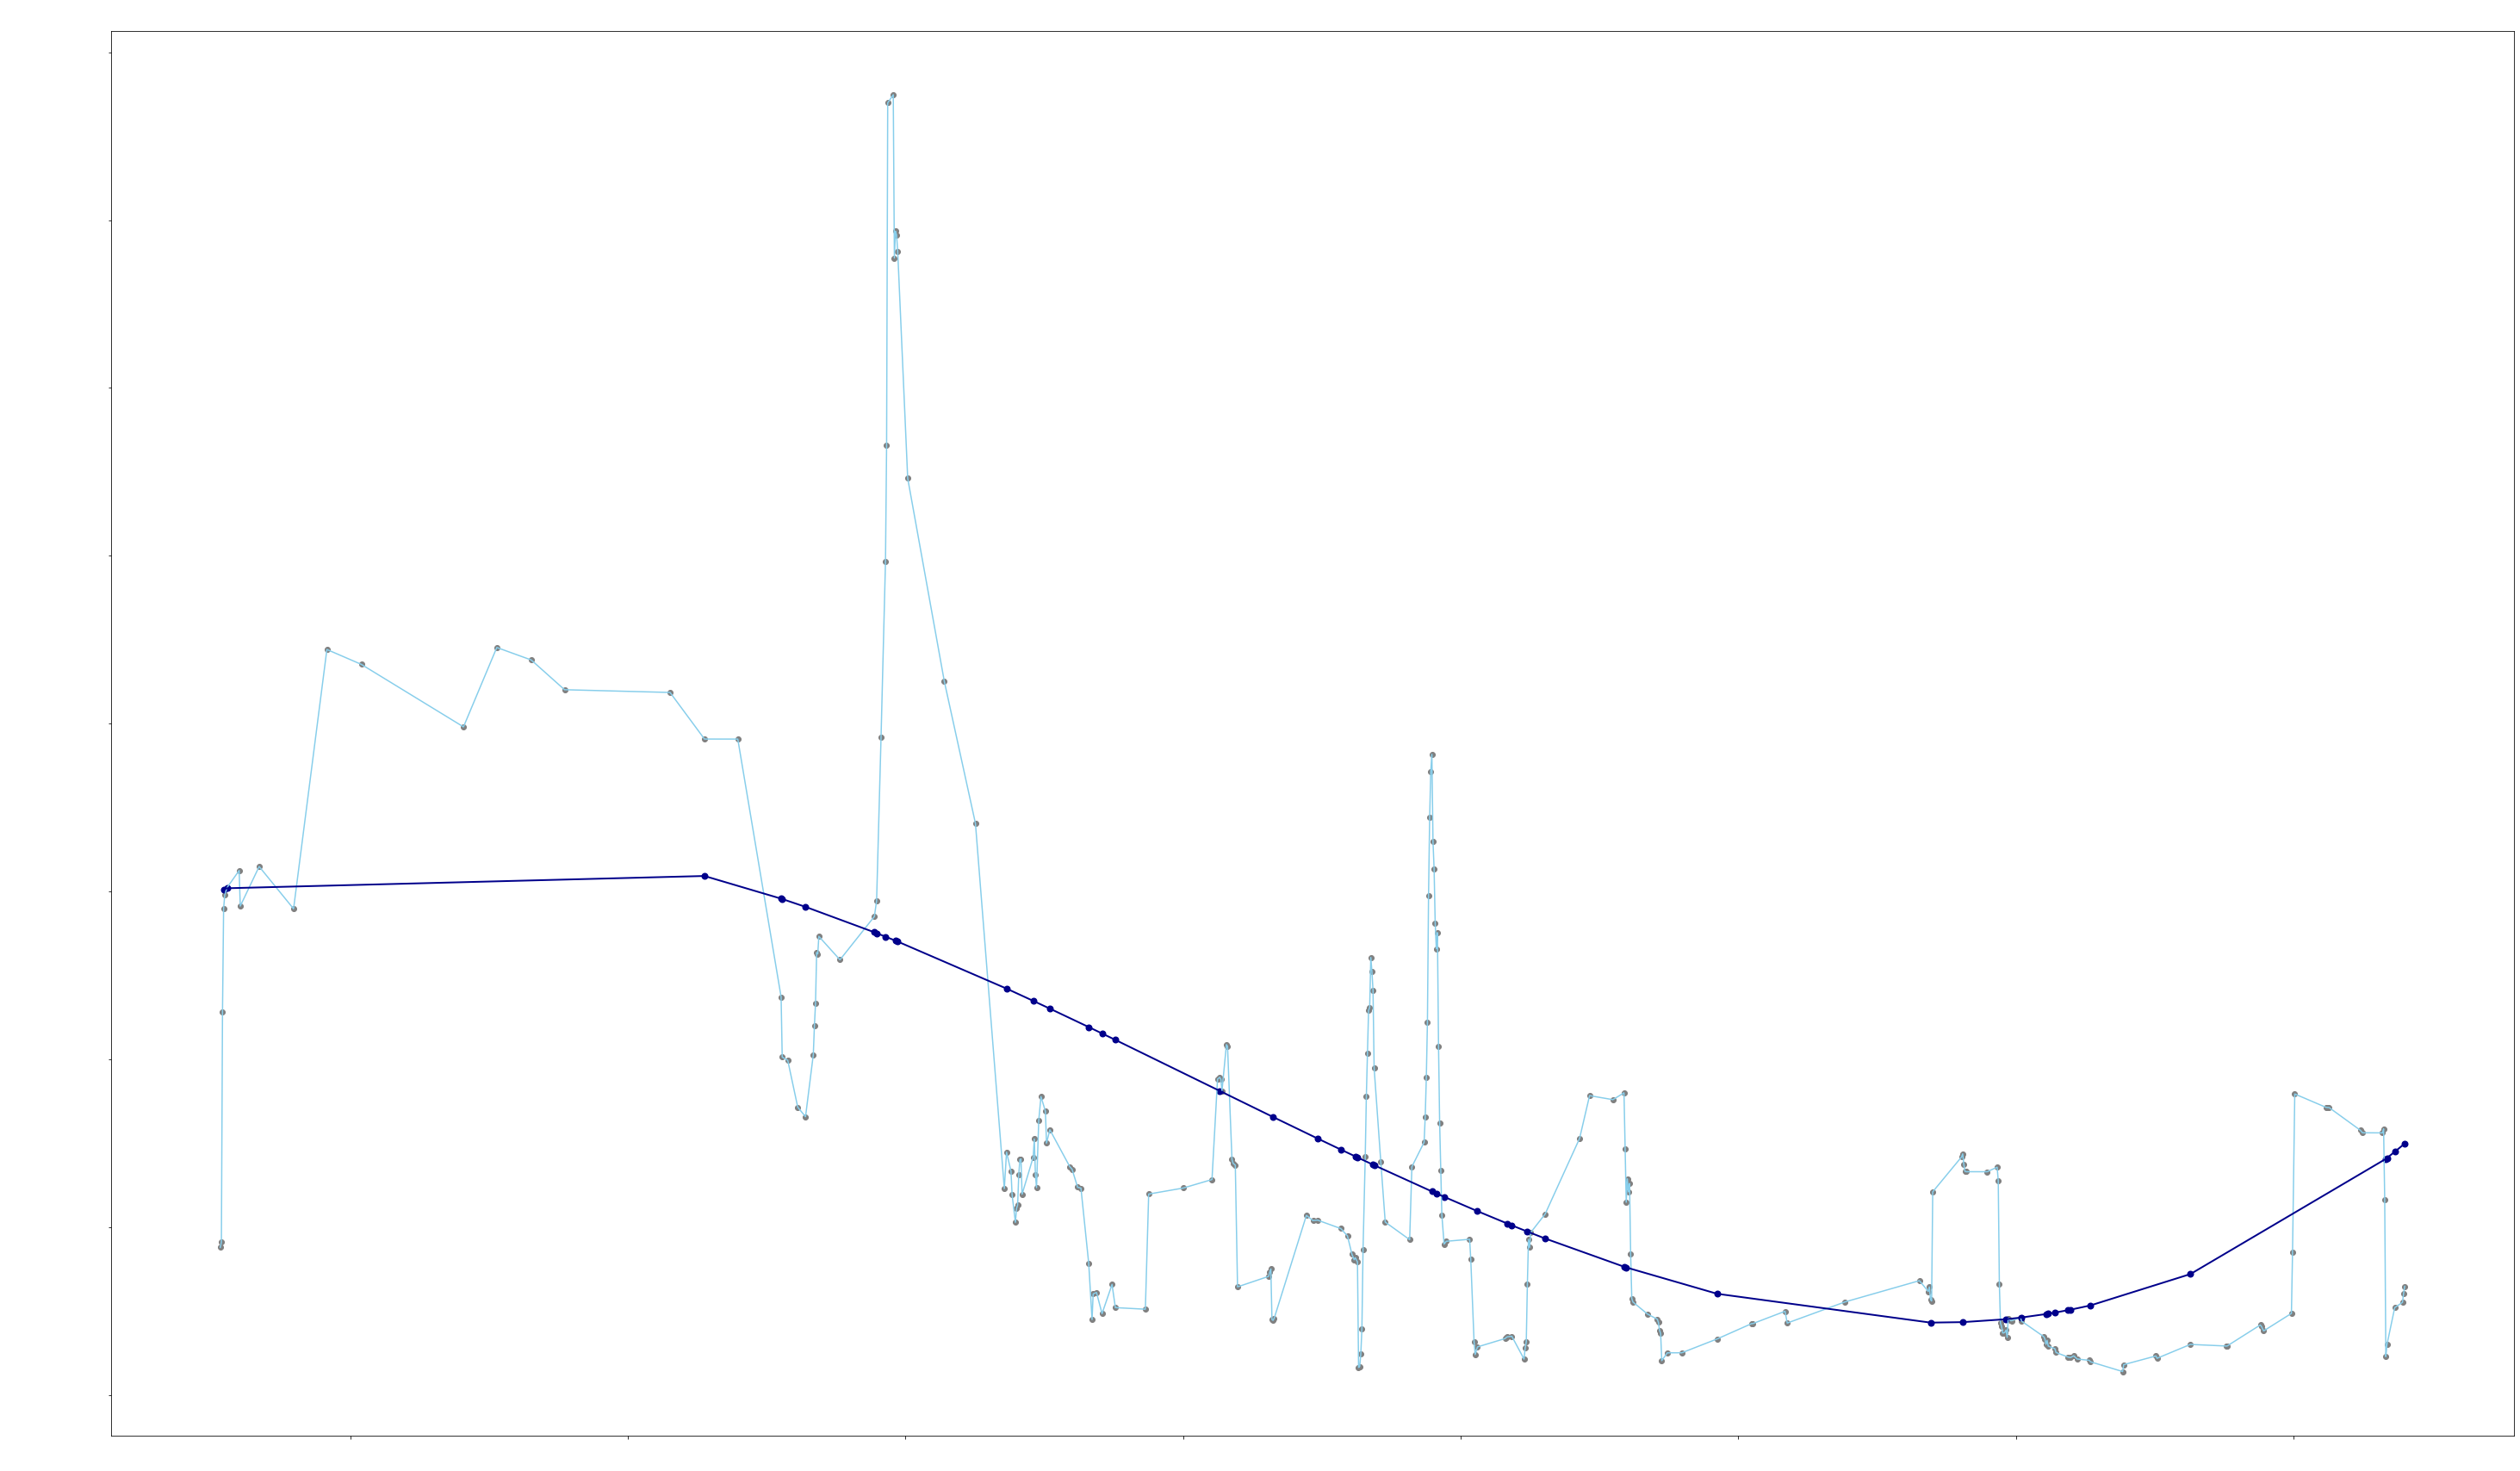

Linear Regressor performance:
Mean absolute error =  68670.84
Mean squared error =  6909640559.95
Median absolute error =  71716.91
Explained variance score =  -1.6
R2 score =  -1.62


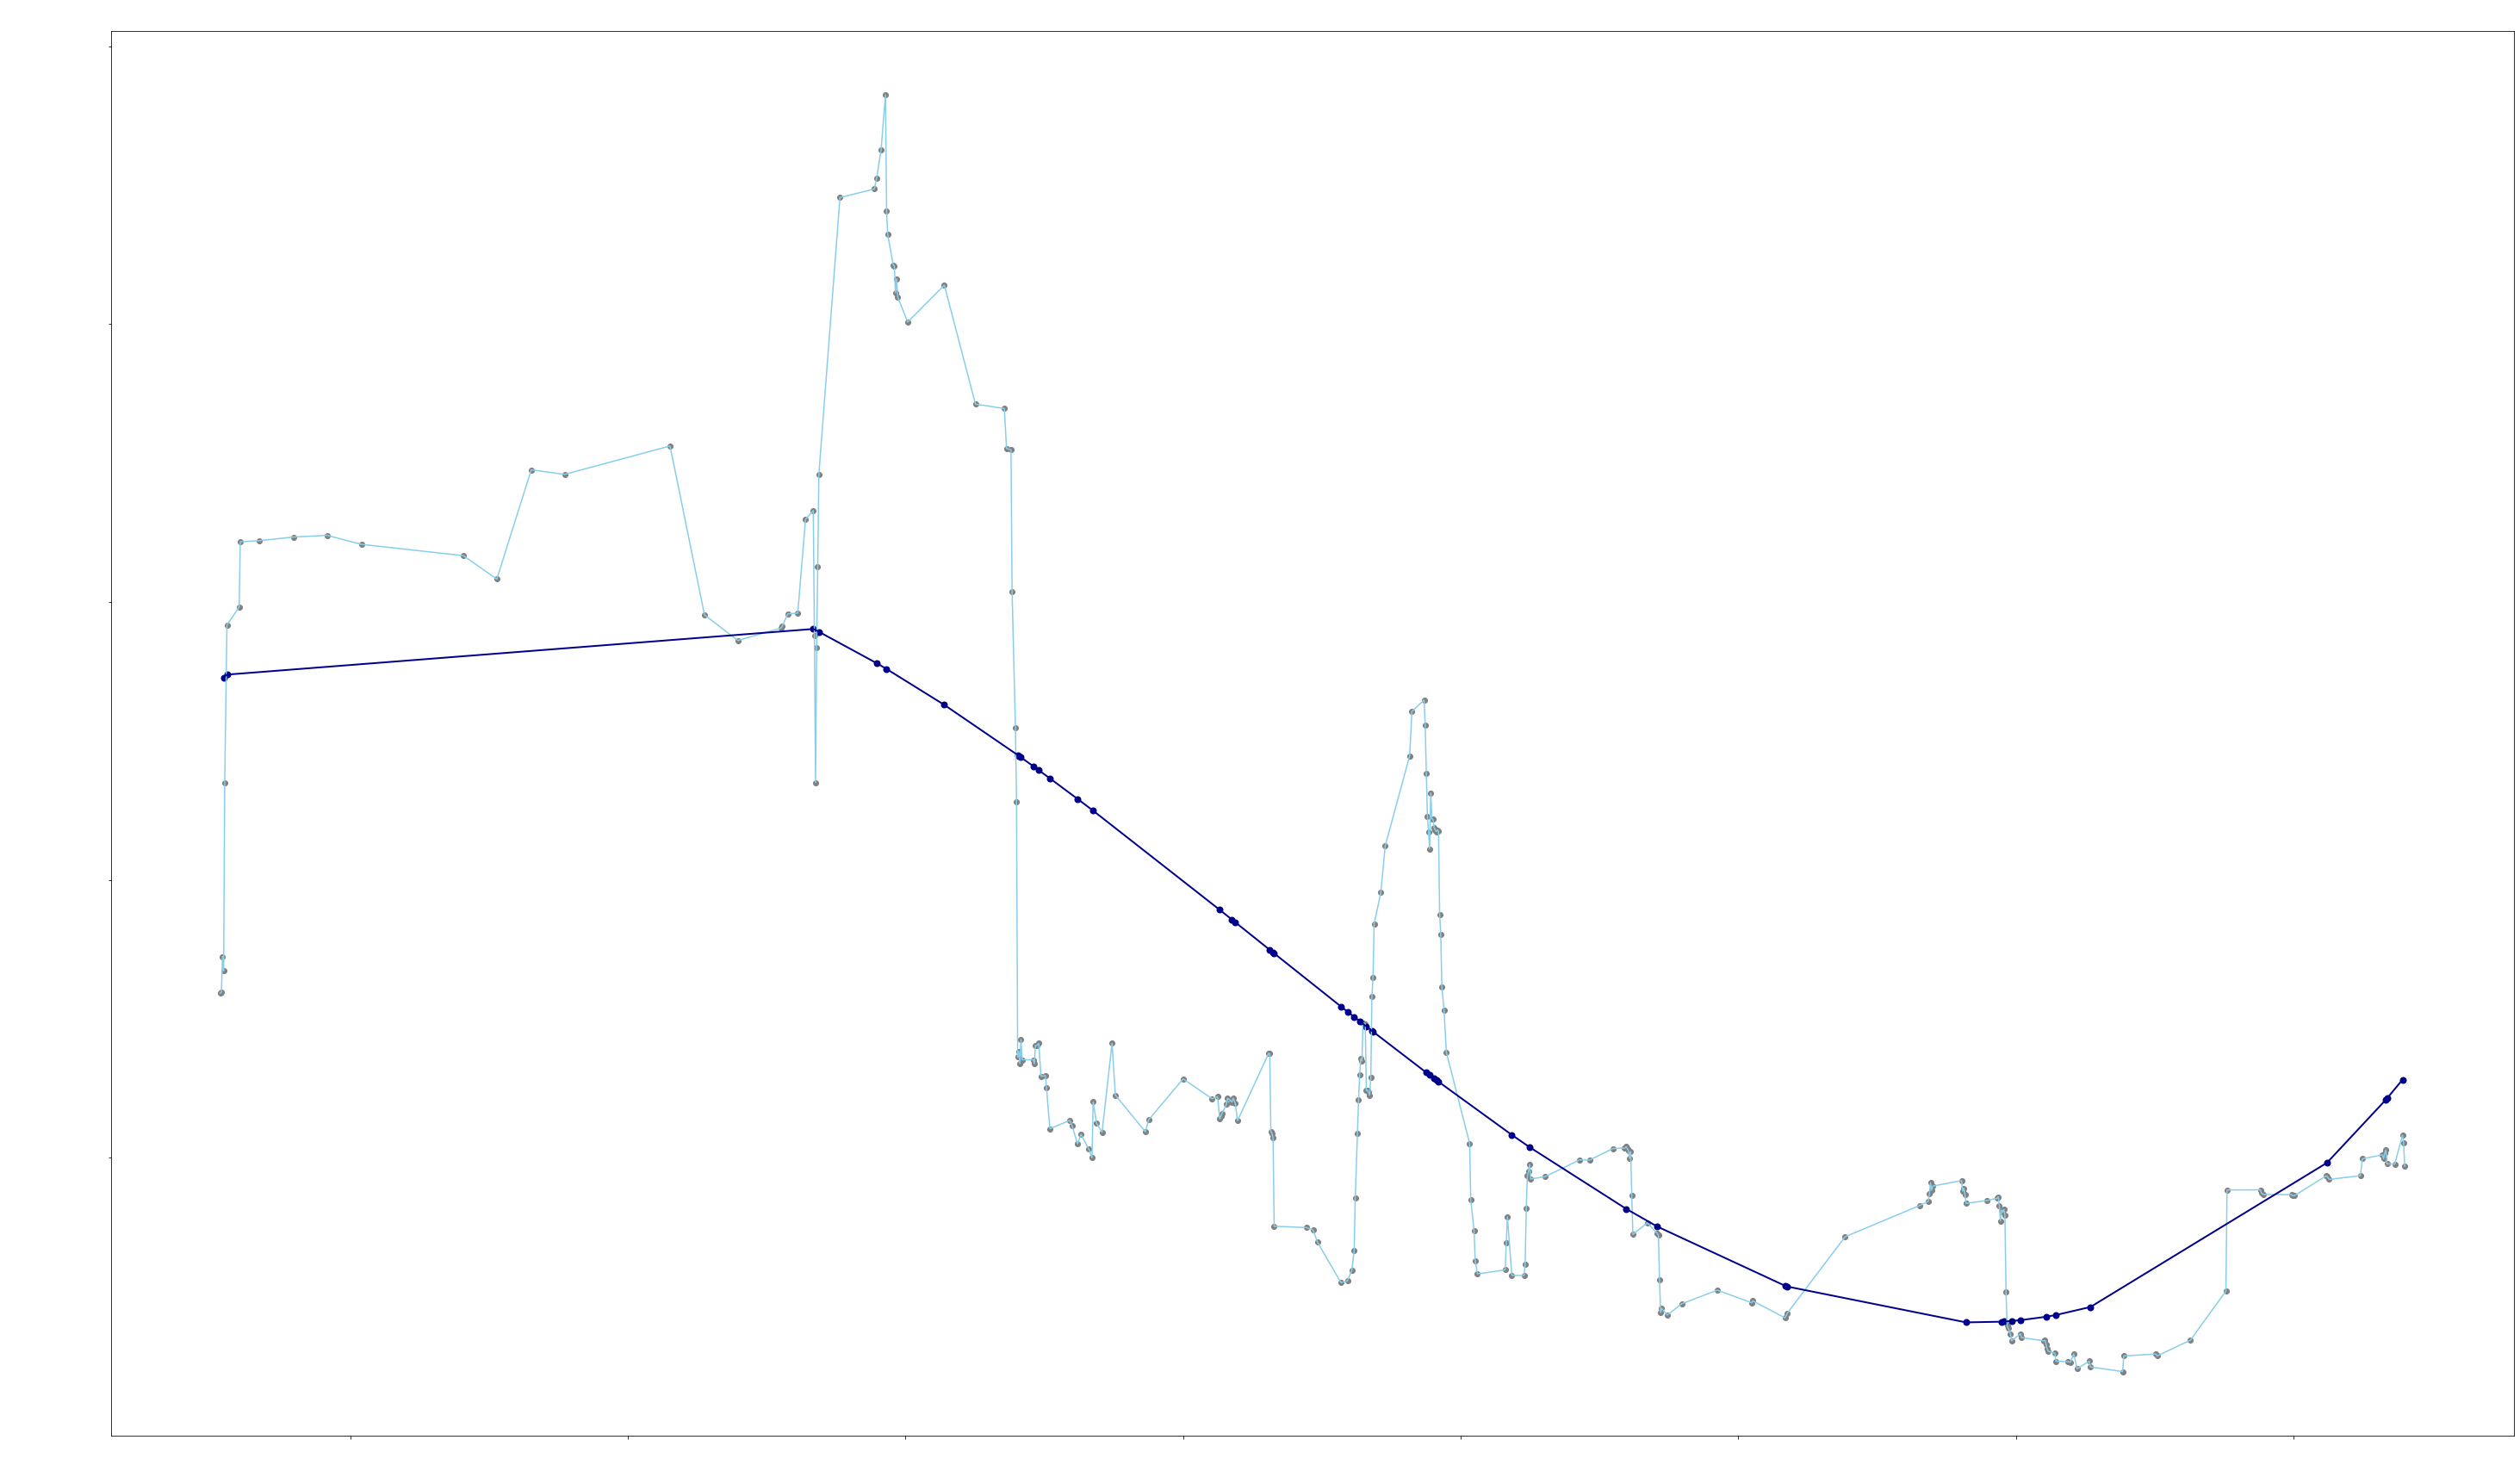

Linear Regressor performance:
Mean absolute error =  60770.79
Mean squared error =  5257189159.13
Median absolute error =  67827.48
Explained variance score =  -1.52
R2 score =  -1.52


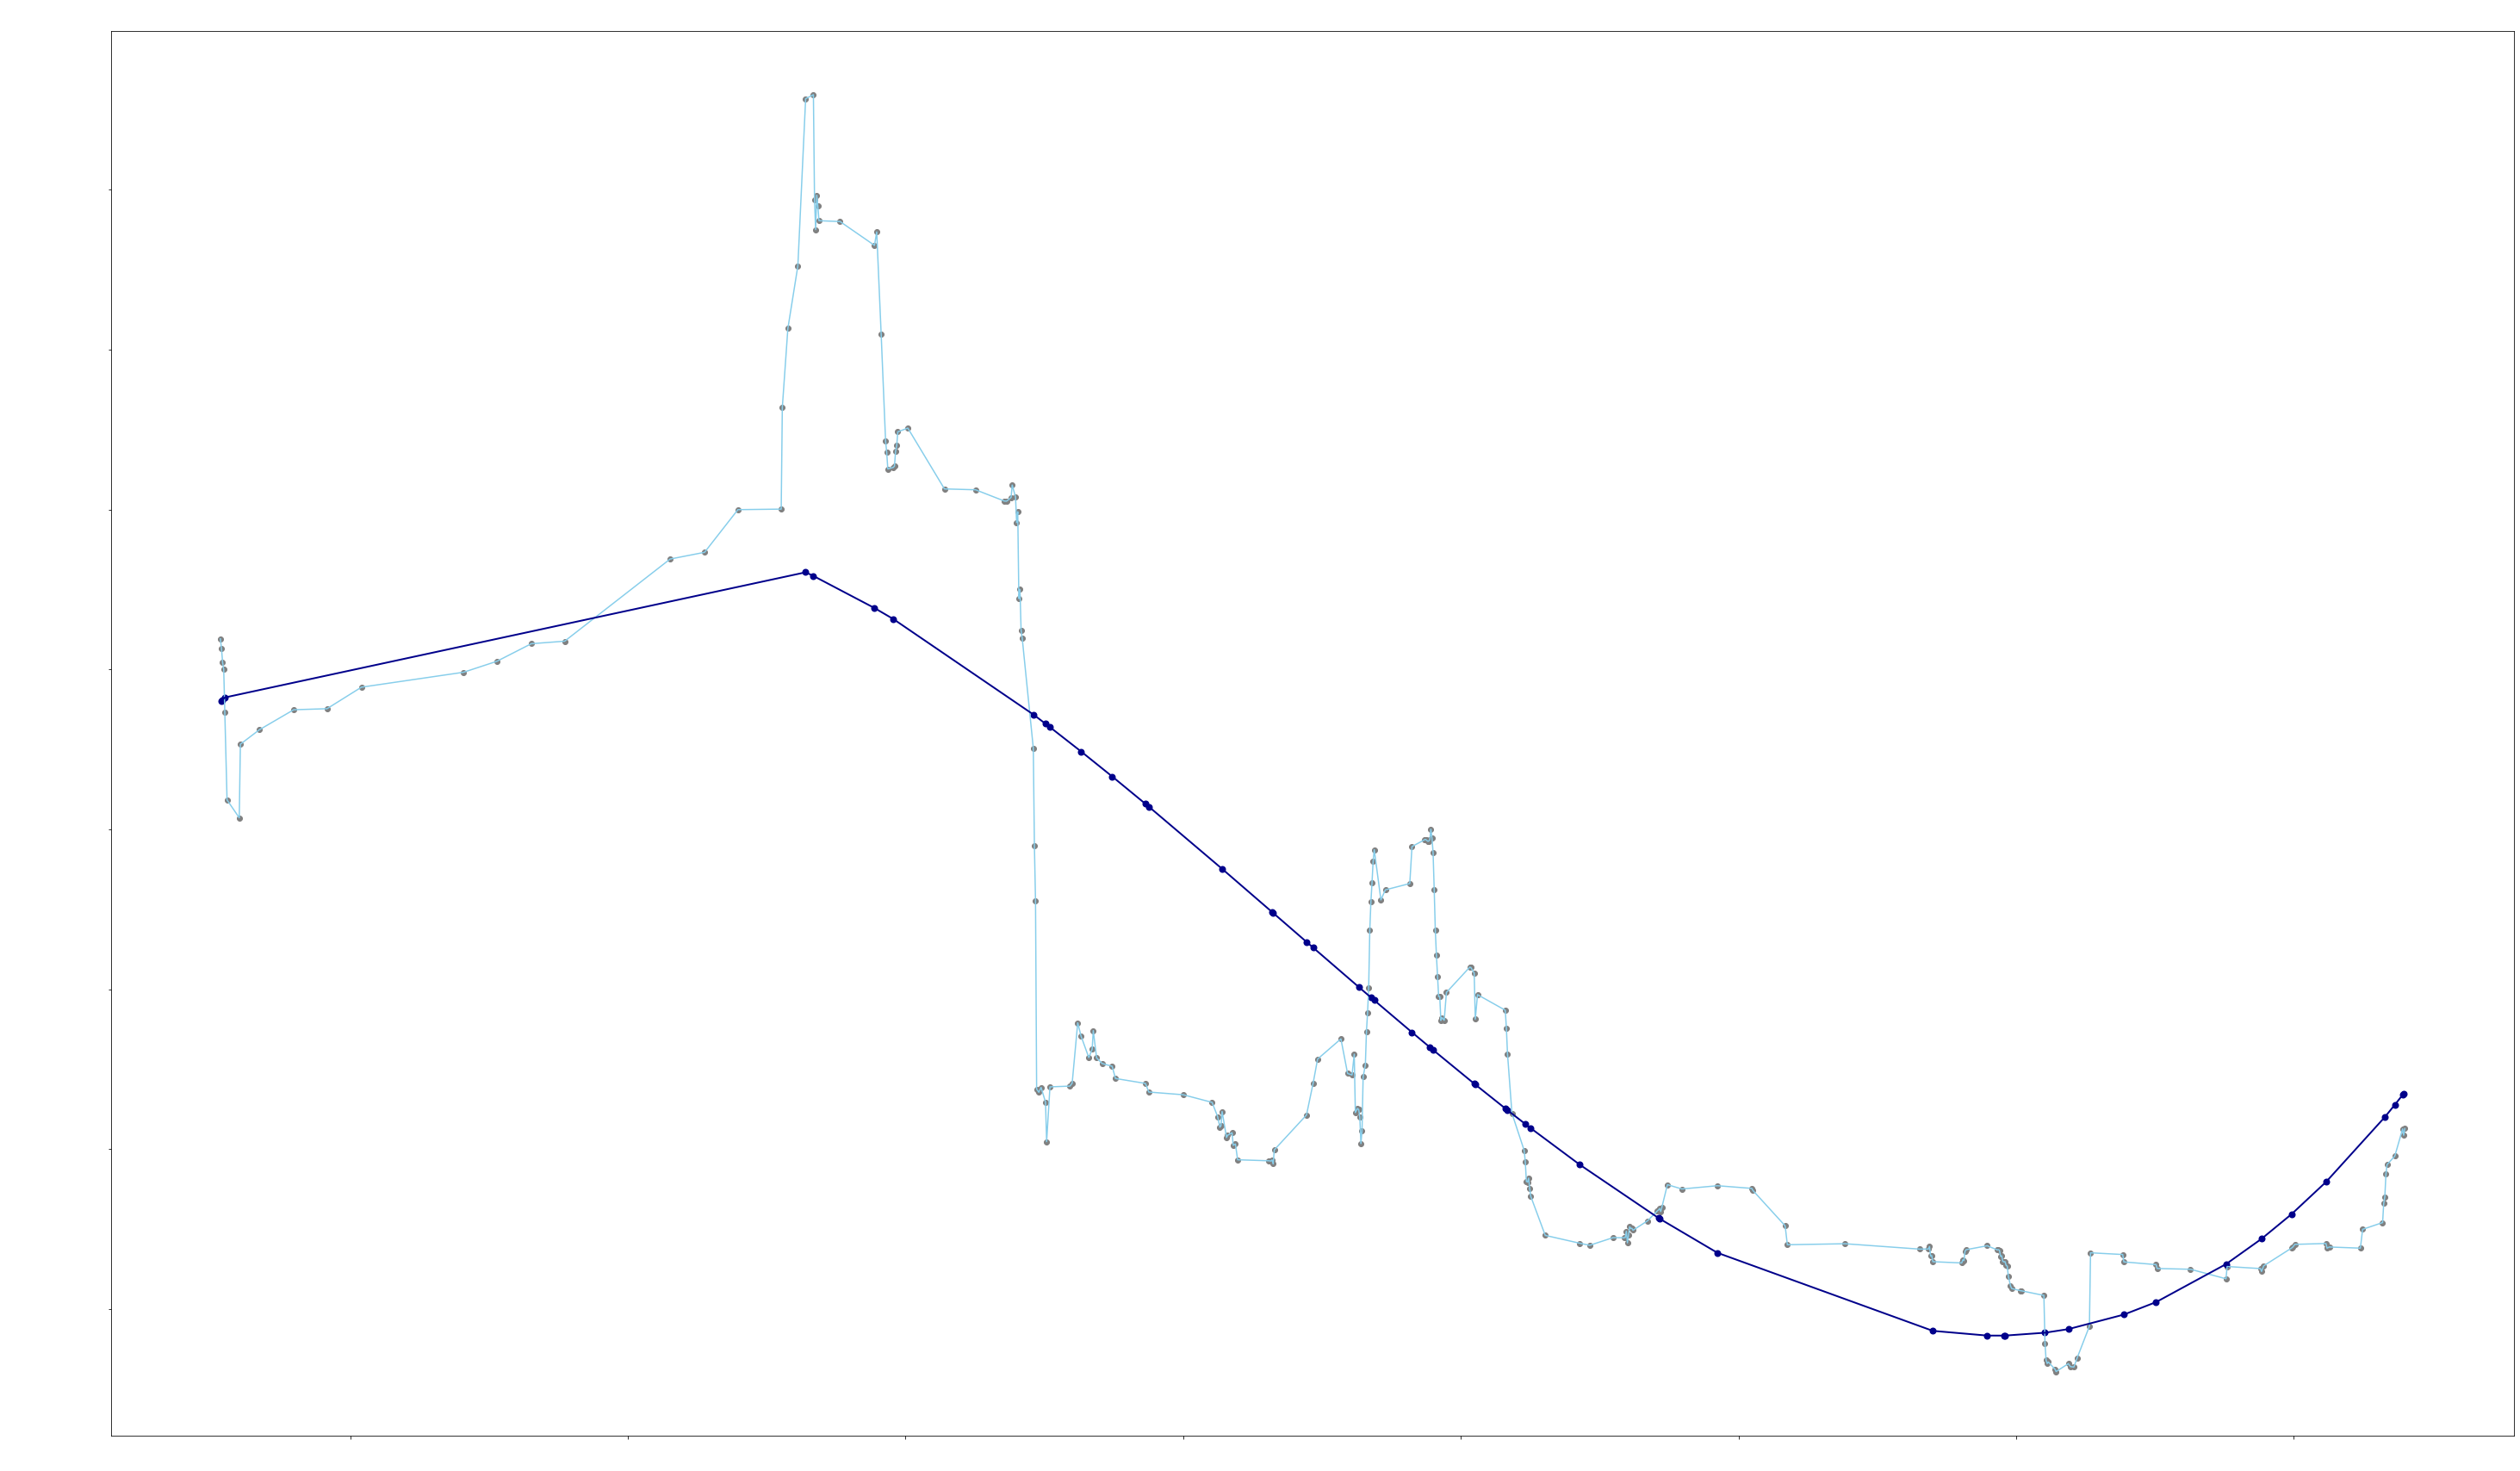

In [0]:
########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_original, y_original, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 3 > ] ##########
polynomial = PolynomialFeatures(degree=3)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 3 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_original, y_original, color='gray')
plt.plot(X_original, y_original, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_9, y_moving_average_9, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 3 > ] ##########
polynomial = PolynomialFeatures(degree=3)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 3 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_9, y_moving_average_9, color='gray')
plt.plot(X_moving_average_9, y_moving_average_9, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_21, y_moving_average_21, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 3 > ] ##########
polynomial = PolynomialFeatures(degree=3)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 3 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_21, y_moving_average_21, color='gray')
plt.plot(X_moving_average_21, y_moving_average_21, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_36, y_moving_average_36, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 3 > ] ##########
polynomial = PolynomialFeatures(degree=3)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 3 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_36, y_moving_average_36, color='gray')
plt.plot(X_moving_average_36, y_moving_average_36, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

THE REGRESSION WITH DEGREE = 4

Linear Regressor performance:
Mean absolute error =  104788.9
Mean squared error =  22858830716.08
Median absolute error =  87478.19
Explained variance score =  -0.34
R2 score =  -0.34


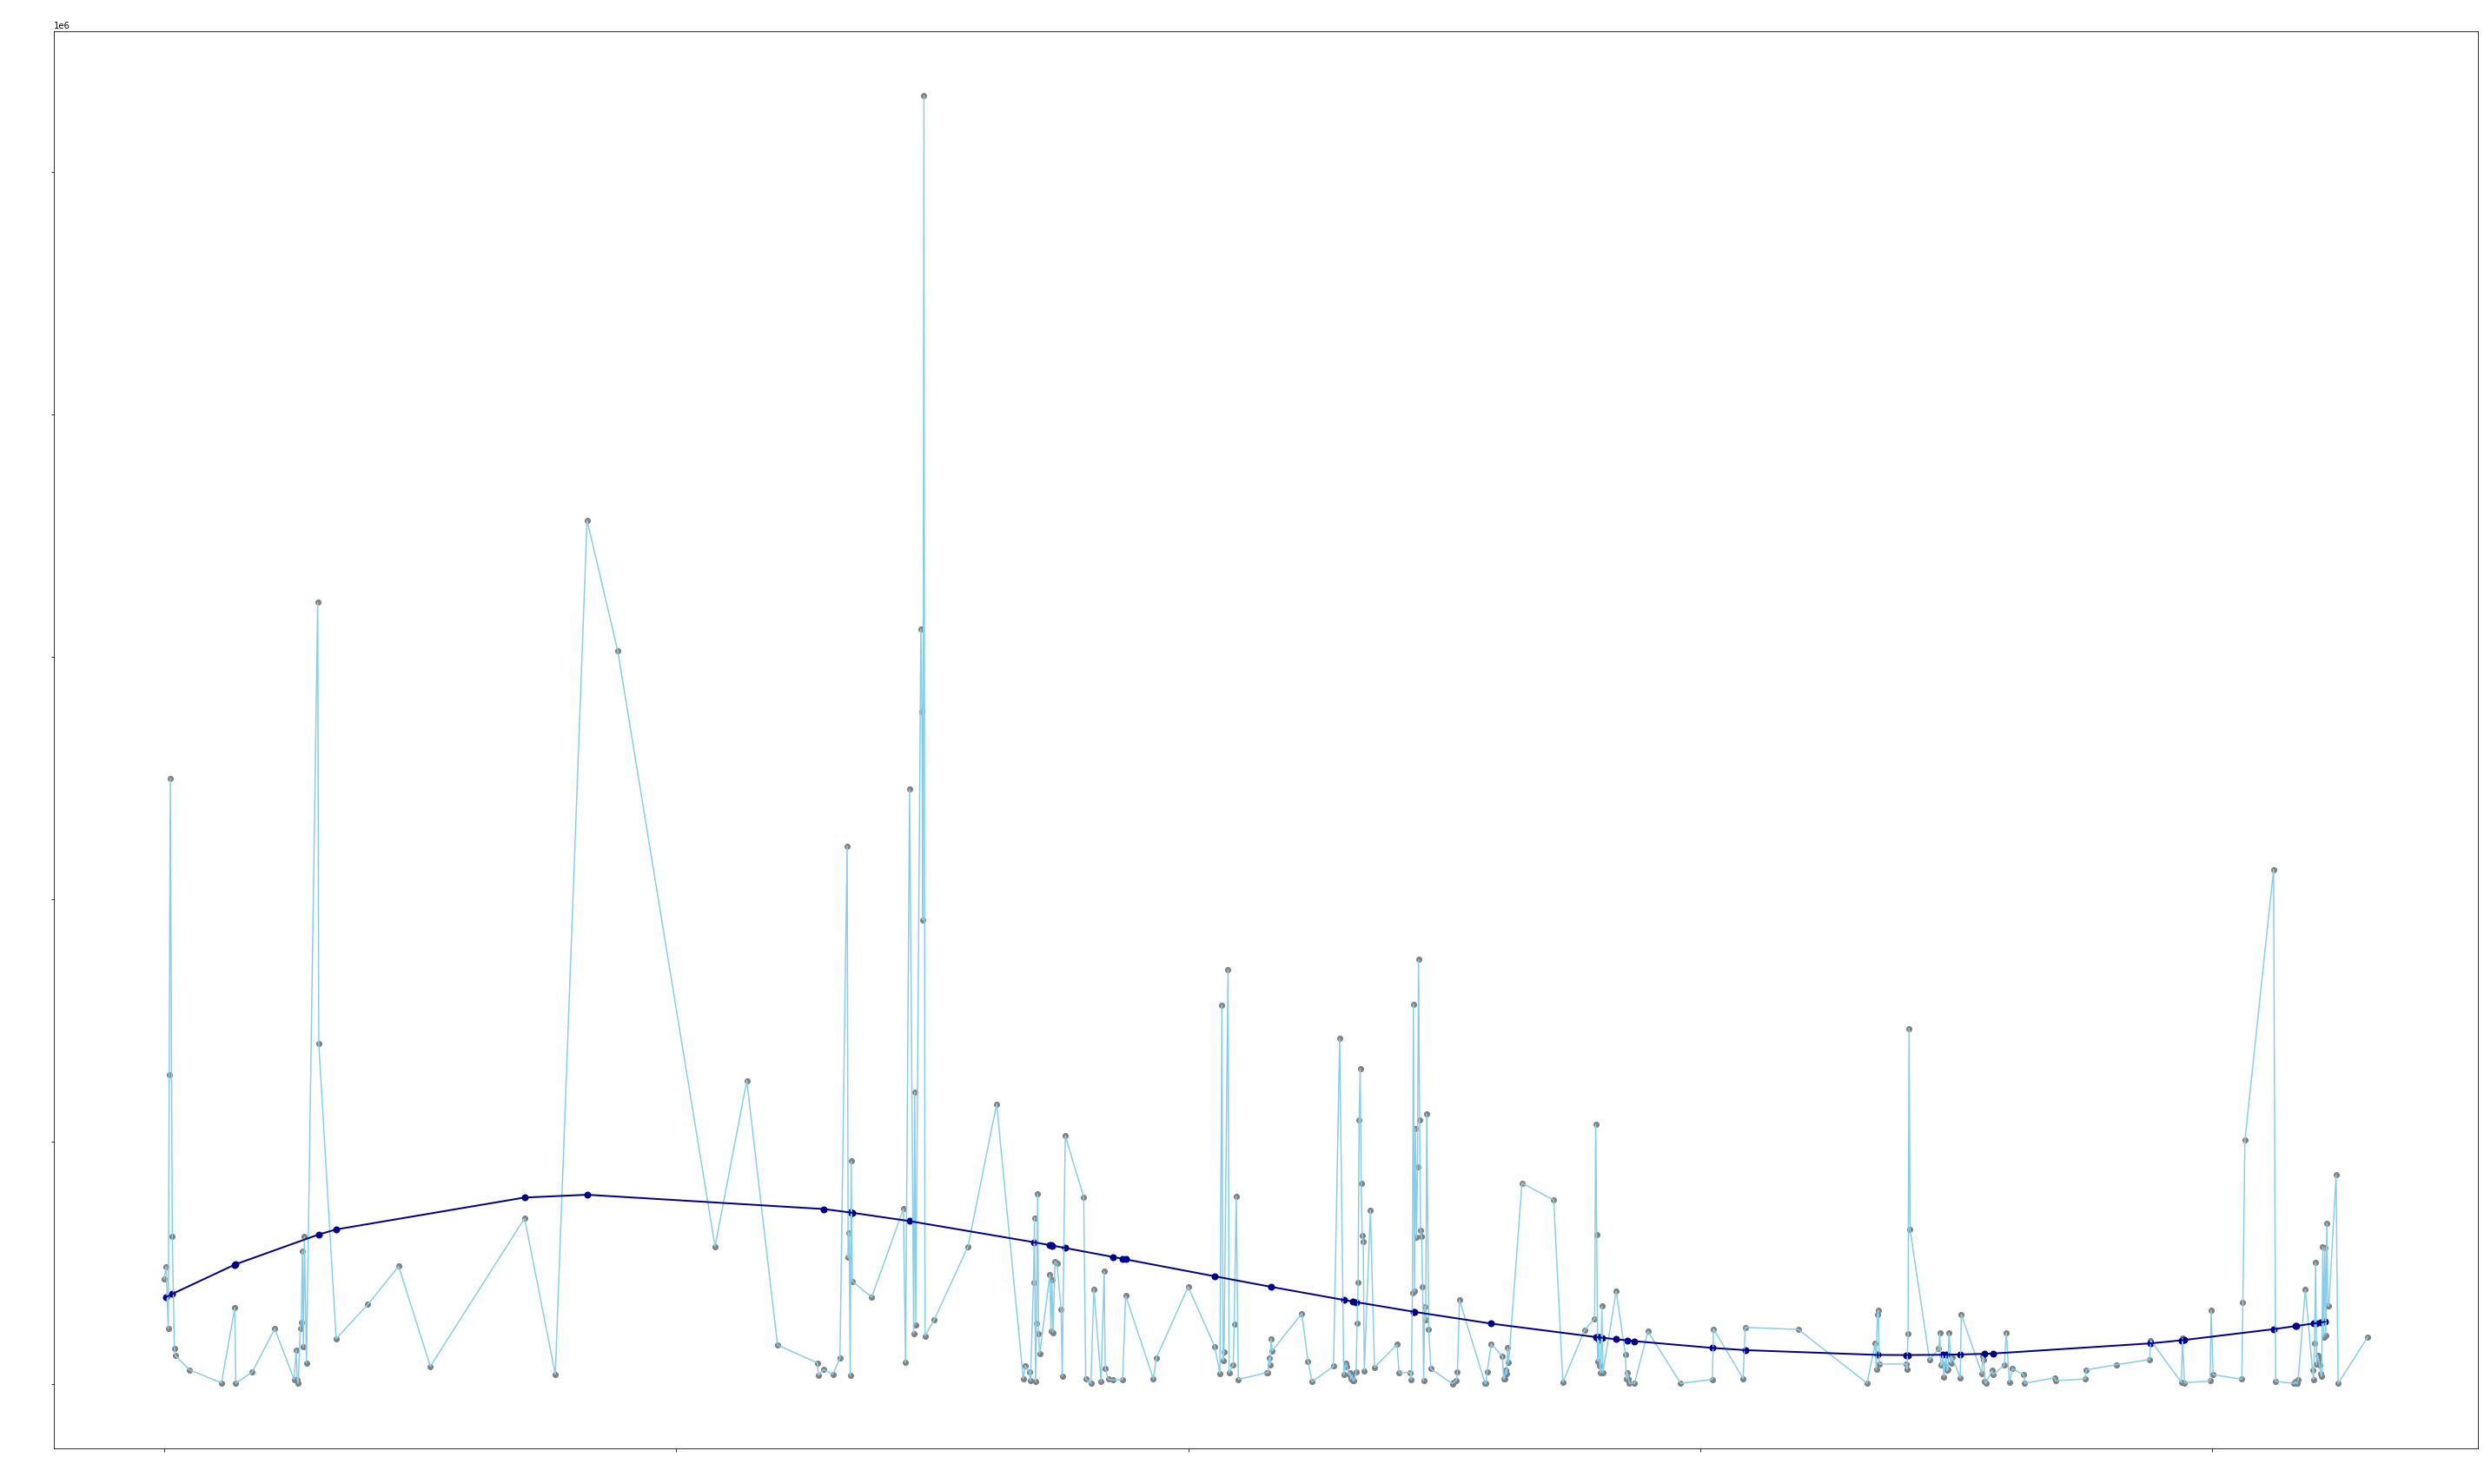

Linear Regressor performance:
Mean absolute error =  66761.86
Mean squared error =  7109444003.53
Median absolute error =  53110.25
Explained variance score =  -2.72
R2 score =  -2.76


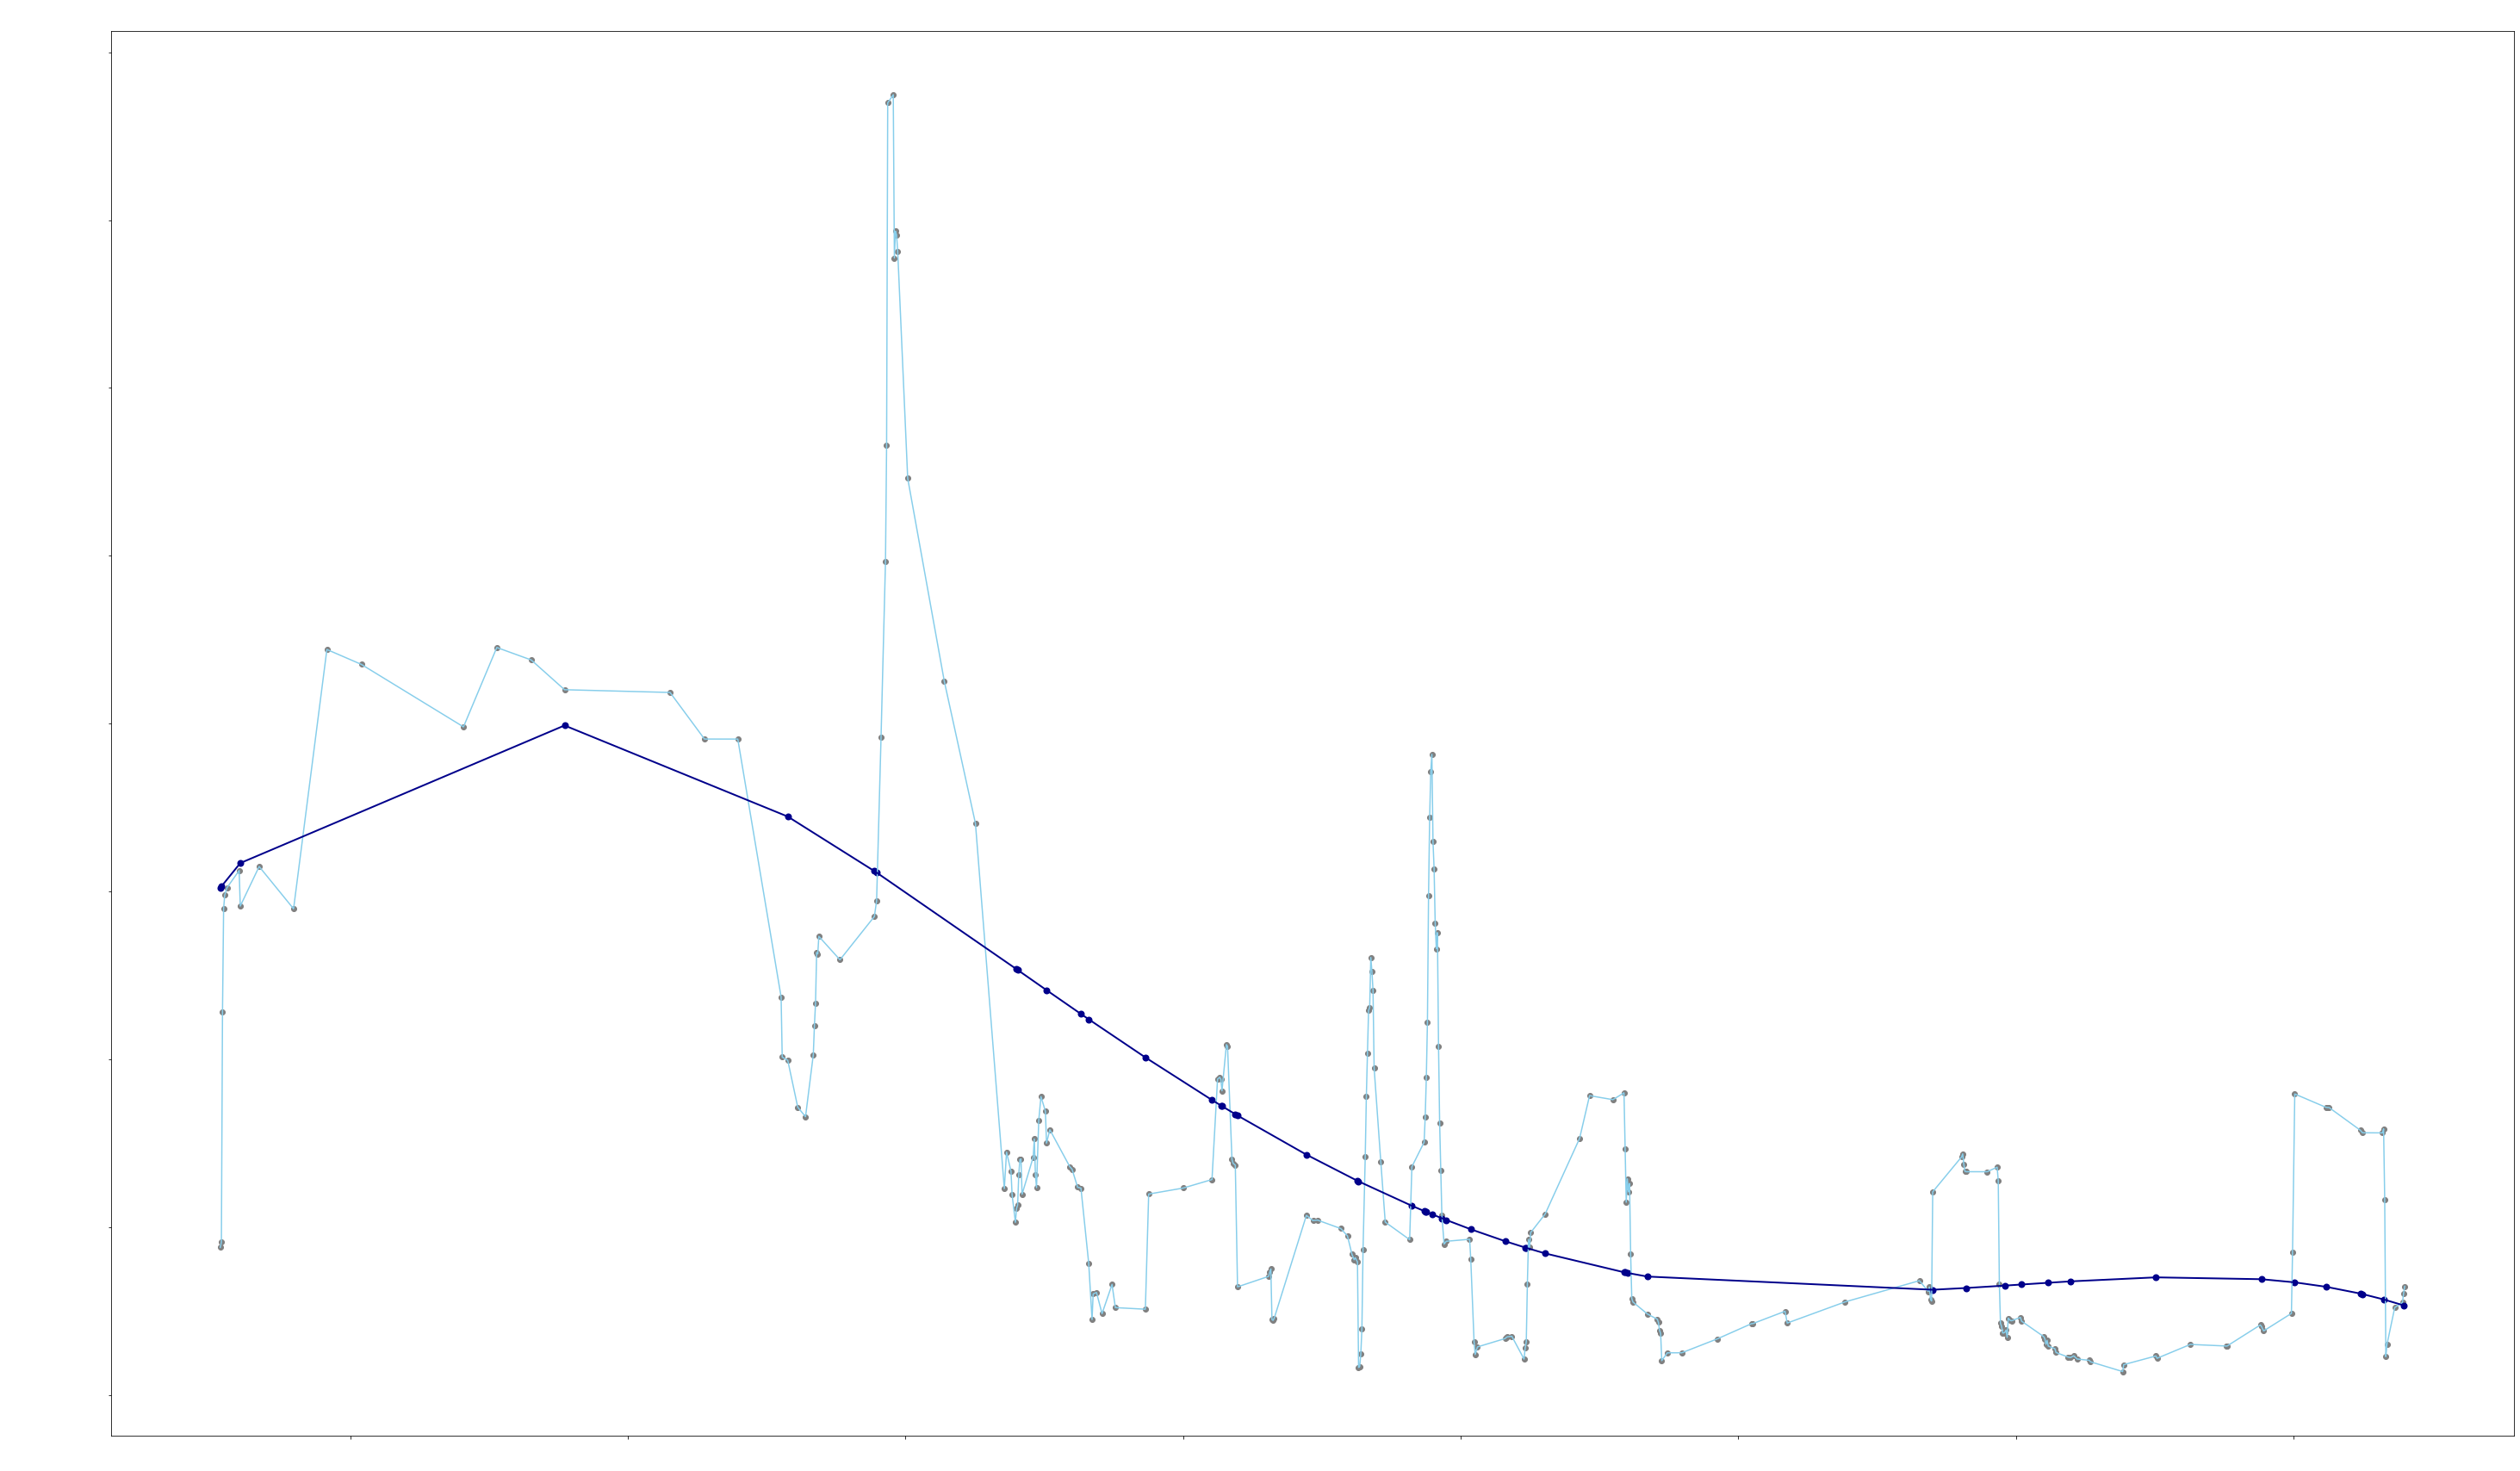

Linear Regressor performance:
Mean absolute error =  67546.68
Mean squared error =  7704111287.27
Median absolute error =  48033.64
Explained variance score =  -1.47
R2 score =  -1.47


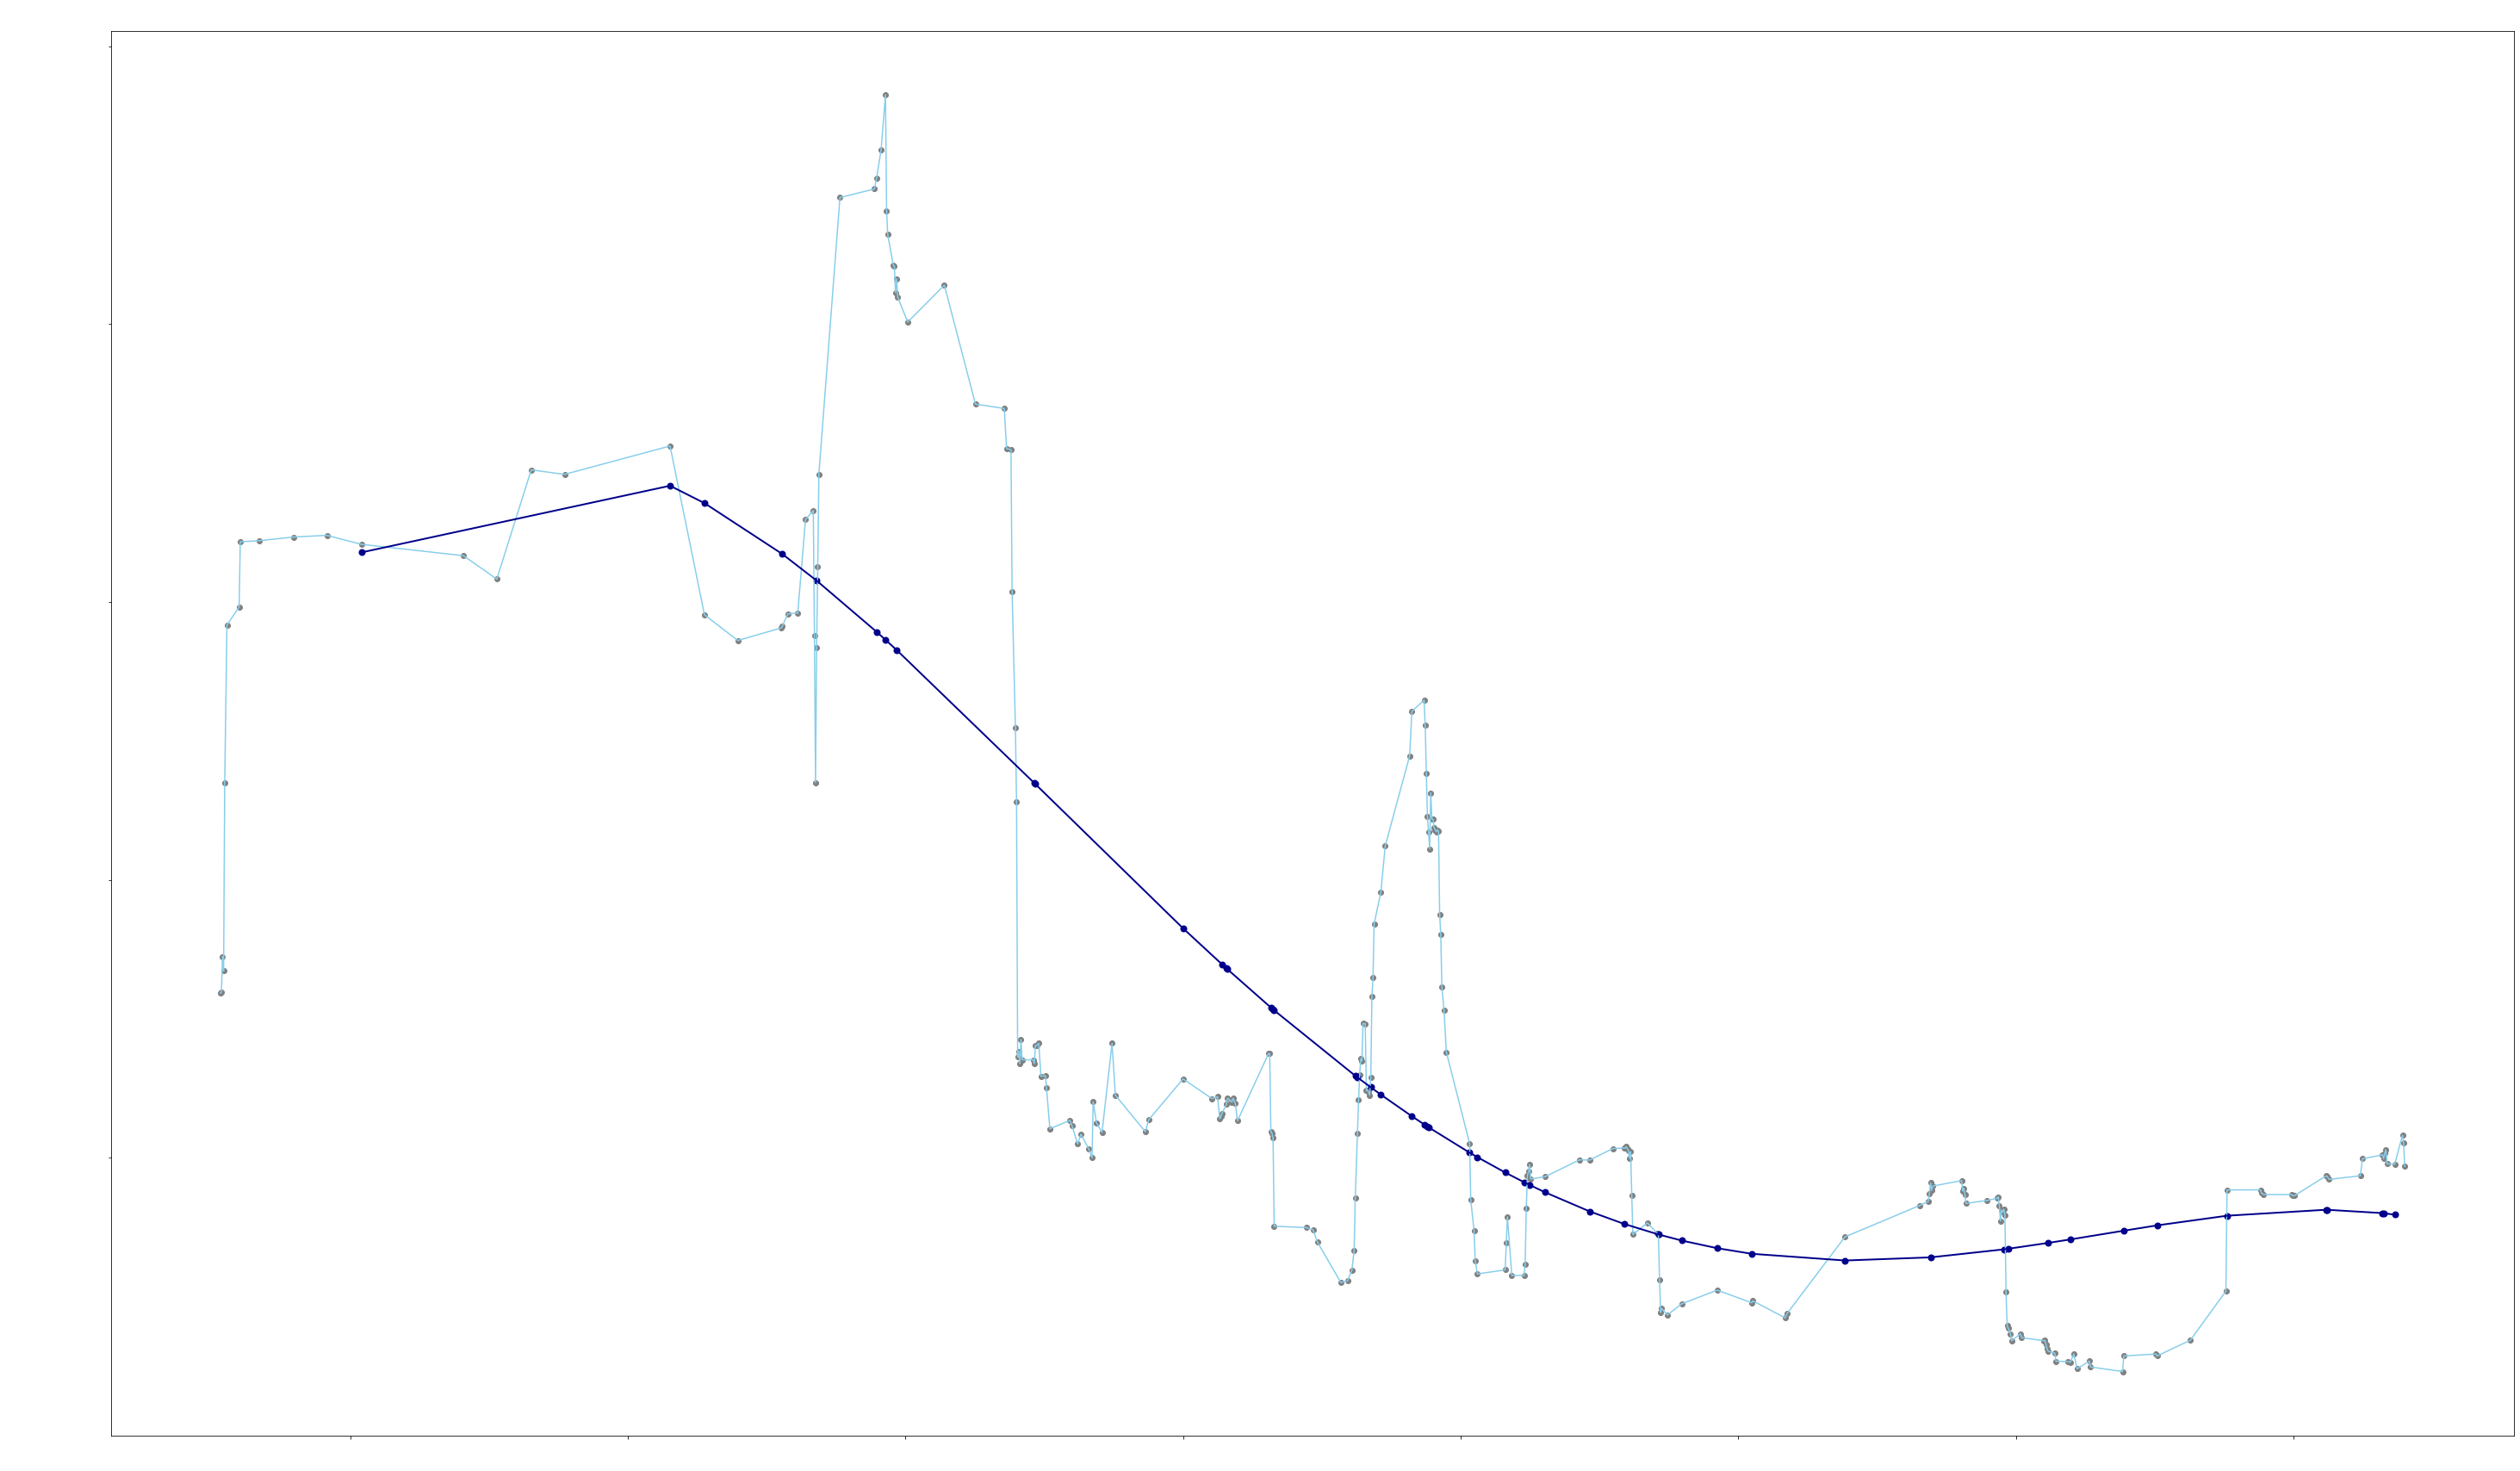

Linear Regressor performance:
Mean absolute error =  80950.87
Mean squared error =  8701805254.88
Median absolute error =  81000.39
Explained variance score =  -2.3
R2 score =  -2.3


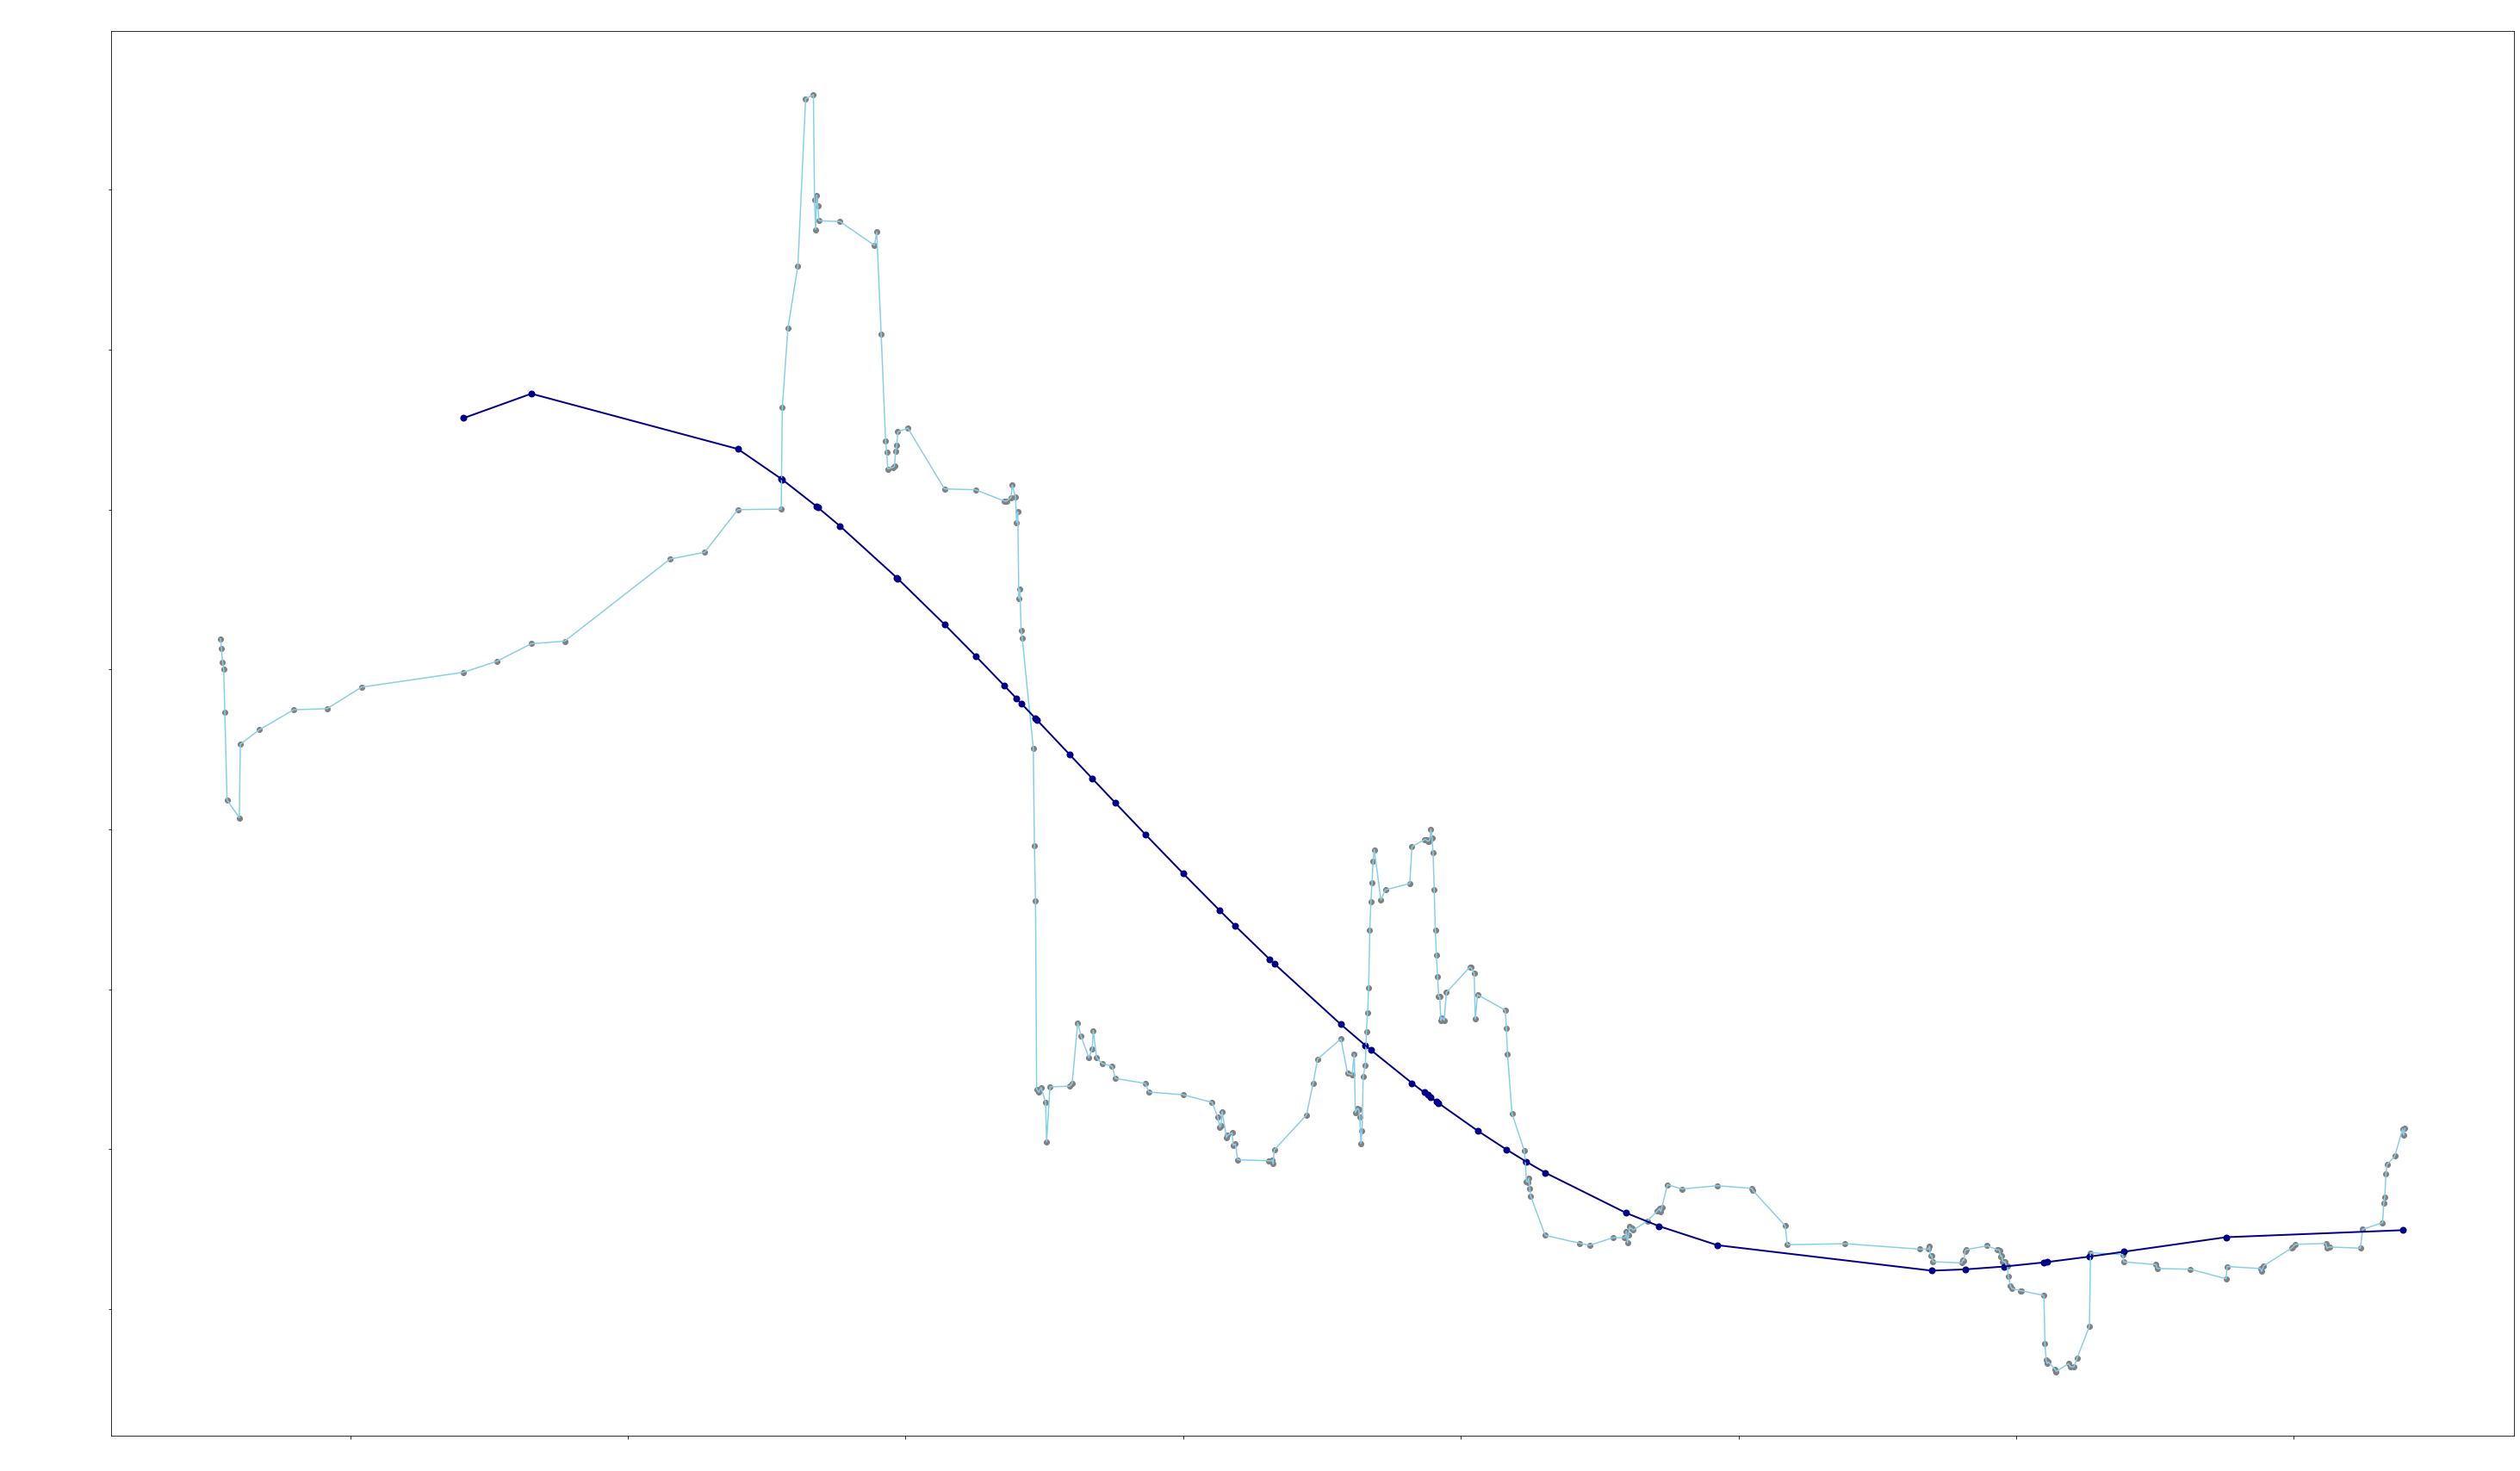

In [0]:
########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_original, y_original, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 4 > ] ##########
polynomial = PolynomialFeatures(degree=4)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 4 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_original, y_original, color='gray')
plt.plot(X_original, y_original, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_9, y_moving_average_9, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 4 > ] ##########
polynomial = PolynomialFeatures(degree=4)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 4 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_9, y_moving_average_9, color='gray')
plt.plot(X_moving_average_9, y_moving_average_9, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_21, y_moving_average_21, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 4 > ] ##########
polynomial = PolynomialFeatures(degree=4)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 4 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_21, y_moving_average_21, color='gray')
plt.plot(X_moving_average_21, y_moving_average_21, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_36, y_moving_average_36, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 4 > ] ##########
polynomial = PolynomialFeatures(degree=4)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 4 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_36, y_moving_average_36, color='gray')
plt.plot(X_moving_average_36, y_moving_average_36, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

THE REGRESSION WITH DEGREE = 5

Linear Regressor performance:
Mean absolute error =  110489.21
Mean squared error =  24575539207.21
Median absolute error =  96542.18
Explained variance score =  -0.31
R2 score =  -0.32


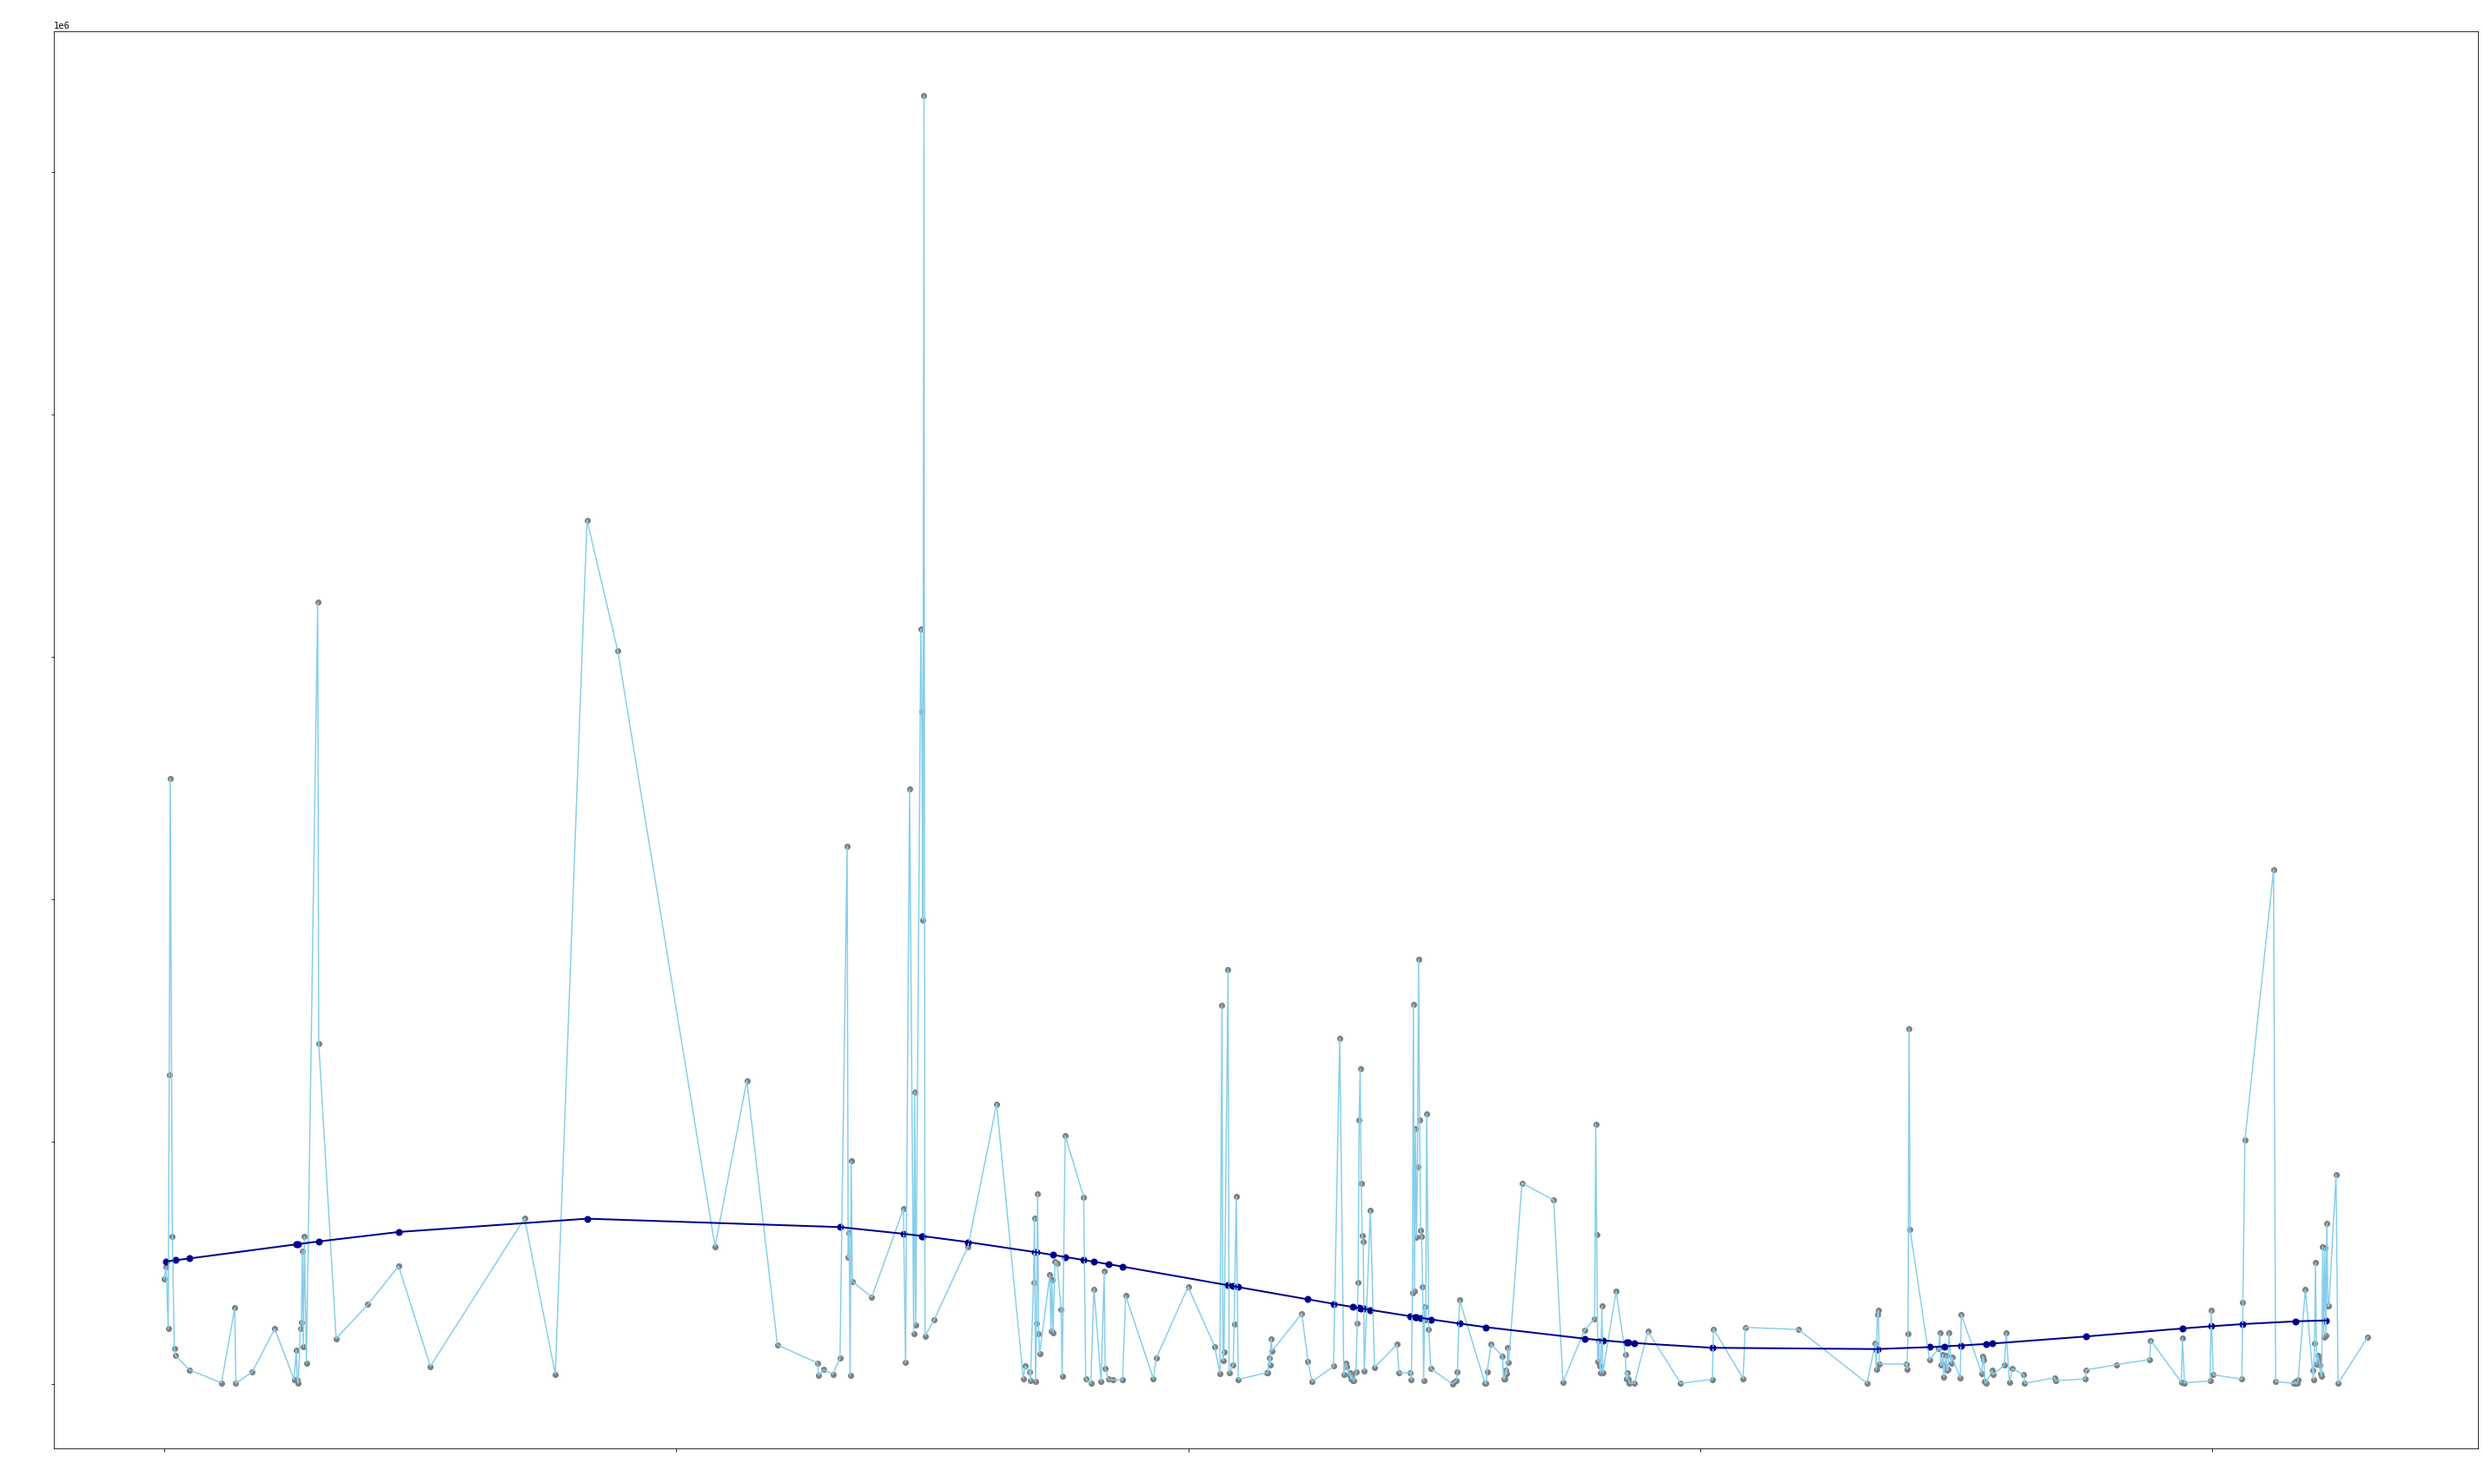

Linear Regressor performance:
Mean absolute error =  60093.33
Mean squared error =  6046788871.28
Median absolute error =  52908.57
Explained variance score =  -0.94
R2 score =  -0.96


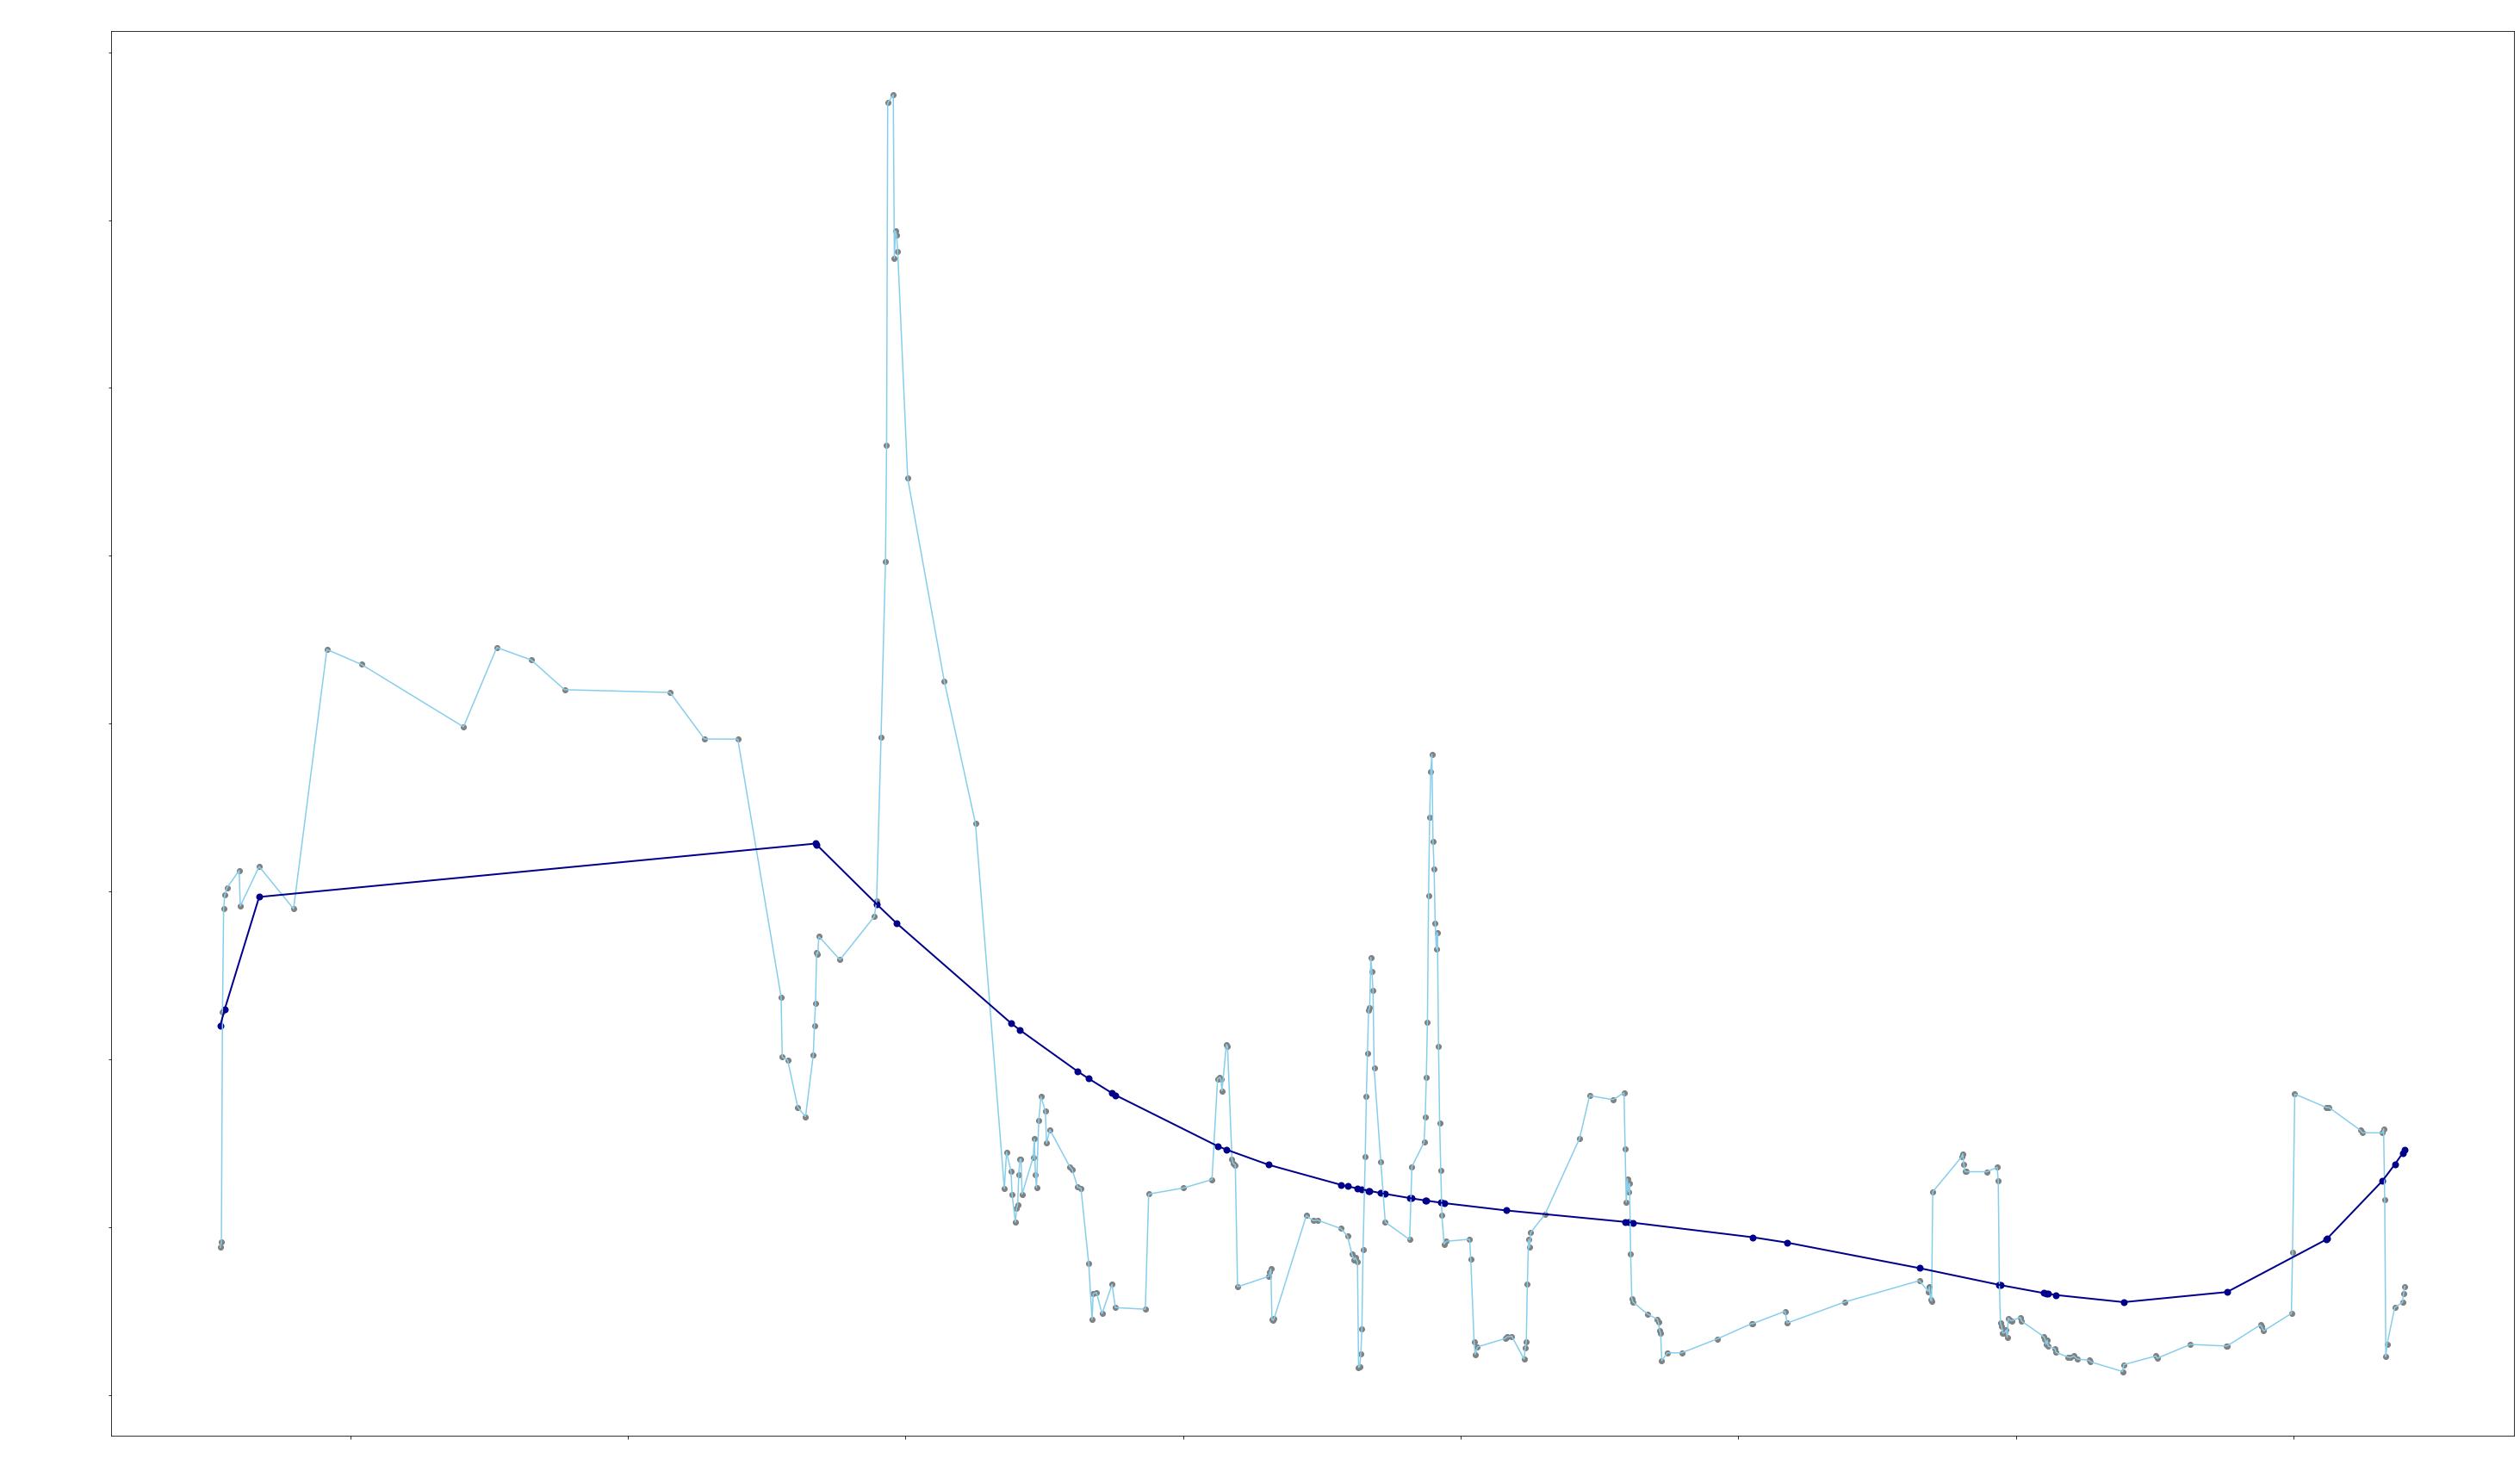

Linear Regressor performance:
Mean absolute error =  67735.46
Mean squared error =  7470281005.33
Median absolute error =  54714.69
Explained variance score =  -1.56
R2 score =  -1.56


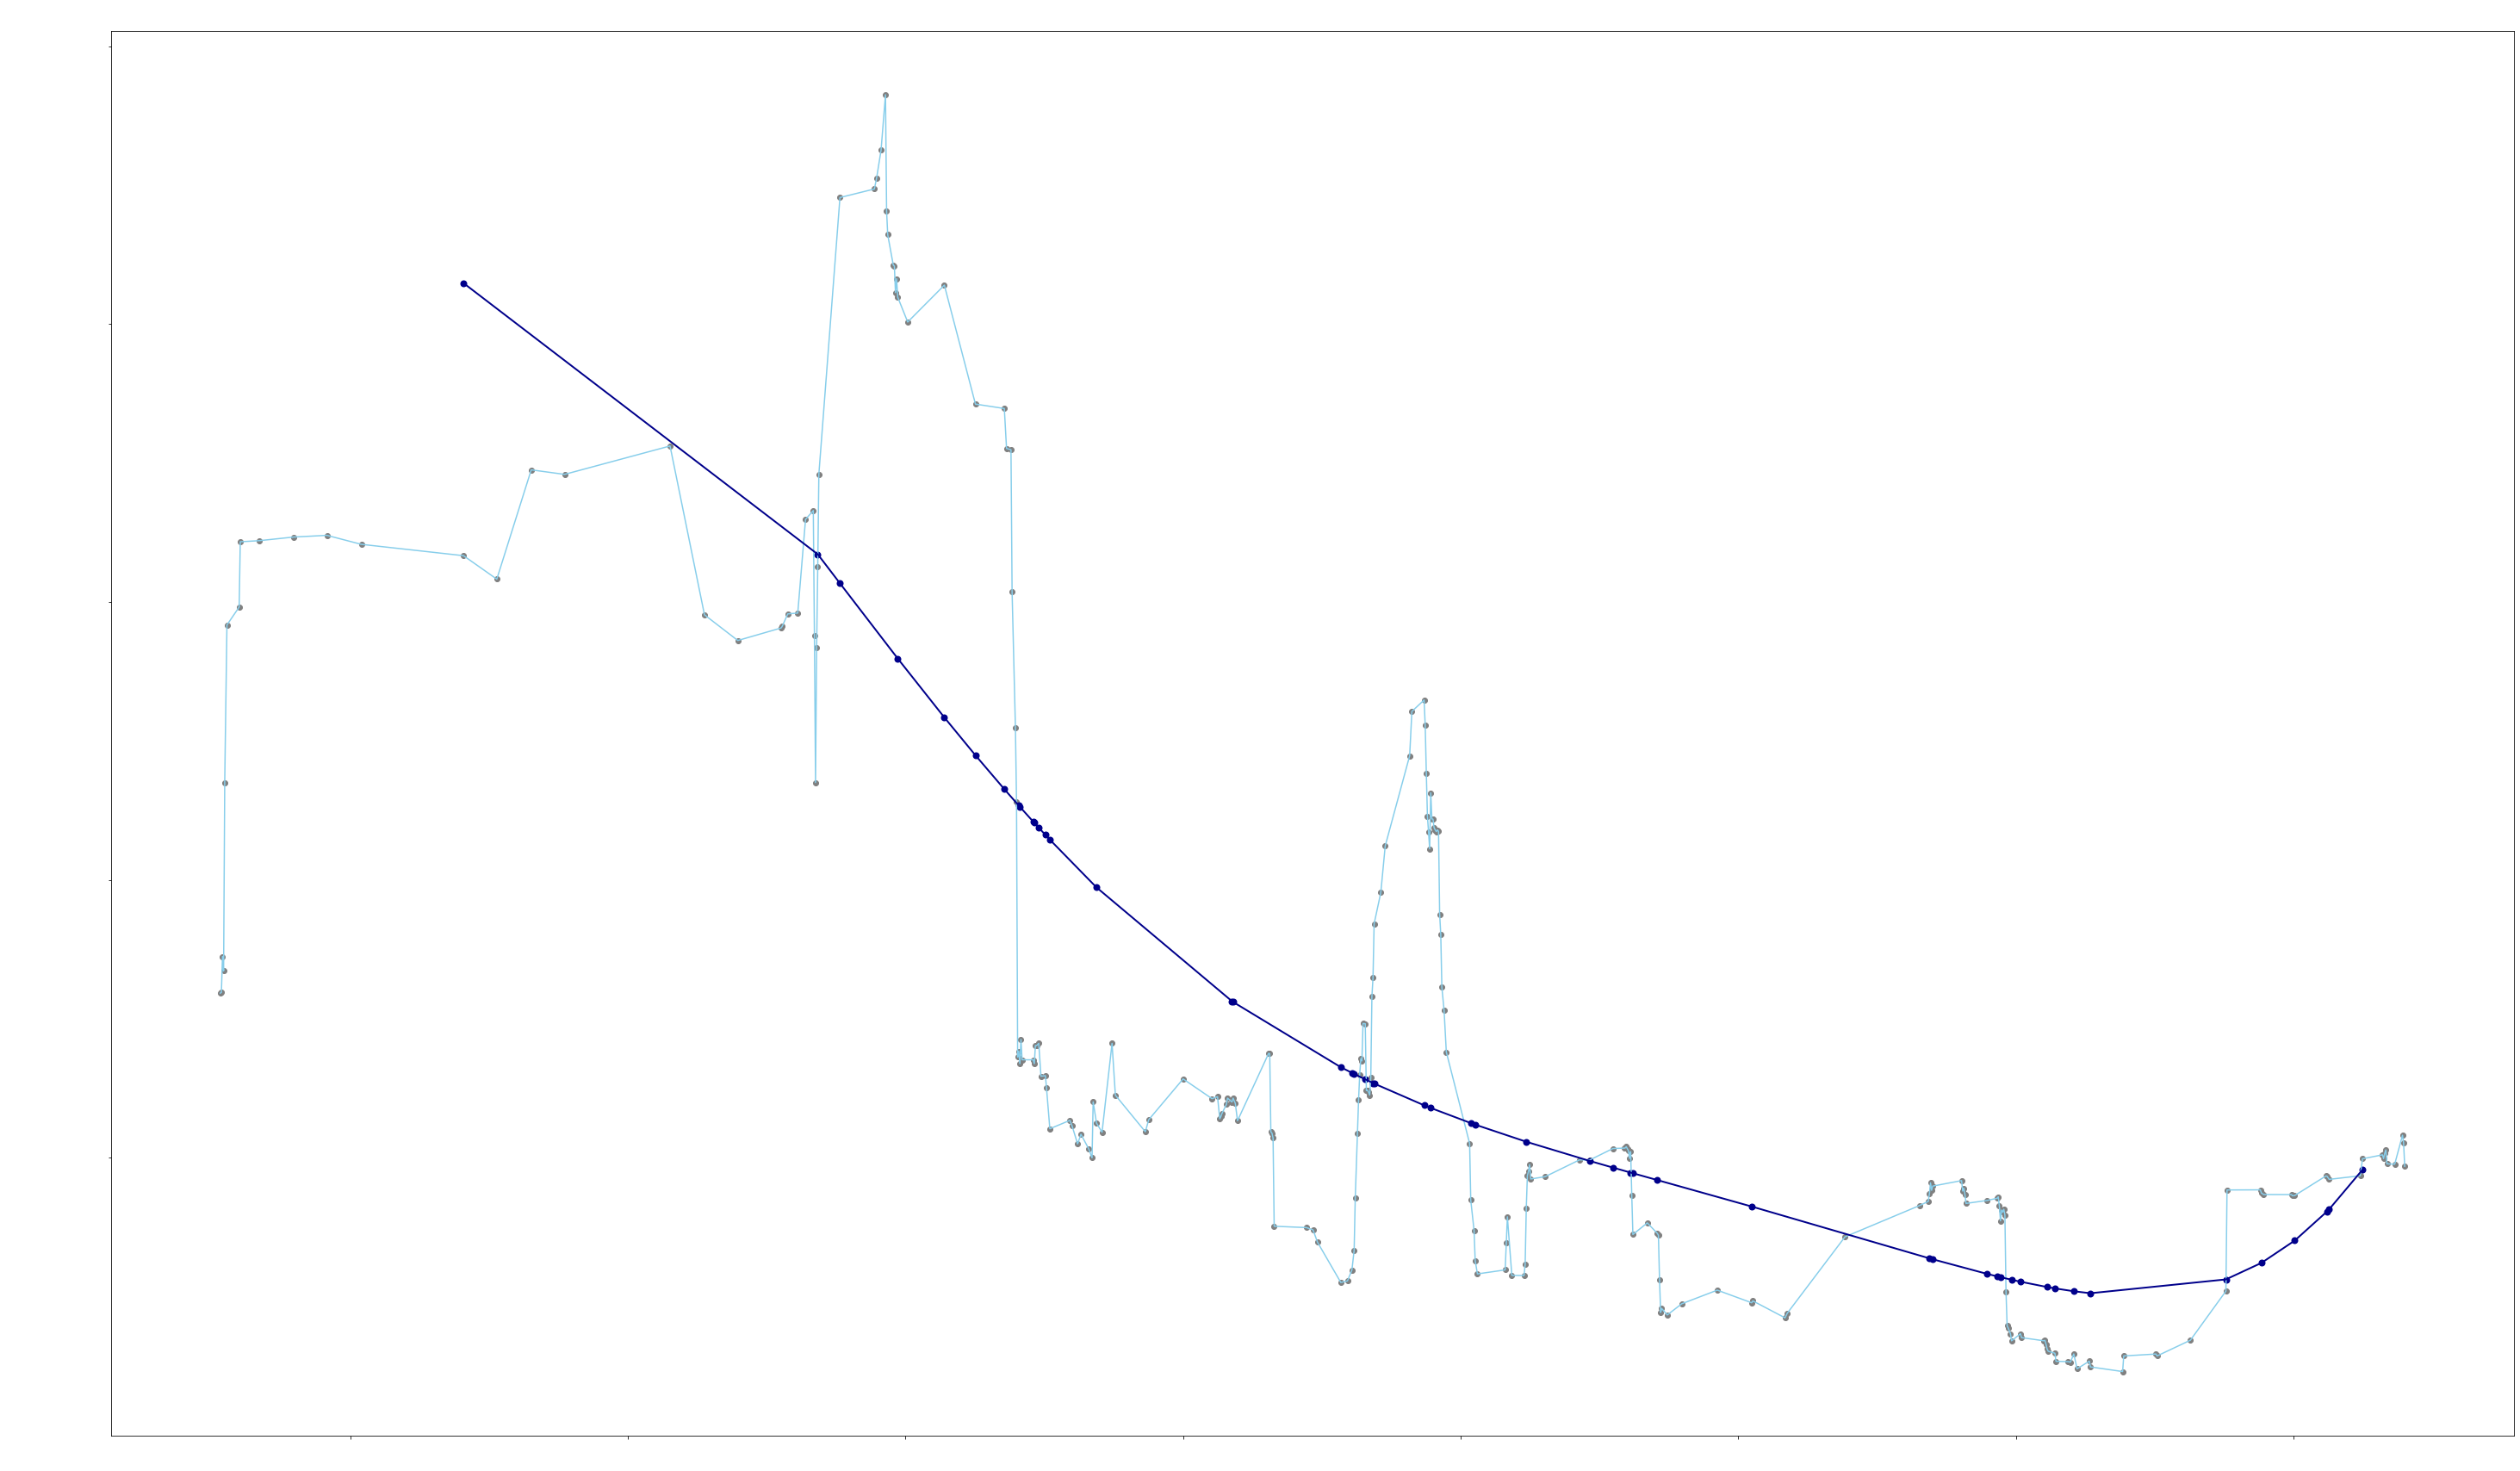

Linear Regressor performance:
Mean absolute error =  86578.71
Mean squared error =  10029532320.09
Median absolute error =  96226.91
Explained variance score =  -2.45
R2 score =  -2.45


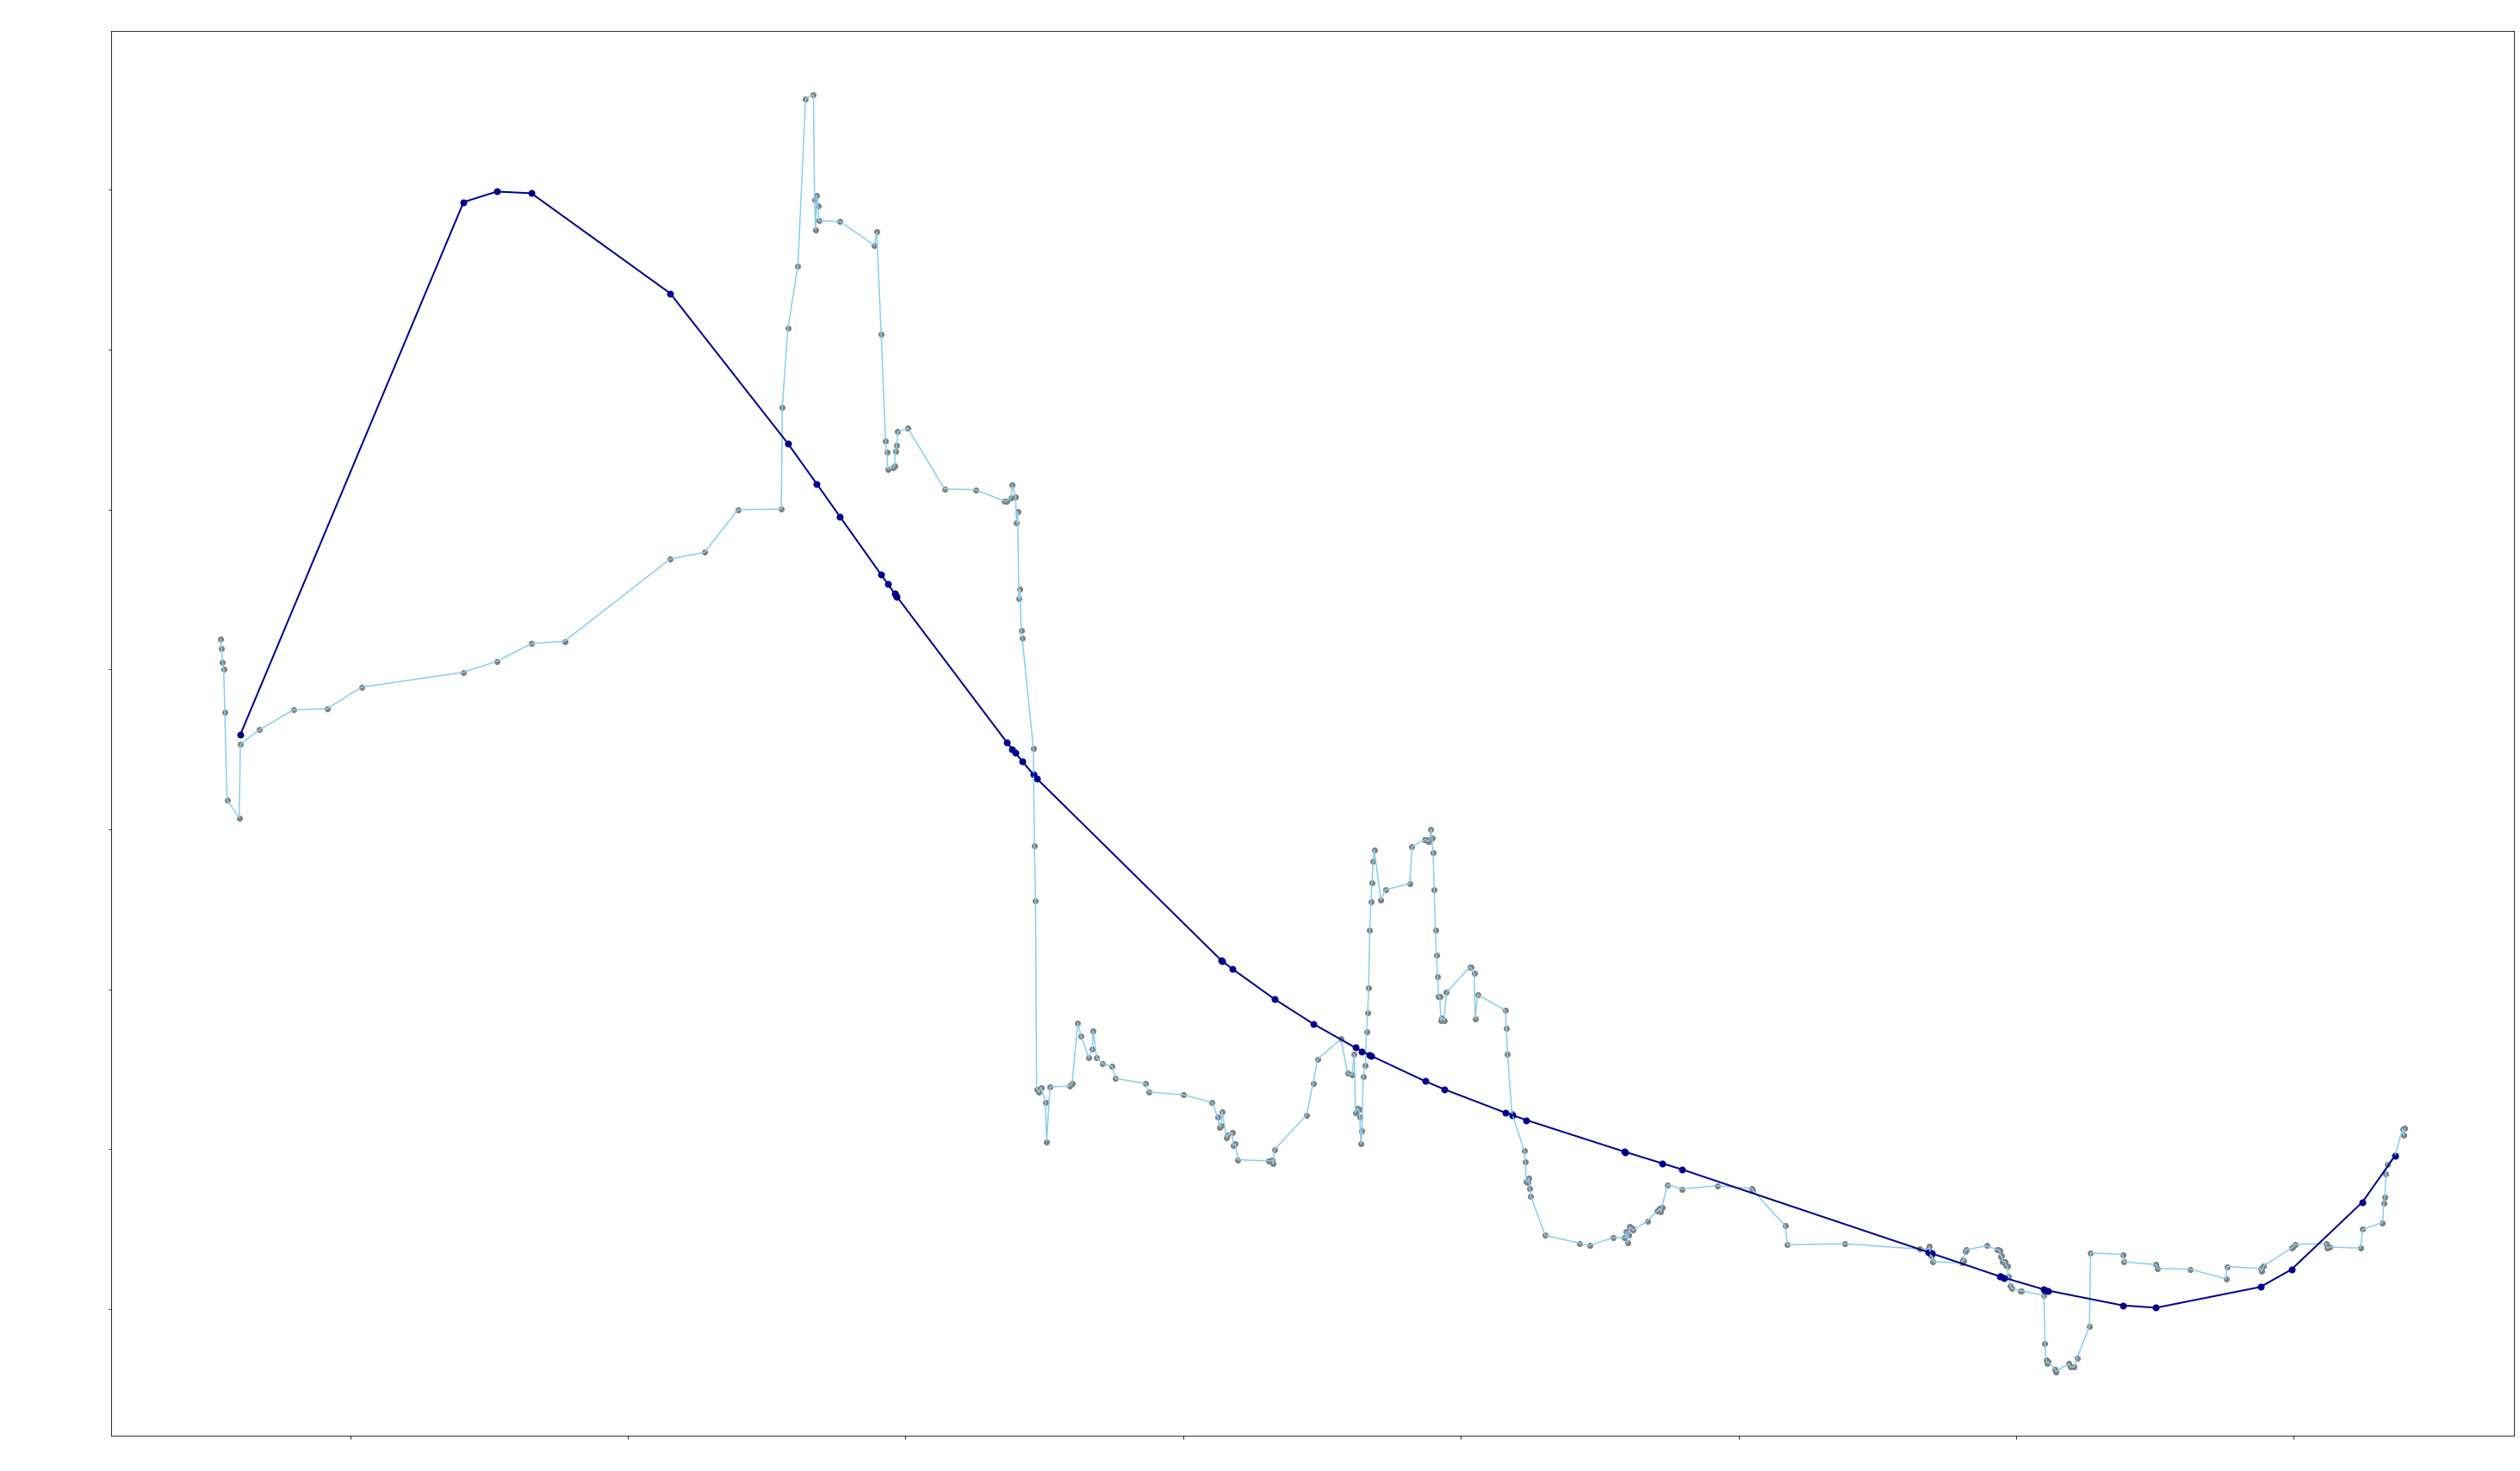

In [0]:
########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_original, y_original, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 5 > ] ##########
polynomial = PolynomialFeatures(degree=5)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 5 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_original, y_original, color='gray')
plt.plot(X_original, y_original, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_9, y_moving_average_9, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 5 > ] ##########
polynomial = PolynomialFeatures(degree=5)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 5 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_9, y_moving_average_9, color='gray')
plt.plot(X_moving_average_9, y_moving_average_9, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_21, y_moving_average_21, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 5 > ] ##########
polynomial = PolynomialFeatures(degree=5)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 5 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_21, y_moving_average_21, color='gray')
plt.plot(X_moving_average_21, y_moving_average_21, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_36, y_moving_average_36, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 5 > ] ##########
polynomial = PolynomialFeatures(degree=5)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 5 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_36, y_moving_average_36, color='gray')
plt.plot(X_moving_average_36, y_moving_average_36, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

THE REGRESSION WITH DEGREE = 6

Linear Regressor performance:
Mean absolute error =  96380.2
Mean squared error =  15711705785.41
Median absolute error =  84826.03
Explained variance score =  -1.28
R2 score =  -1.3


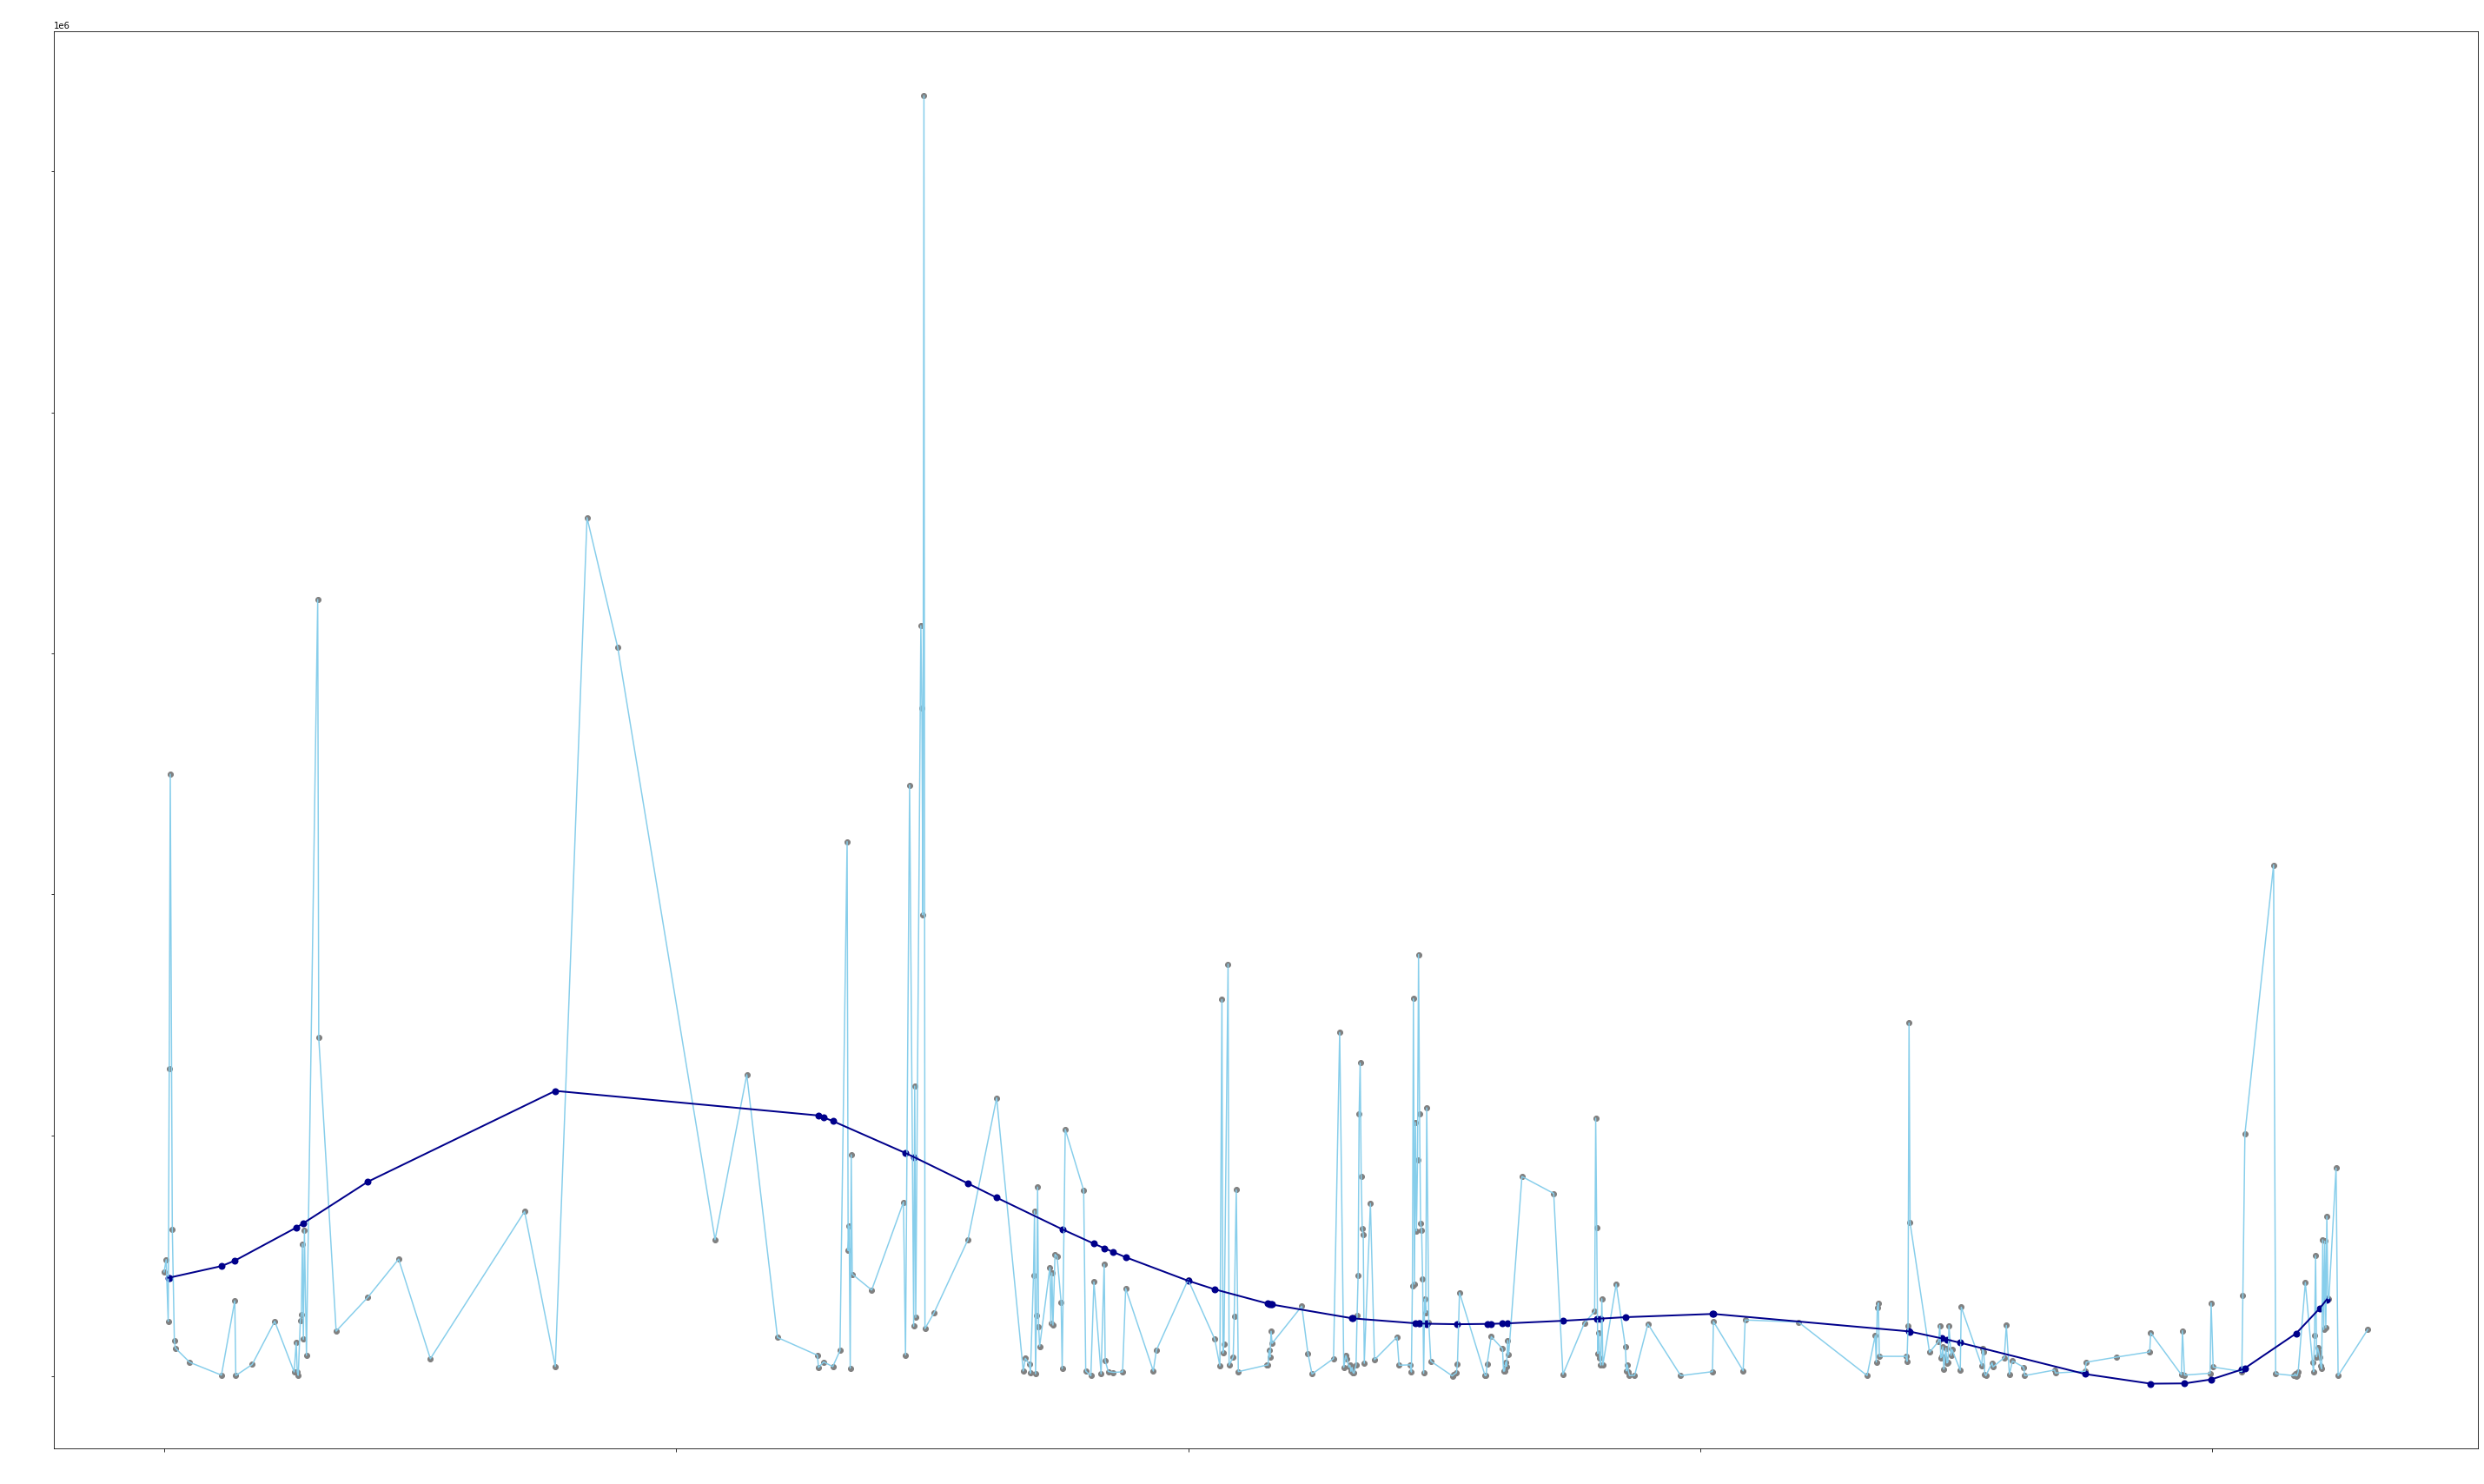

Linear Regressor performance:
Mean absolute error =  79219.47
Mean squared error =  10232105403.14
Median absolute error =  62394.0
Explained variance score =  -1.48
R2 score =  -1.49


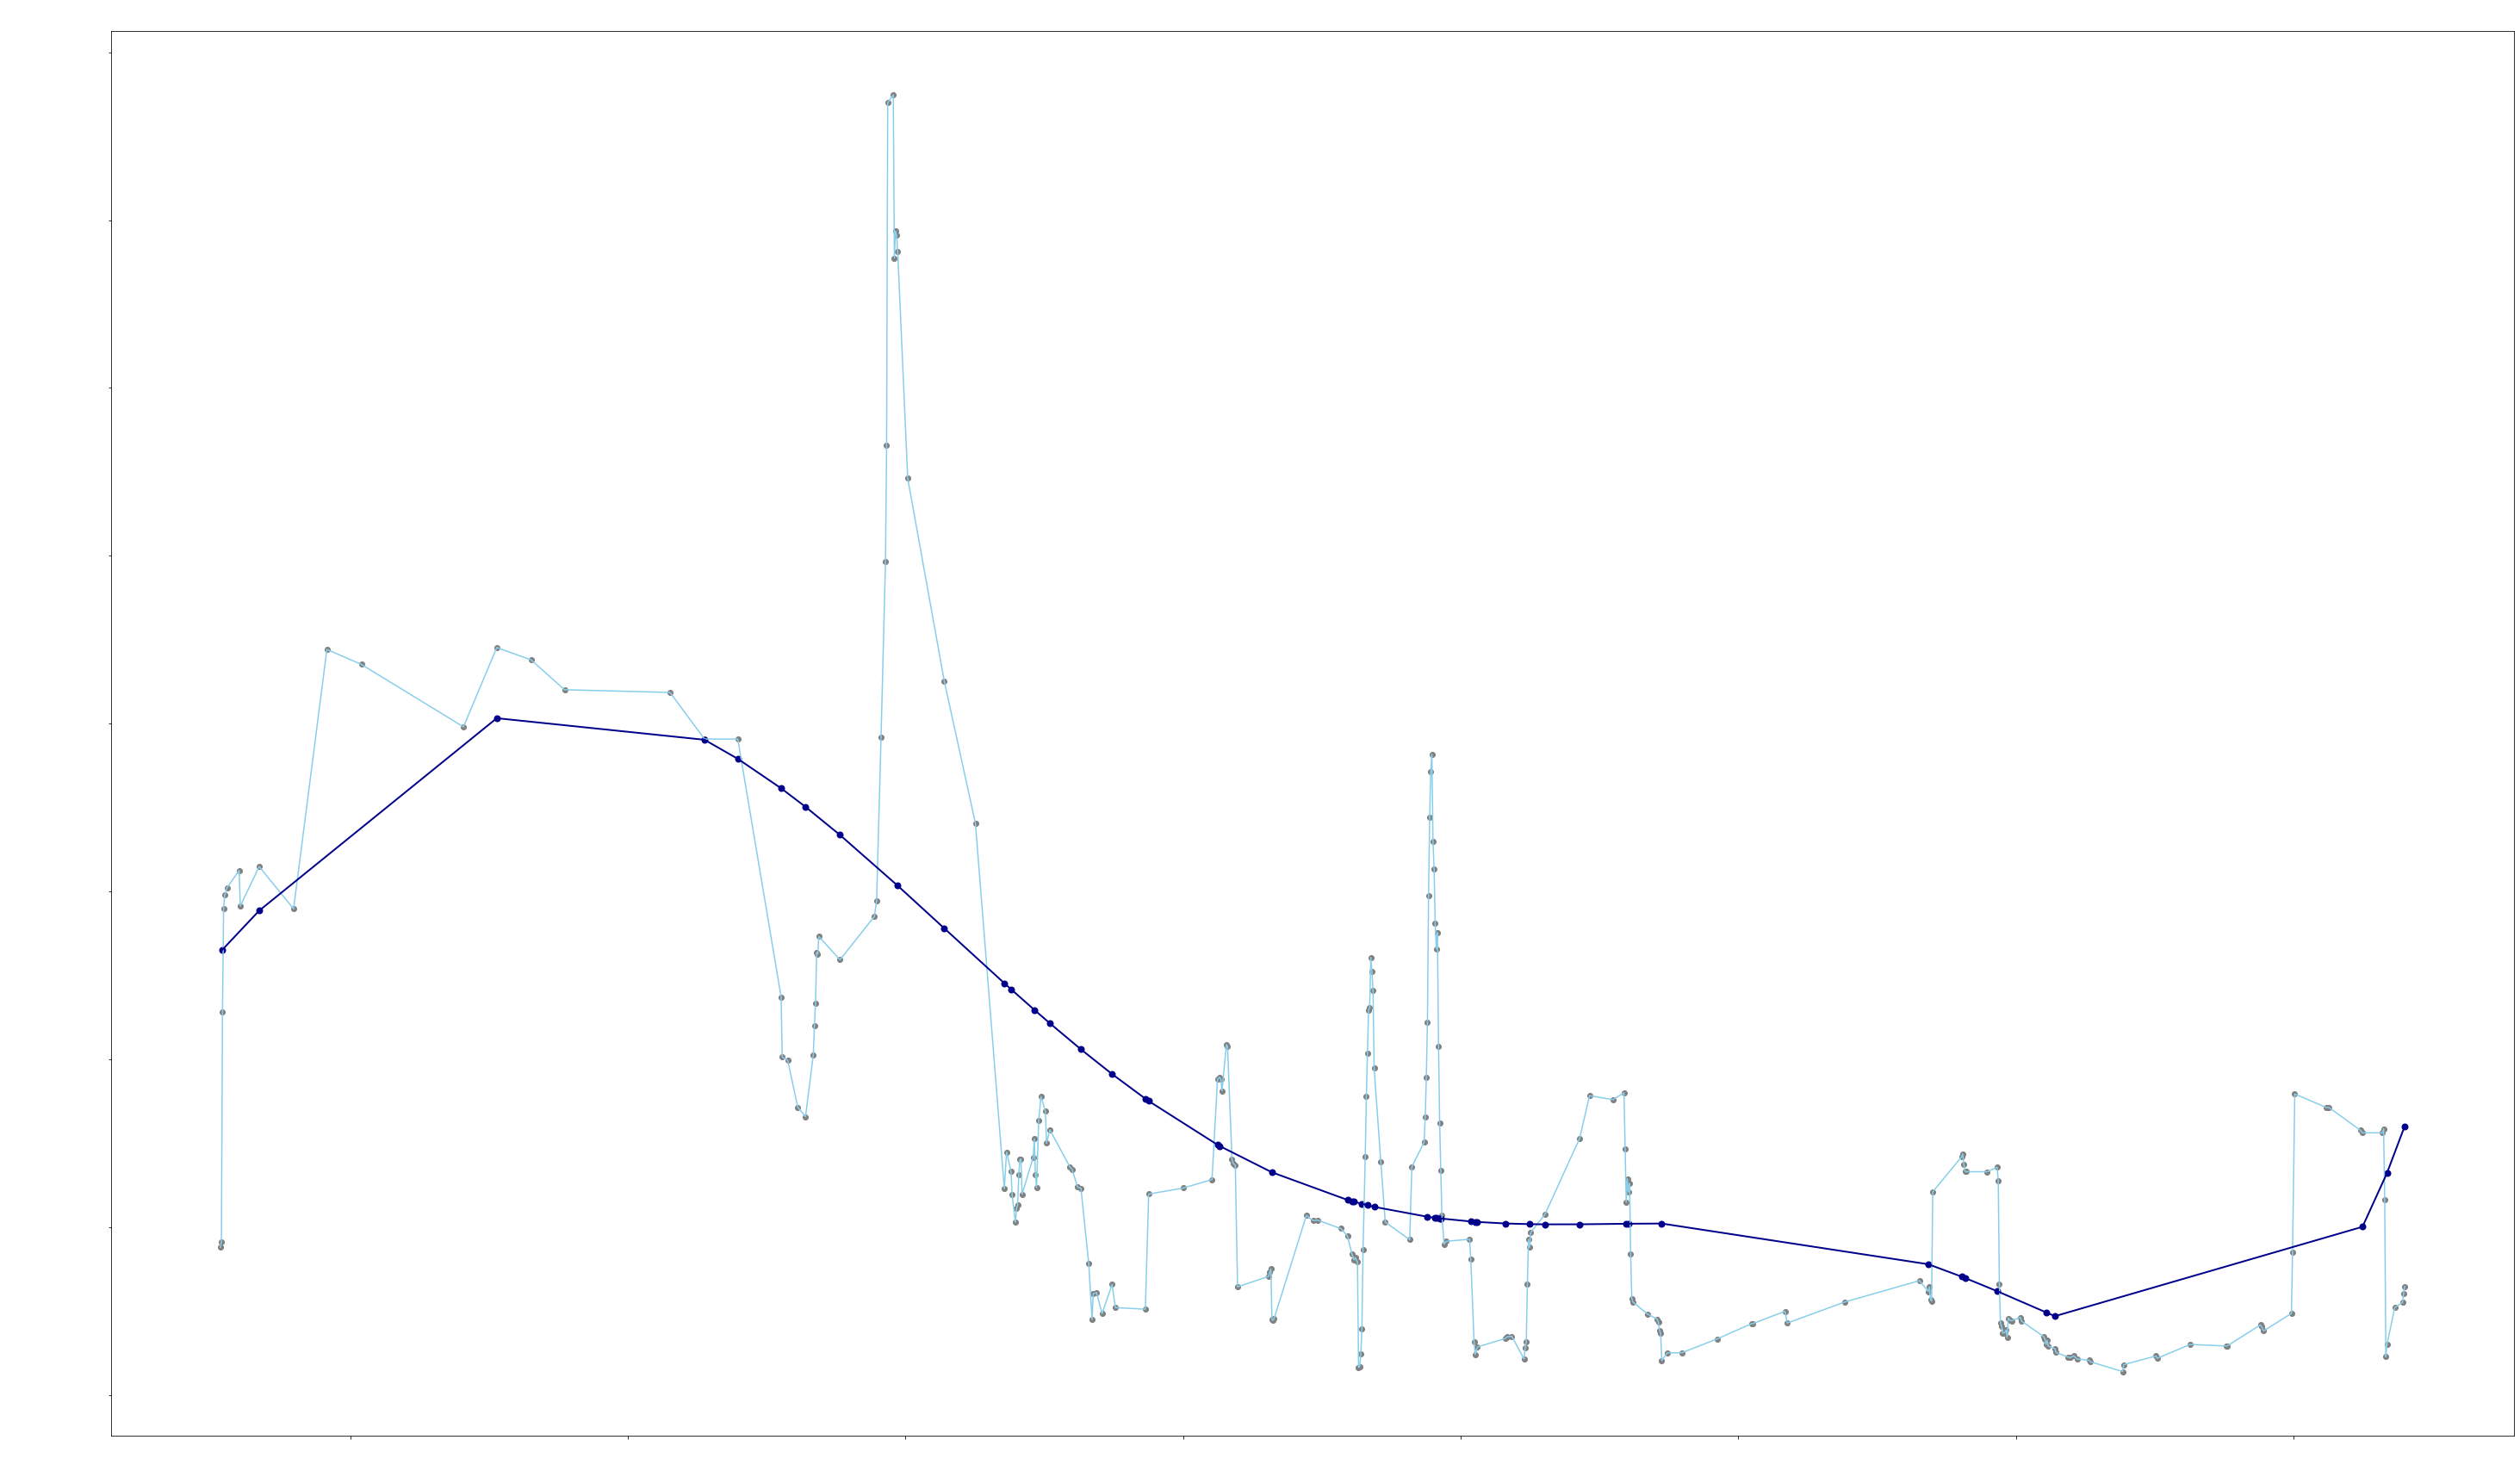

Linear Regressor performance:
Mean absolute error =  76682.38
Mean squared error =  9219339054.32
Median absolute error =  73373.32
Explained variance score =  -1.86
R2 score =  -1.86


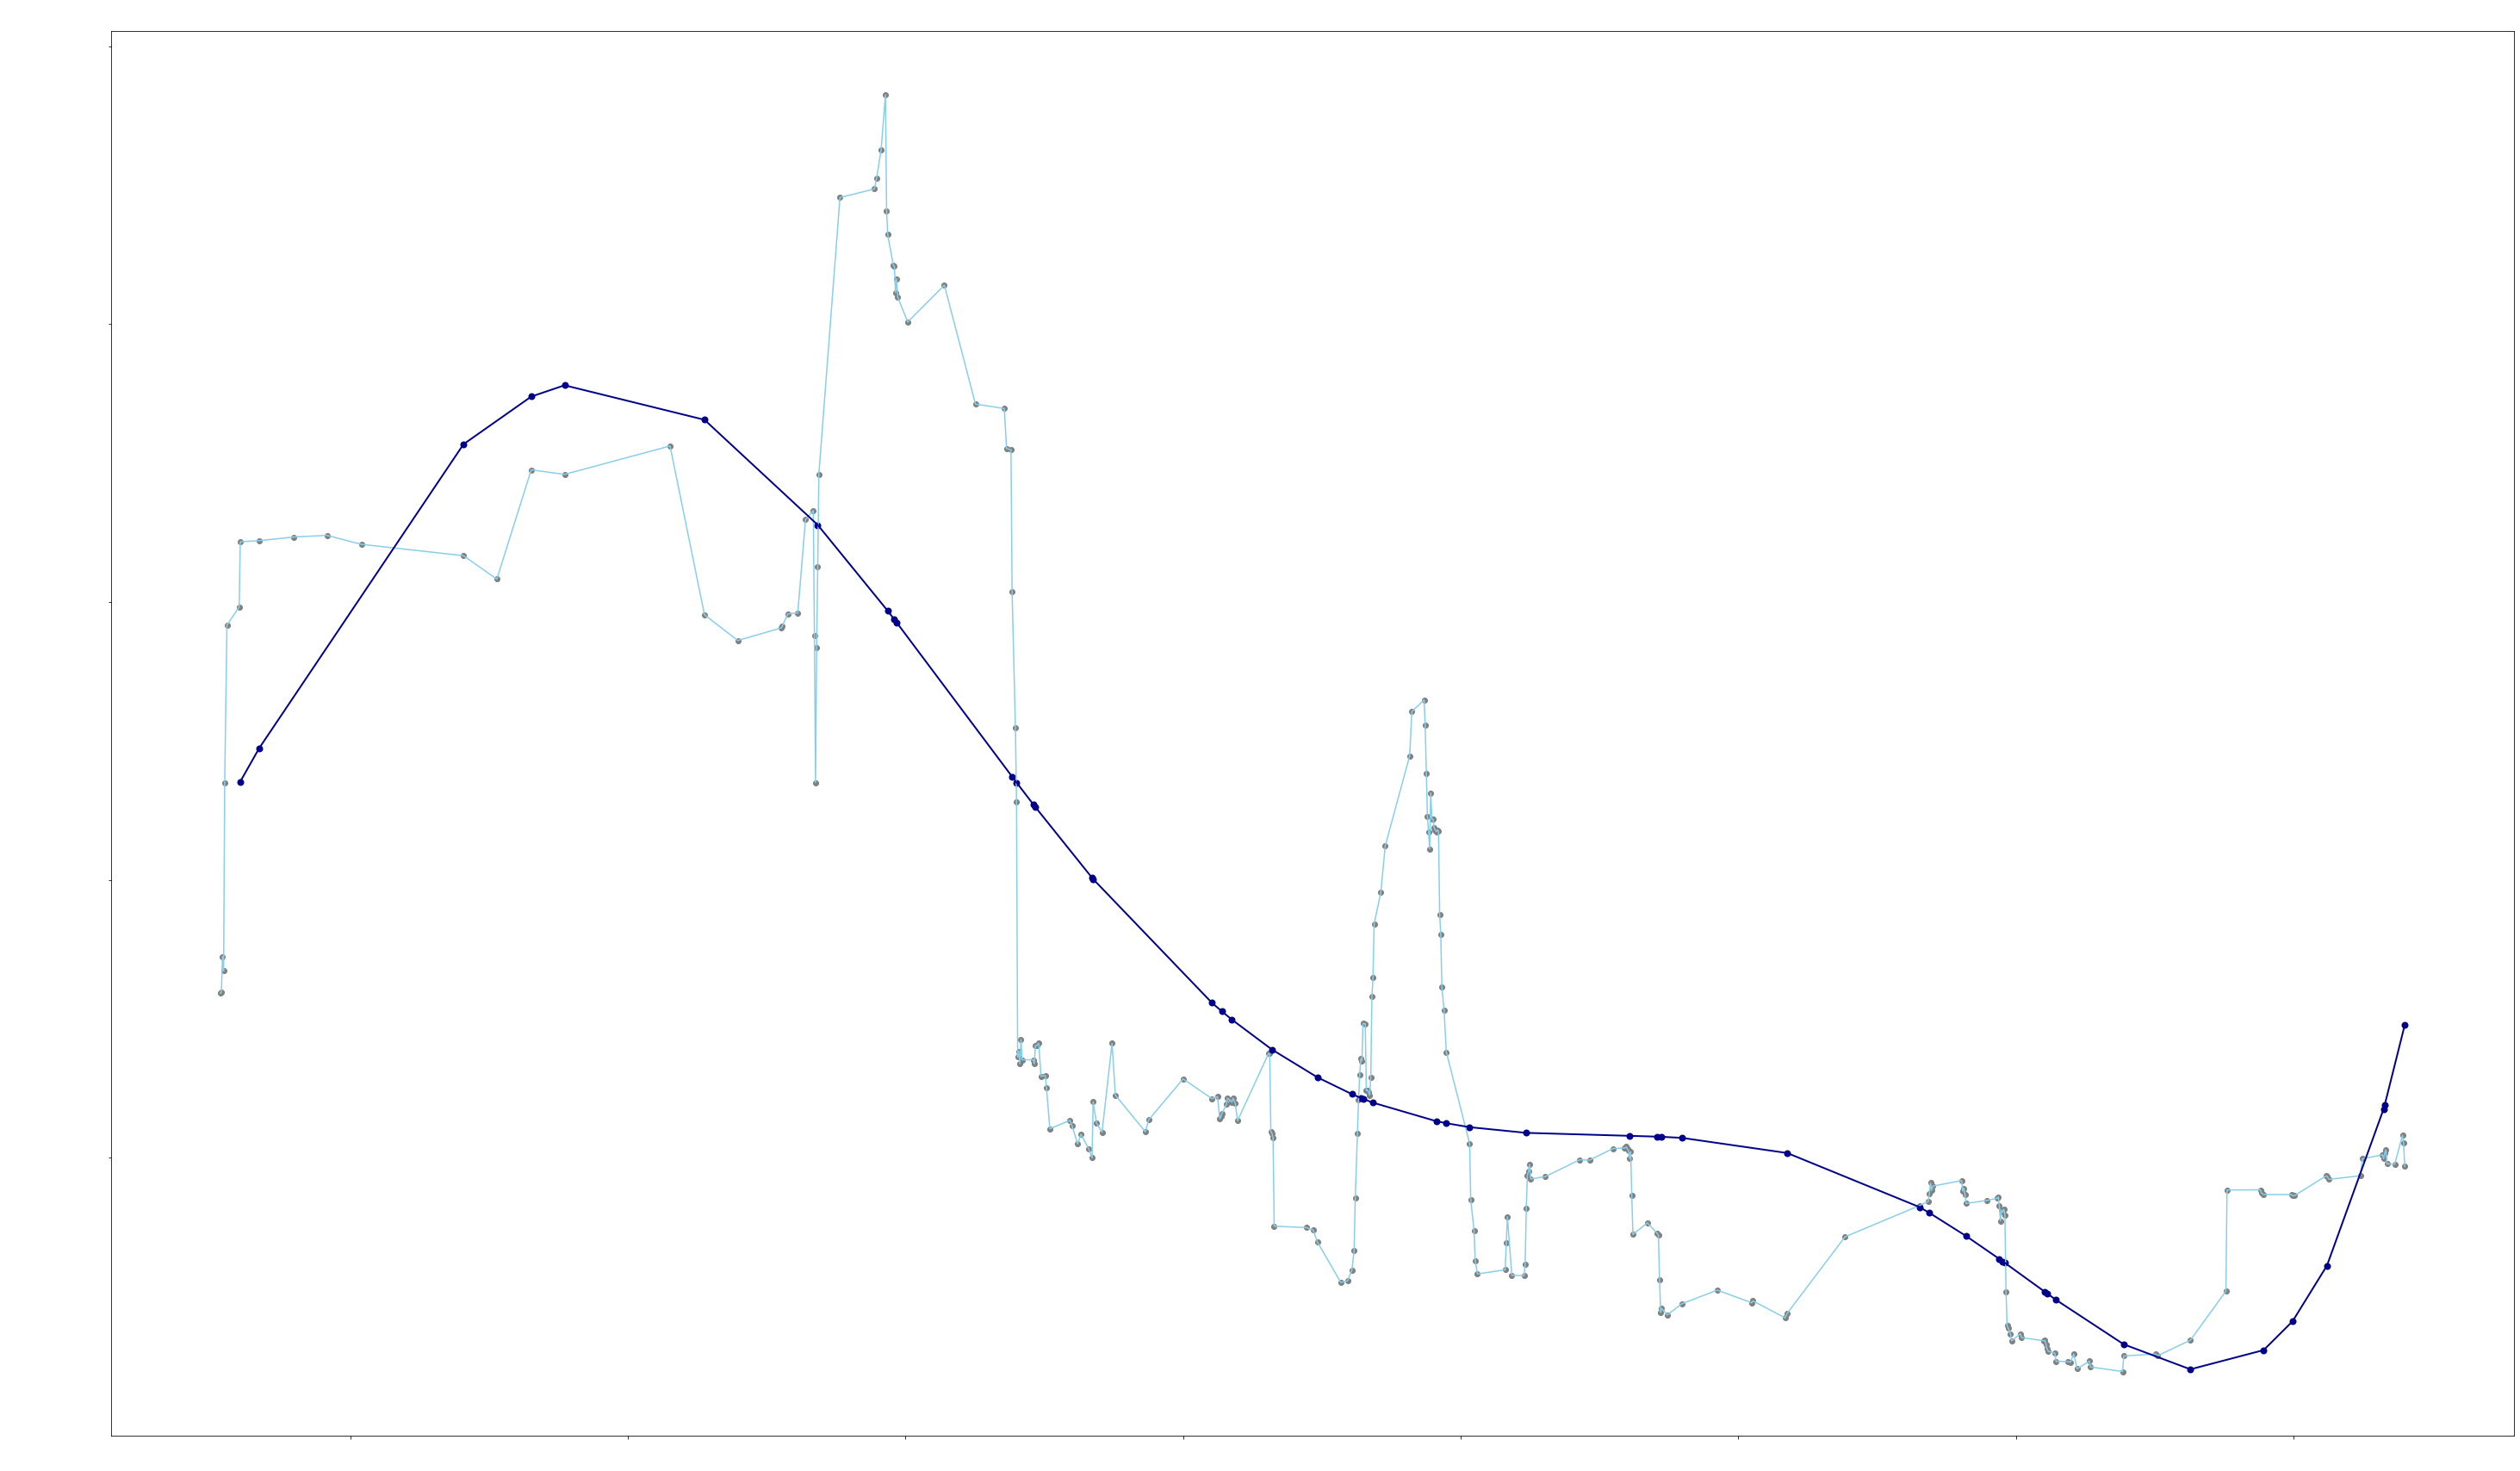

Linear Regressor performance:
Mean absolute error =  62852.27
Mean squared error =  6275075832.66
Median absolute error =  55472.67
Explained variance score =  -1.8
R2 score =  -1.8


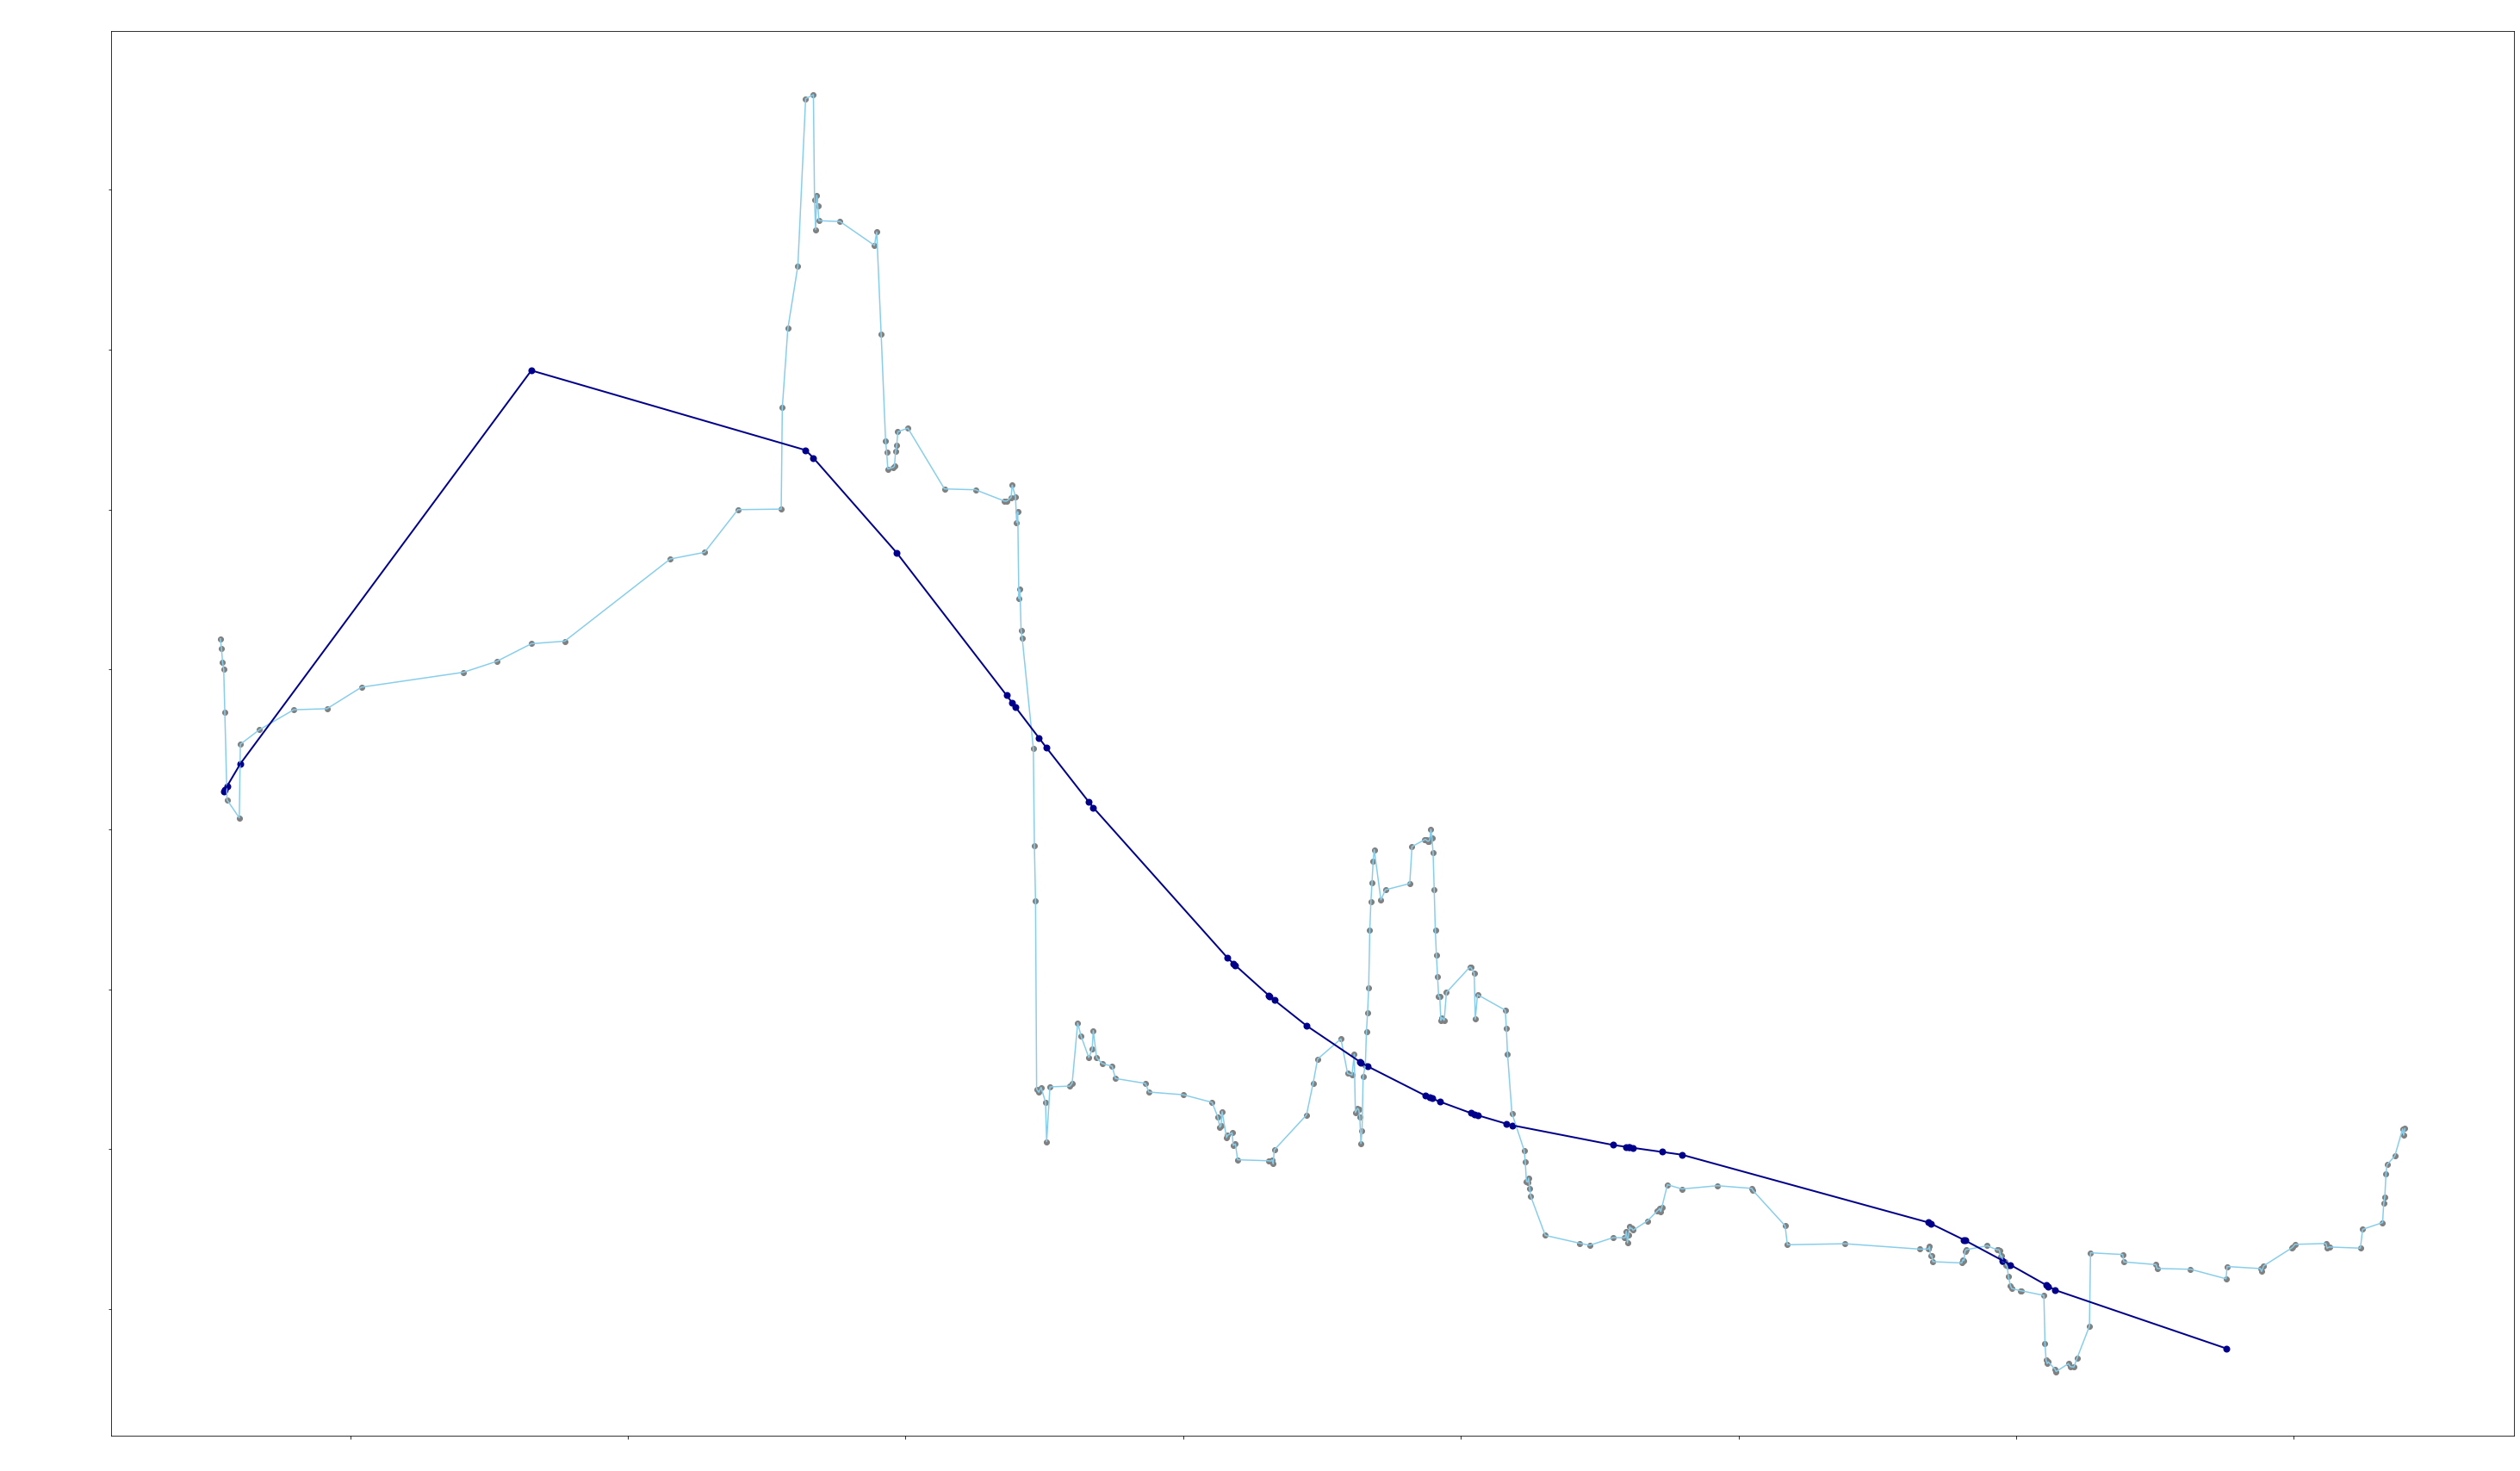

In [0]:
########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_original, y_original, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 6 > ] ##########
polynomial = PolynomialFeatures(degree=6)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 6 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_original, y_original, color='gray')
plt.plot(X_original, y_original, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_9, y_moving_average_9, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 6 > ] ##########
polynomial = PolynomialFeatures(degree=6)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 6 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_9, y_moving_average_9, color='gray')
plt.plot(X_moving_average_9, y_moving_average_9, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_21, y_moving_average_21, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 6 > ] ##########
polynomial = PolynomialFeatures(degree=6)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 6 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_21, y_moving_average_21, color='gray')
plt.plot(X_moving_average_21, y_moving_average_21, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_36, y_moving_average_36, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 6 > ] ##########
polynomial = PolynomialFeatures(degree=6)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 6 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_36, y_moving_average_36, color='gray')
plt.plot(X_moving_average_36, y_moving_average_36, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

THE REGRESSION WITH DEGREE = 7

Linear Regressor performance:
Mean absolute error =  97028.05
Mean squared error =  29289126058.23
Median absolute error =  72750.63
Explained variance score =  -0.18
R2 score =  -0.18


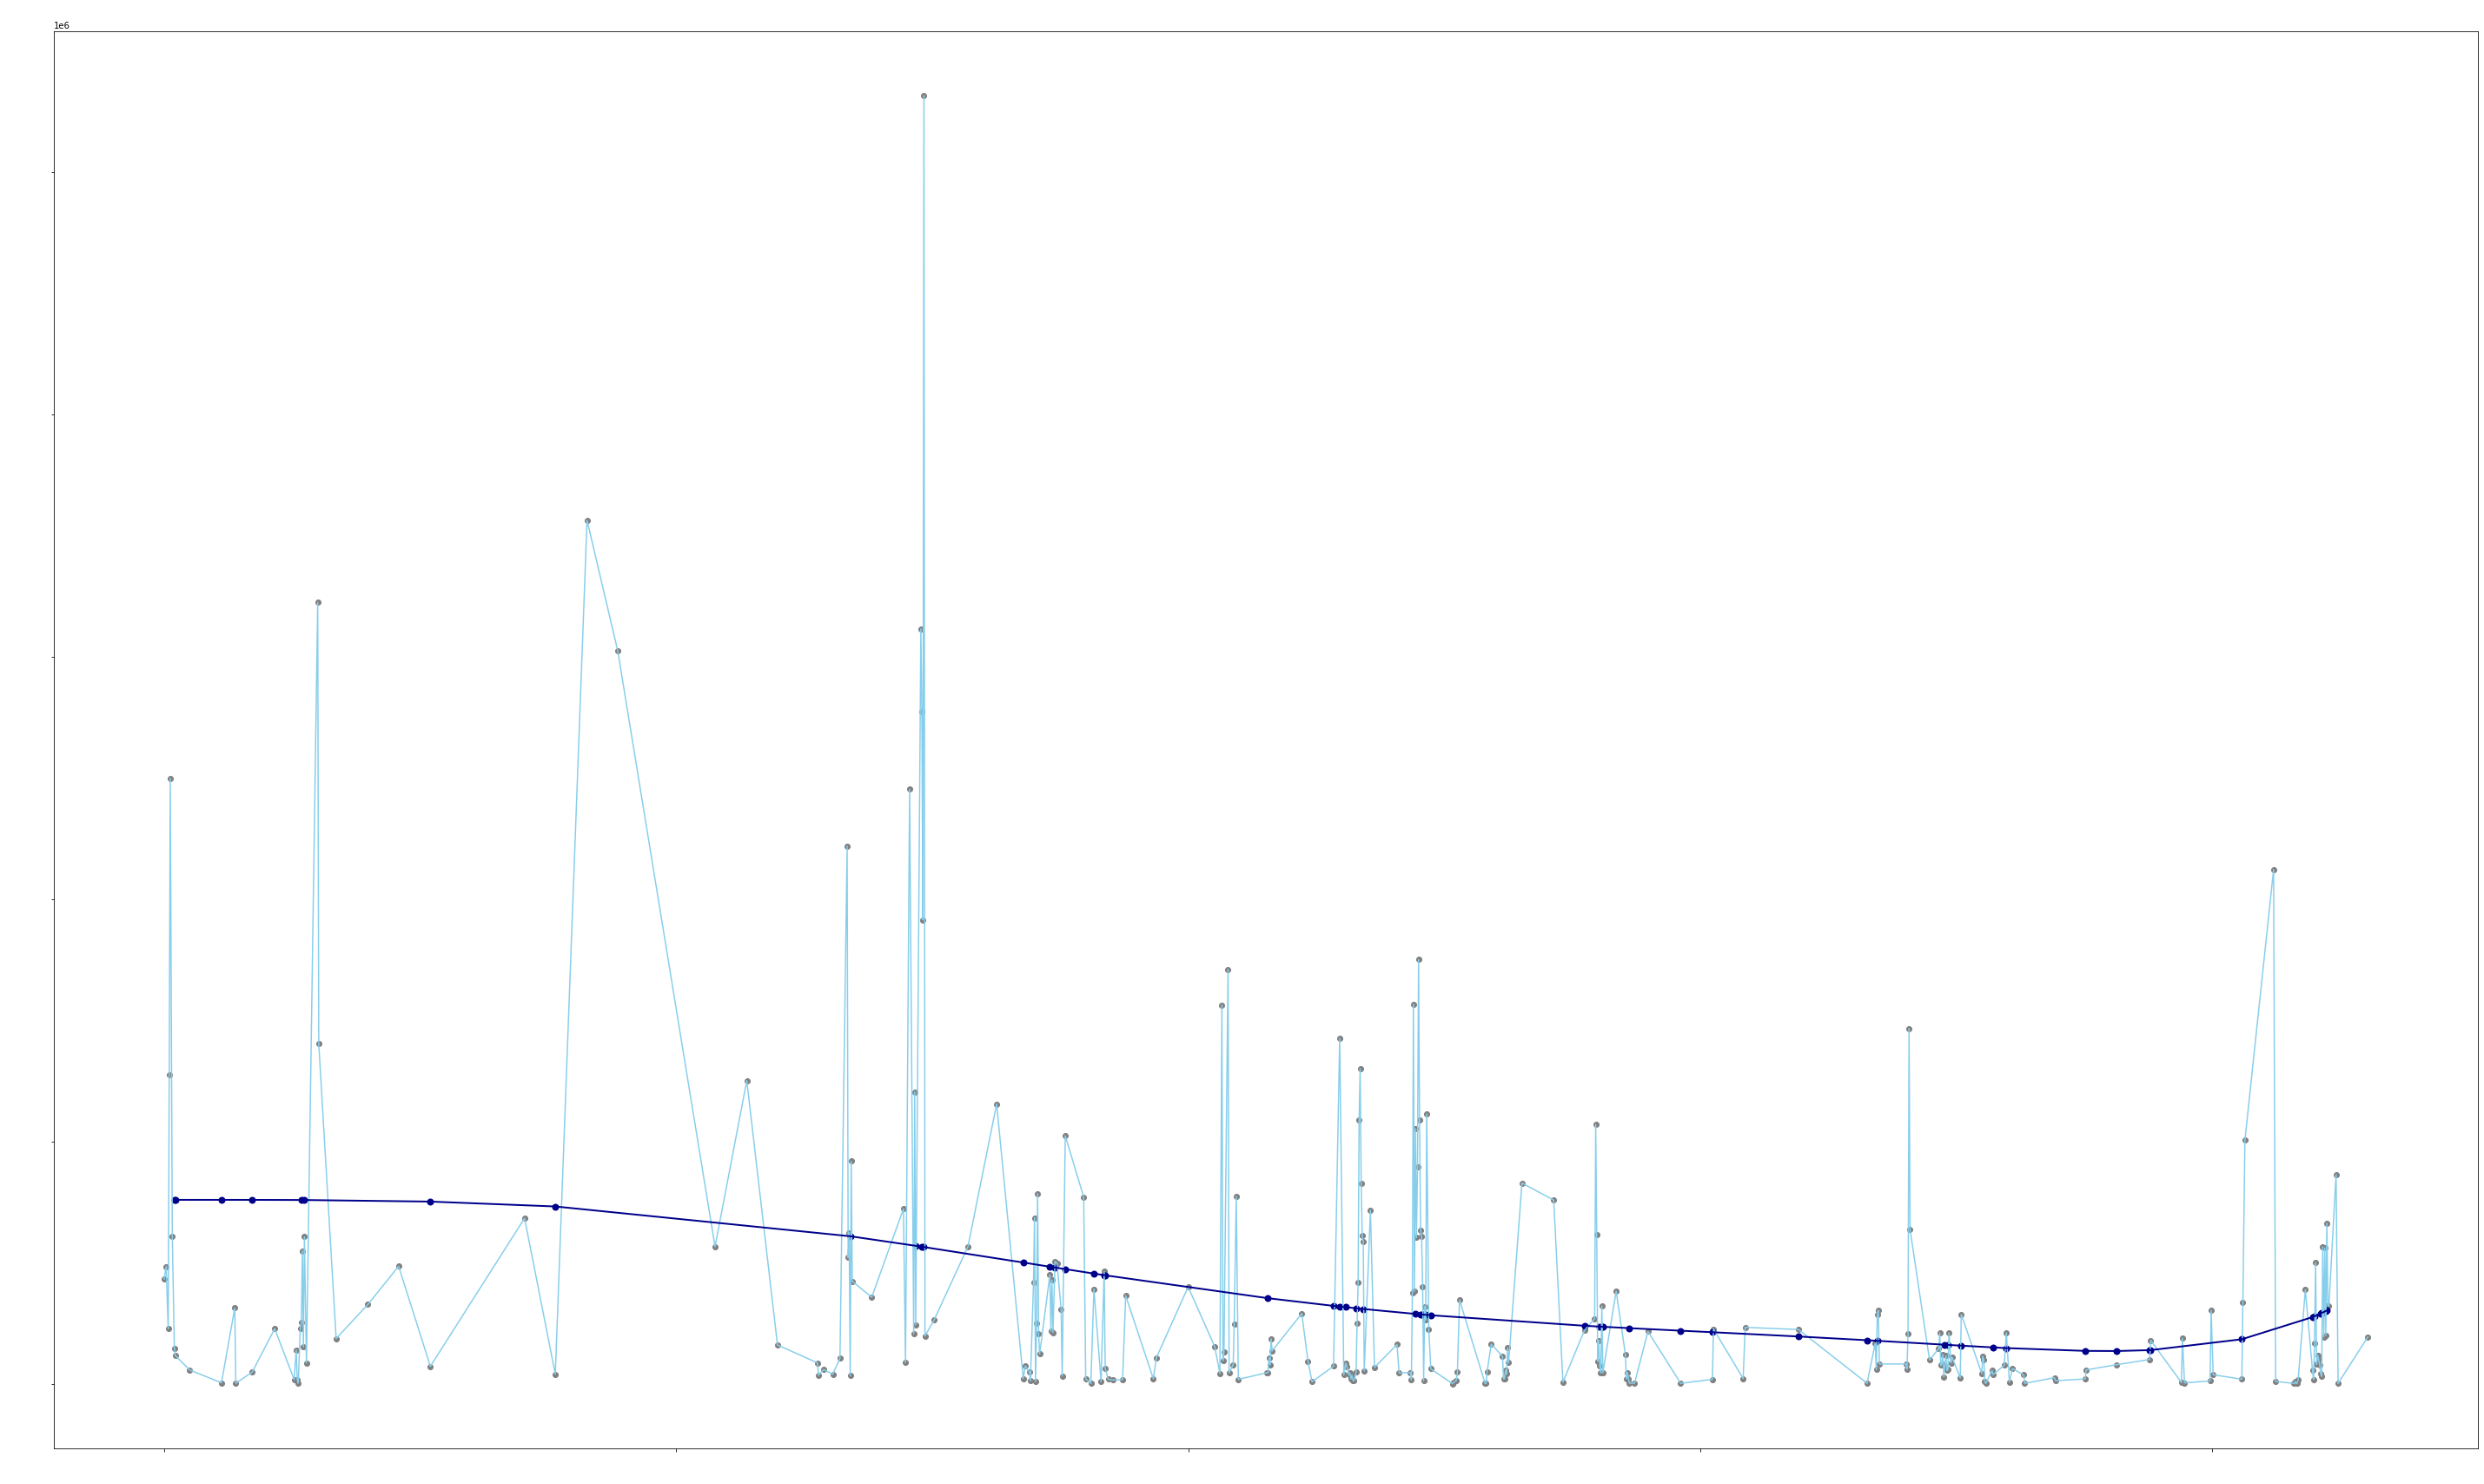

Linear Regressor performance:
Mean absolute error =  86214.36
Mean squared error =  12799026066.74
Median absolute error =  69672.43
Explained variance score =  -0.98
R2 score =  -1.0


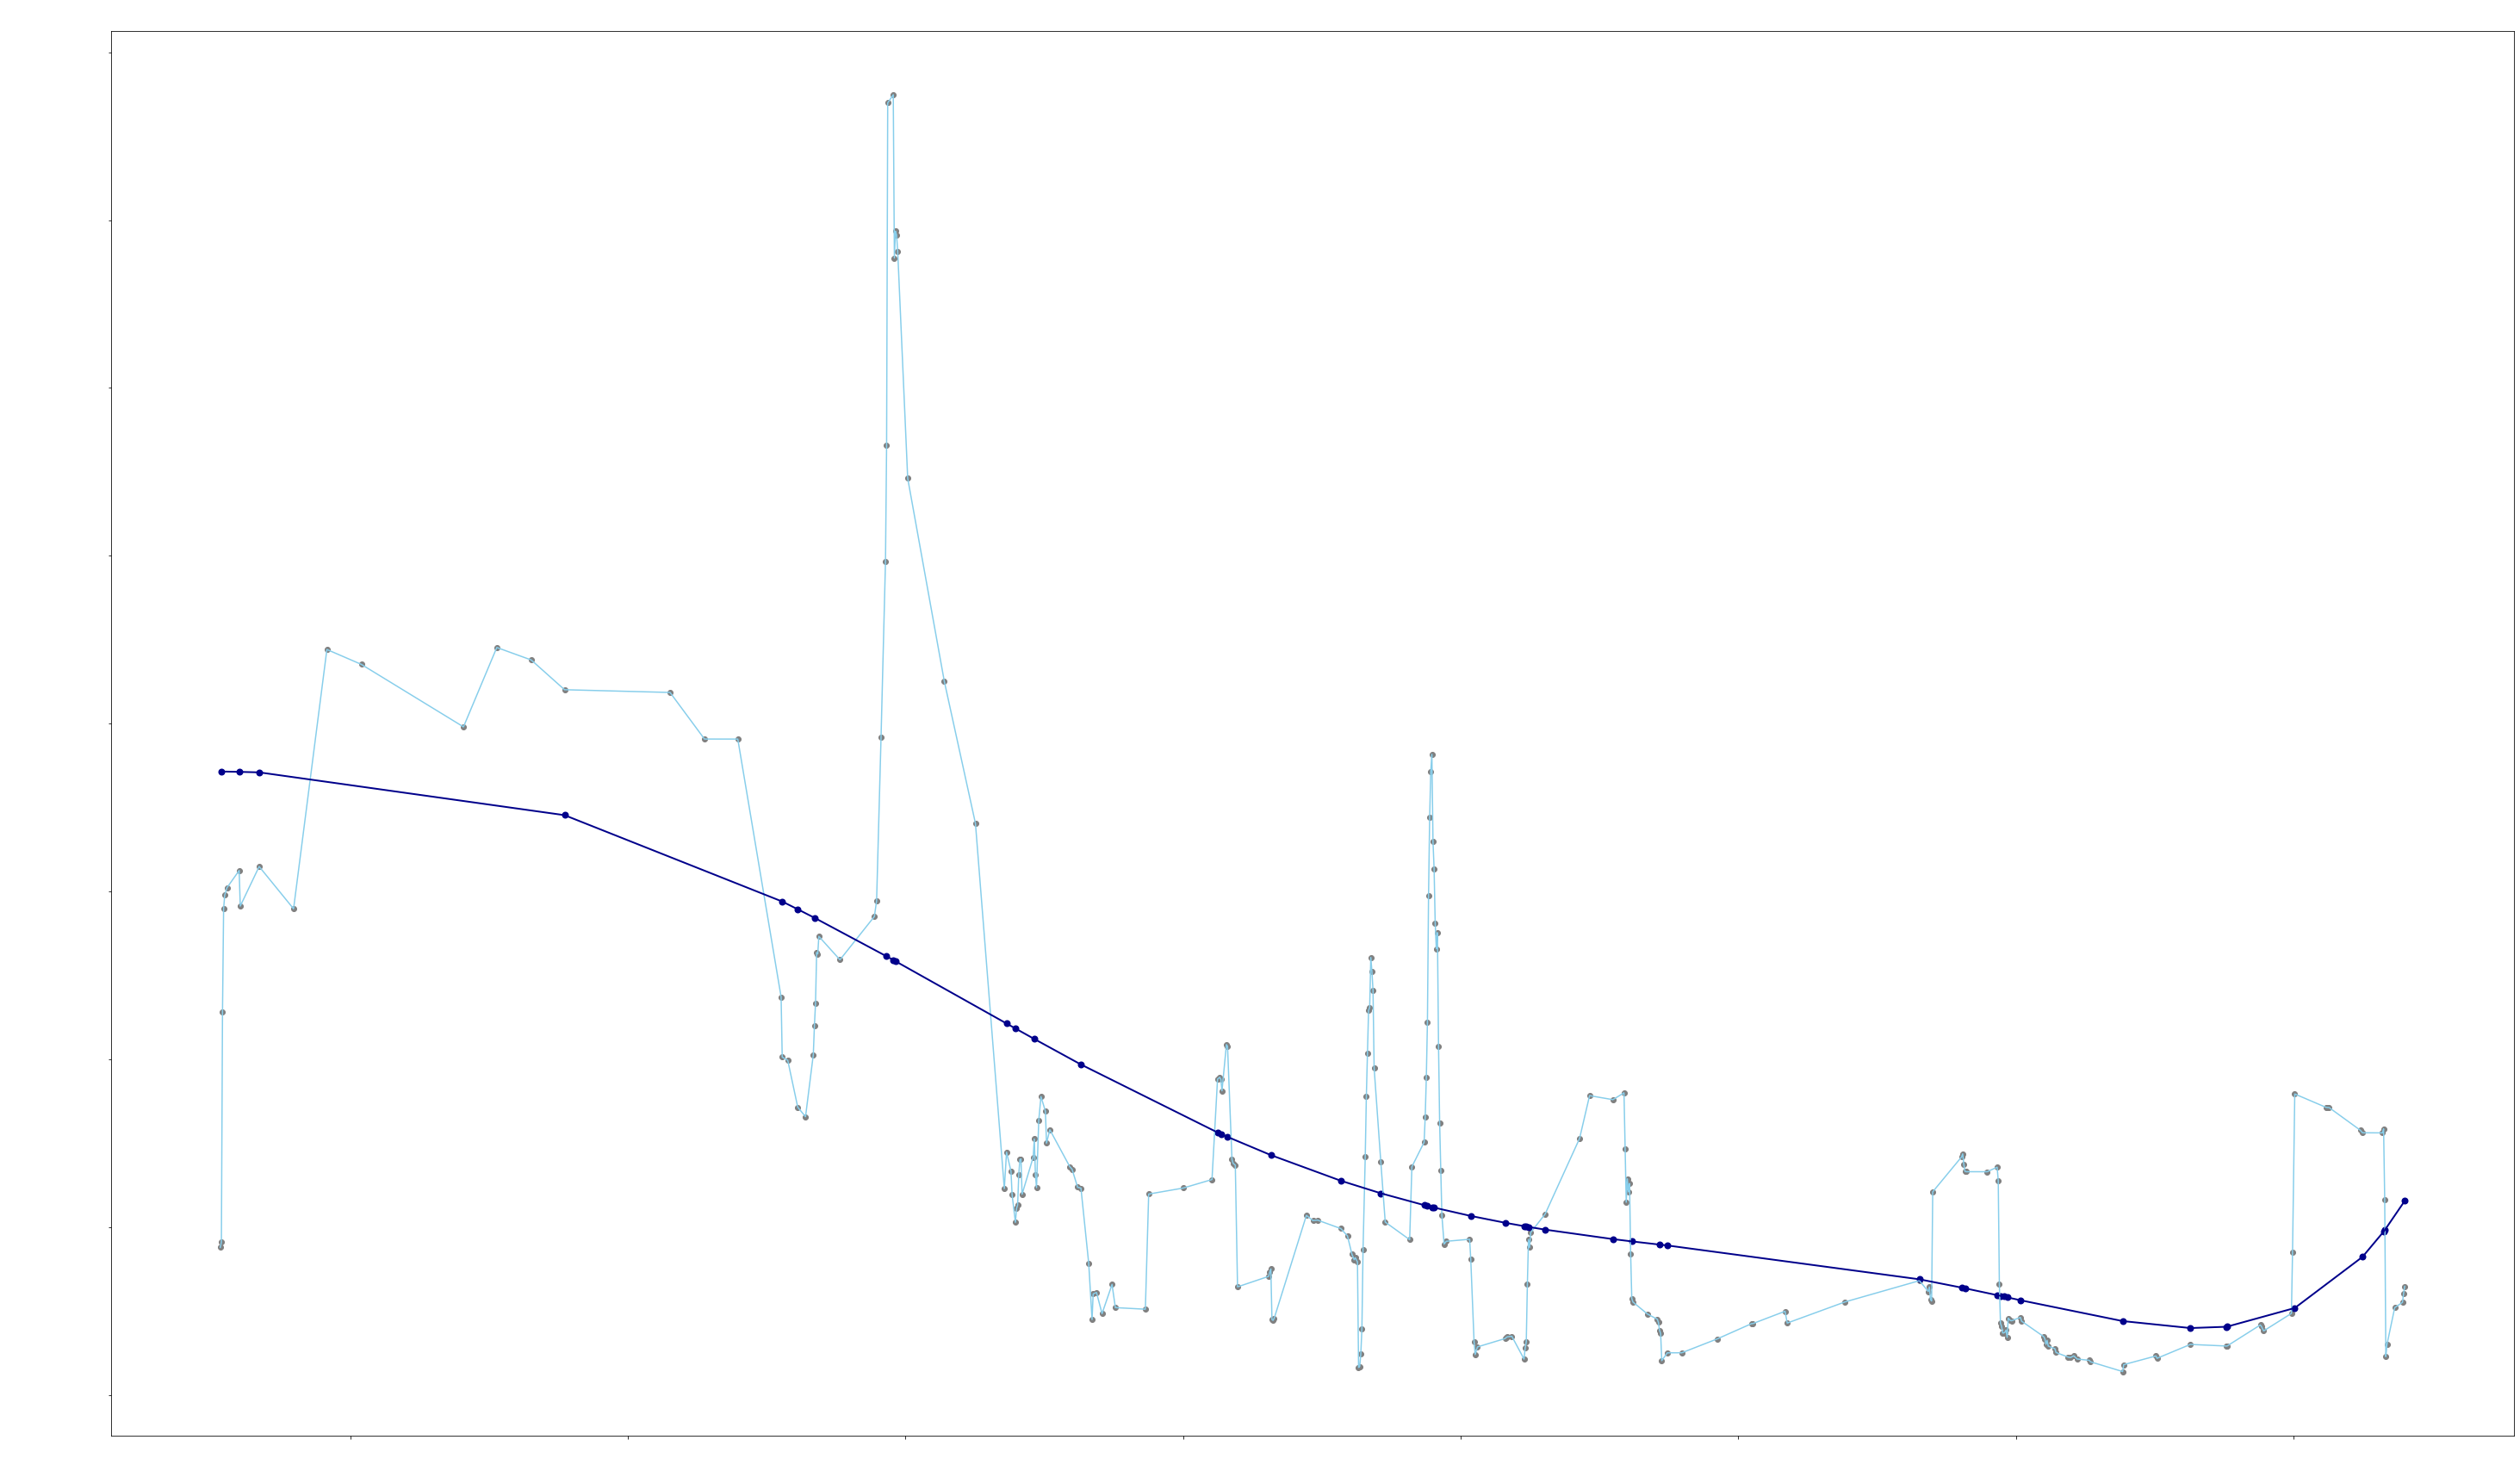

Linear Regressor performance:
Mean absolute error =  75447.7
Mean squared error =  8278000718.86
Median absolute error =  74454.39
Explained variance score =  -1.92
R2 score =  -1.92


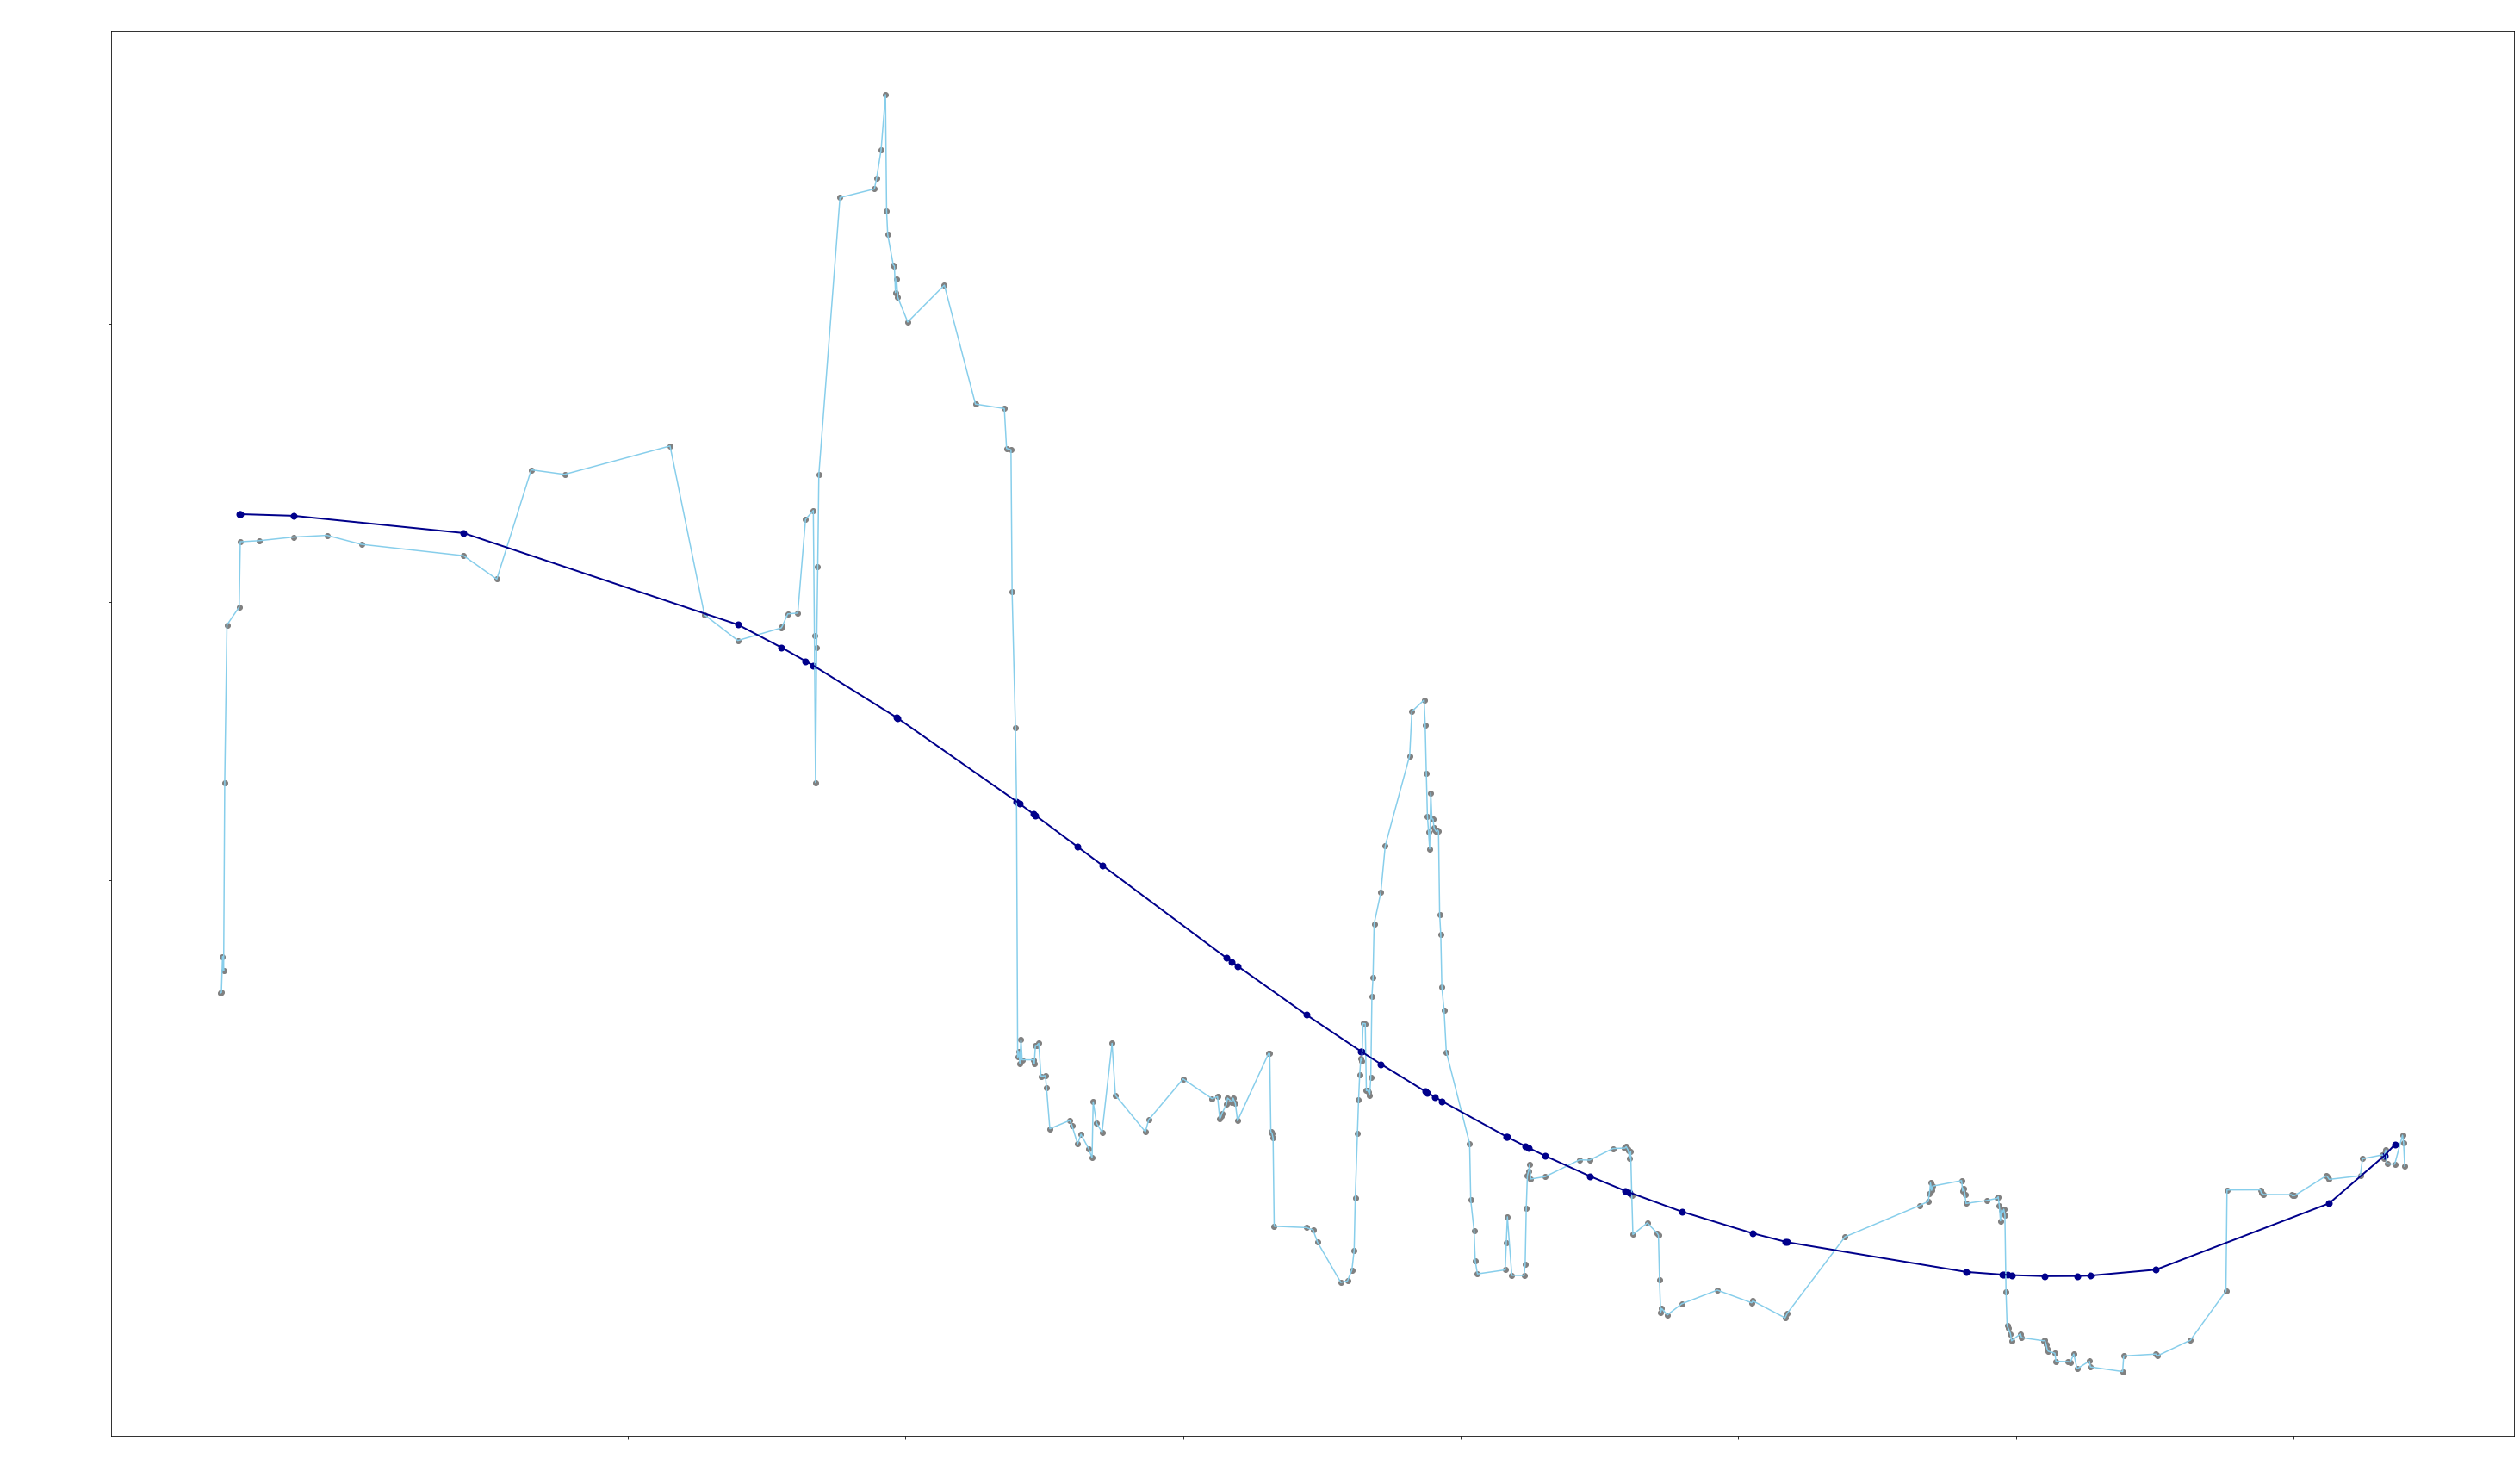

Linear Regressor performance:
Mean absolute error =  56827.45
Mean squared error =  4831162601.71
Median absolute error =  46915.3
Explained variance score =  -1.89
R2 score =  -1.89


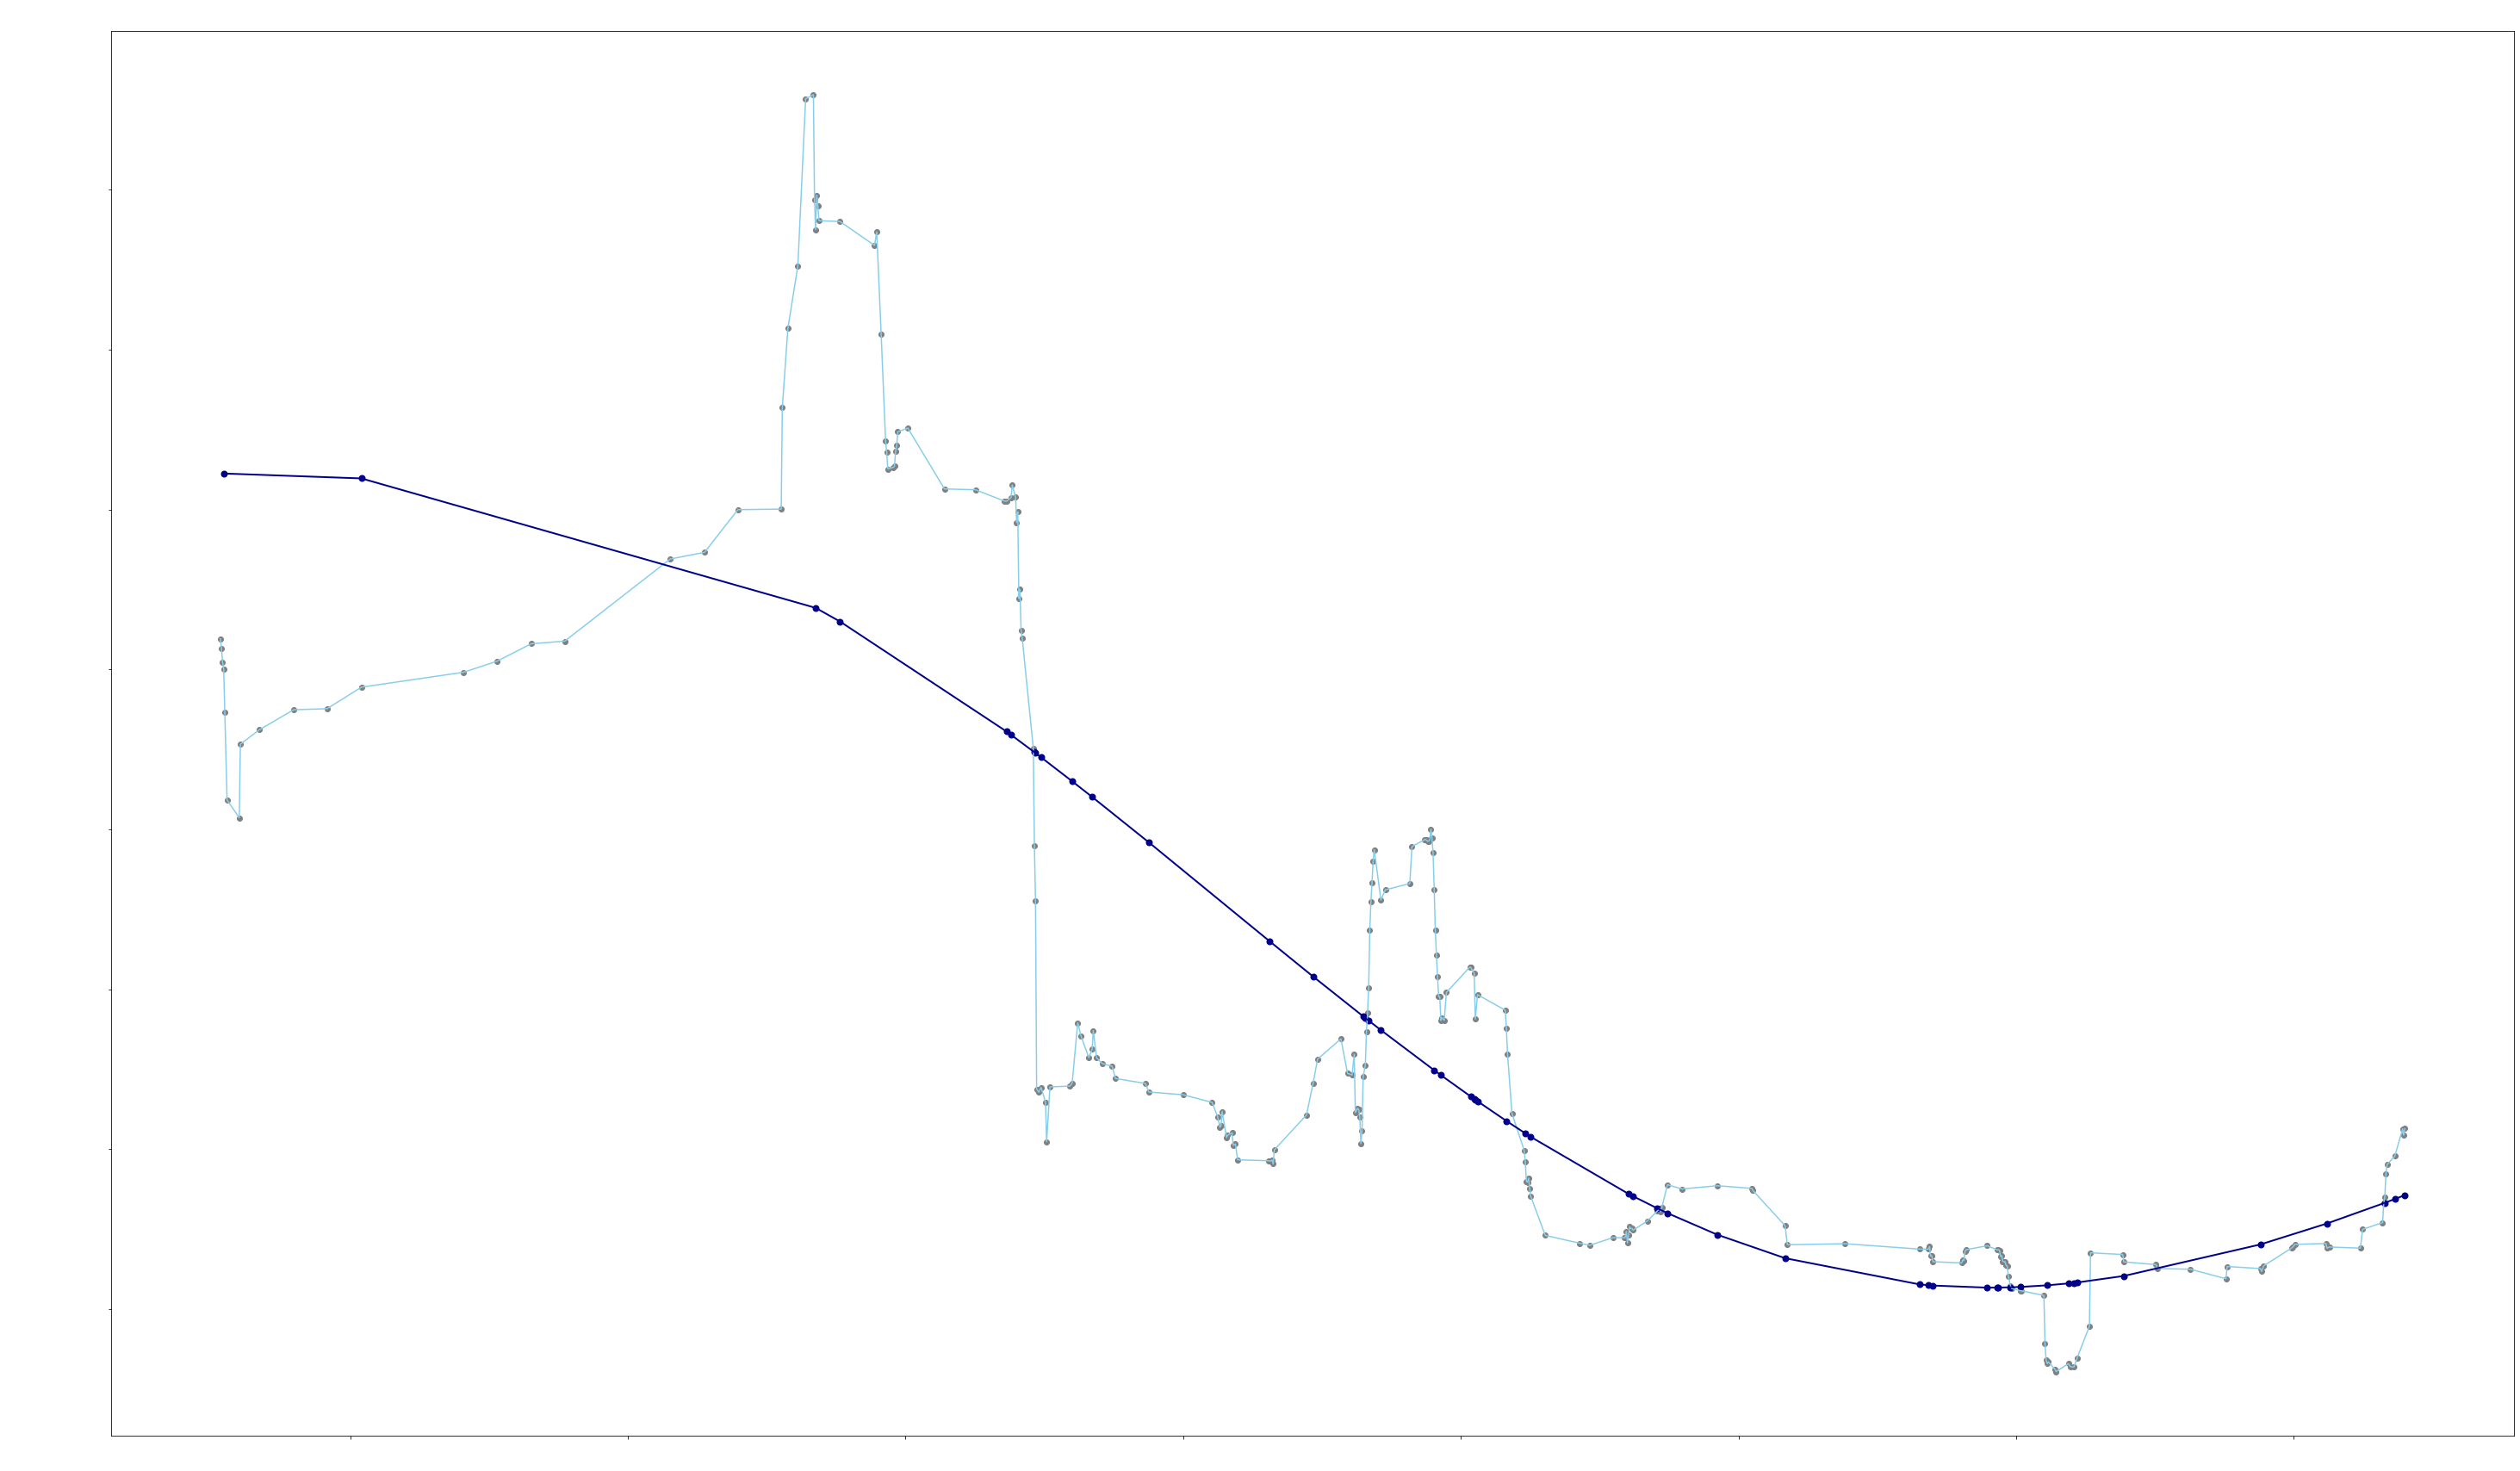

In [0]:
########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_original, y_original, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 7 > ] ##########
polynomial = PolynomialFeatures(degree=7)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 7 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_original, y_original, color='gray')
plt.plot(X_original, y_original, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_9, y_moving_average_9, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 7 > ] ##########
polynomial = PolynomialFeatures(degree=7)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 7 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_9, y_moving_average_9, color='gray')
plt.plot(X_moving_average_9, y_moving_average_9, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_21, y_moving_average_21, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 7 > ] ##########
polynomial = PolynomialFeatures(degree=7)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 7 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_21, y_moving_average_21, color='gray')
plt.plot(X_moving_average_21, y_moving_average_21, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_36, y_moving_average_36, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 7 > ] ##########
polynomial = PolynomialFeatures(degree=7)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 7 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_36, y_moving_average_36, color='gray')
plt.plot(X_moving_average_36, y_moving_average_36, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

THE REGRESSION WITH DGREE = 8

Linear Regressor performance:
Mean absolute error =  105165.43
Mean squared error =  19472279169.68
Median absolute error =  93615.83
Explained variance score =  -0.49
R2 score =  -0.49


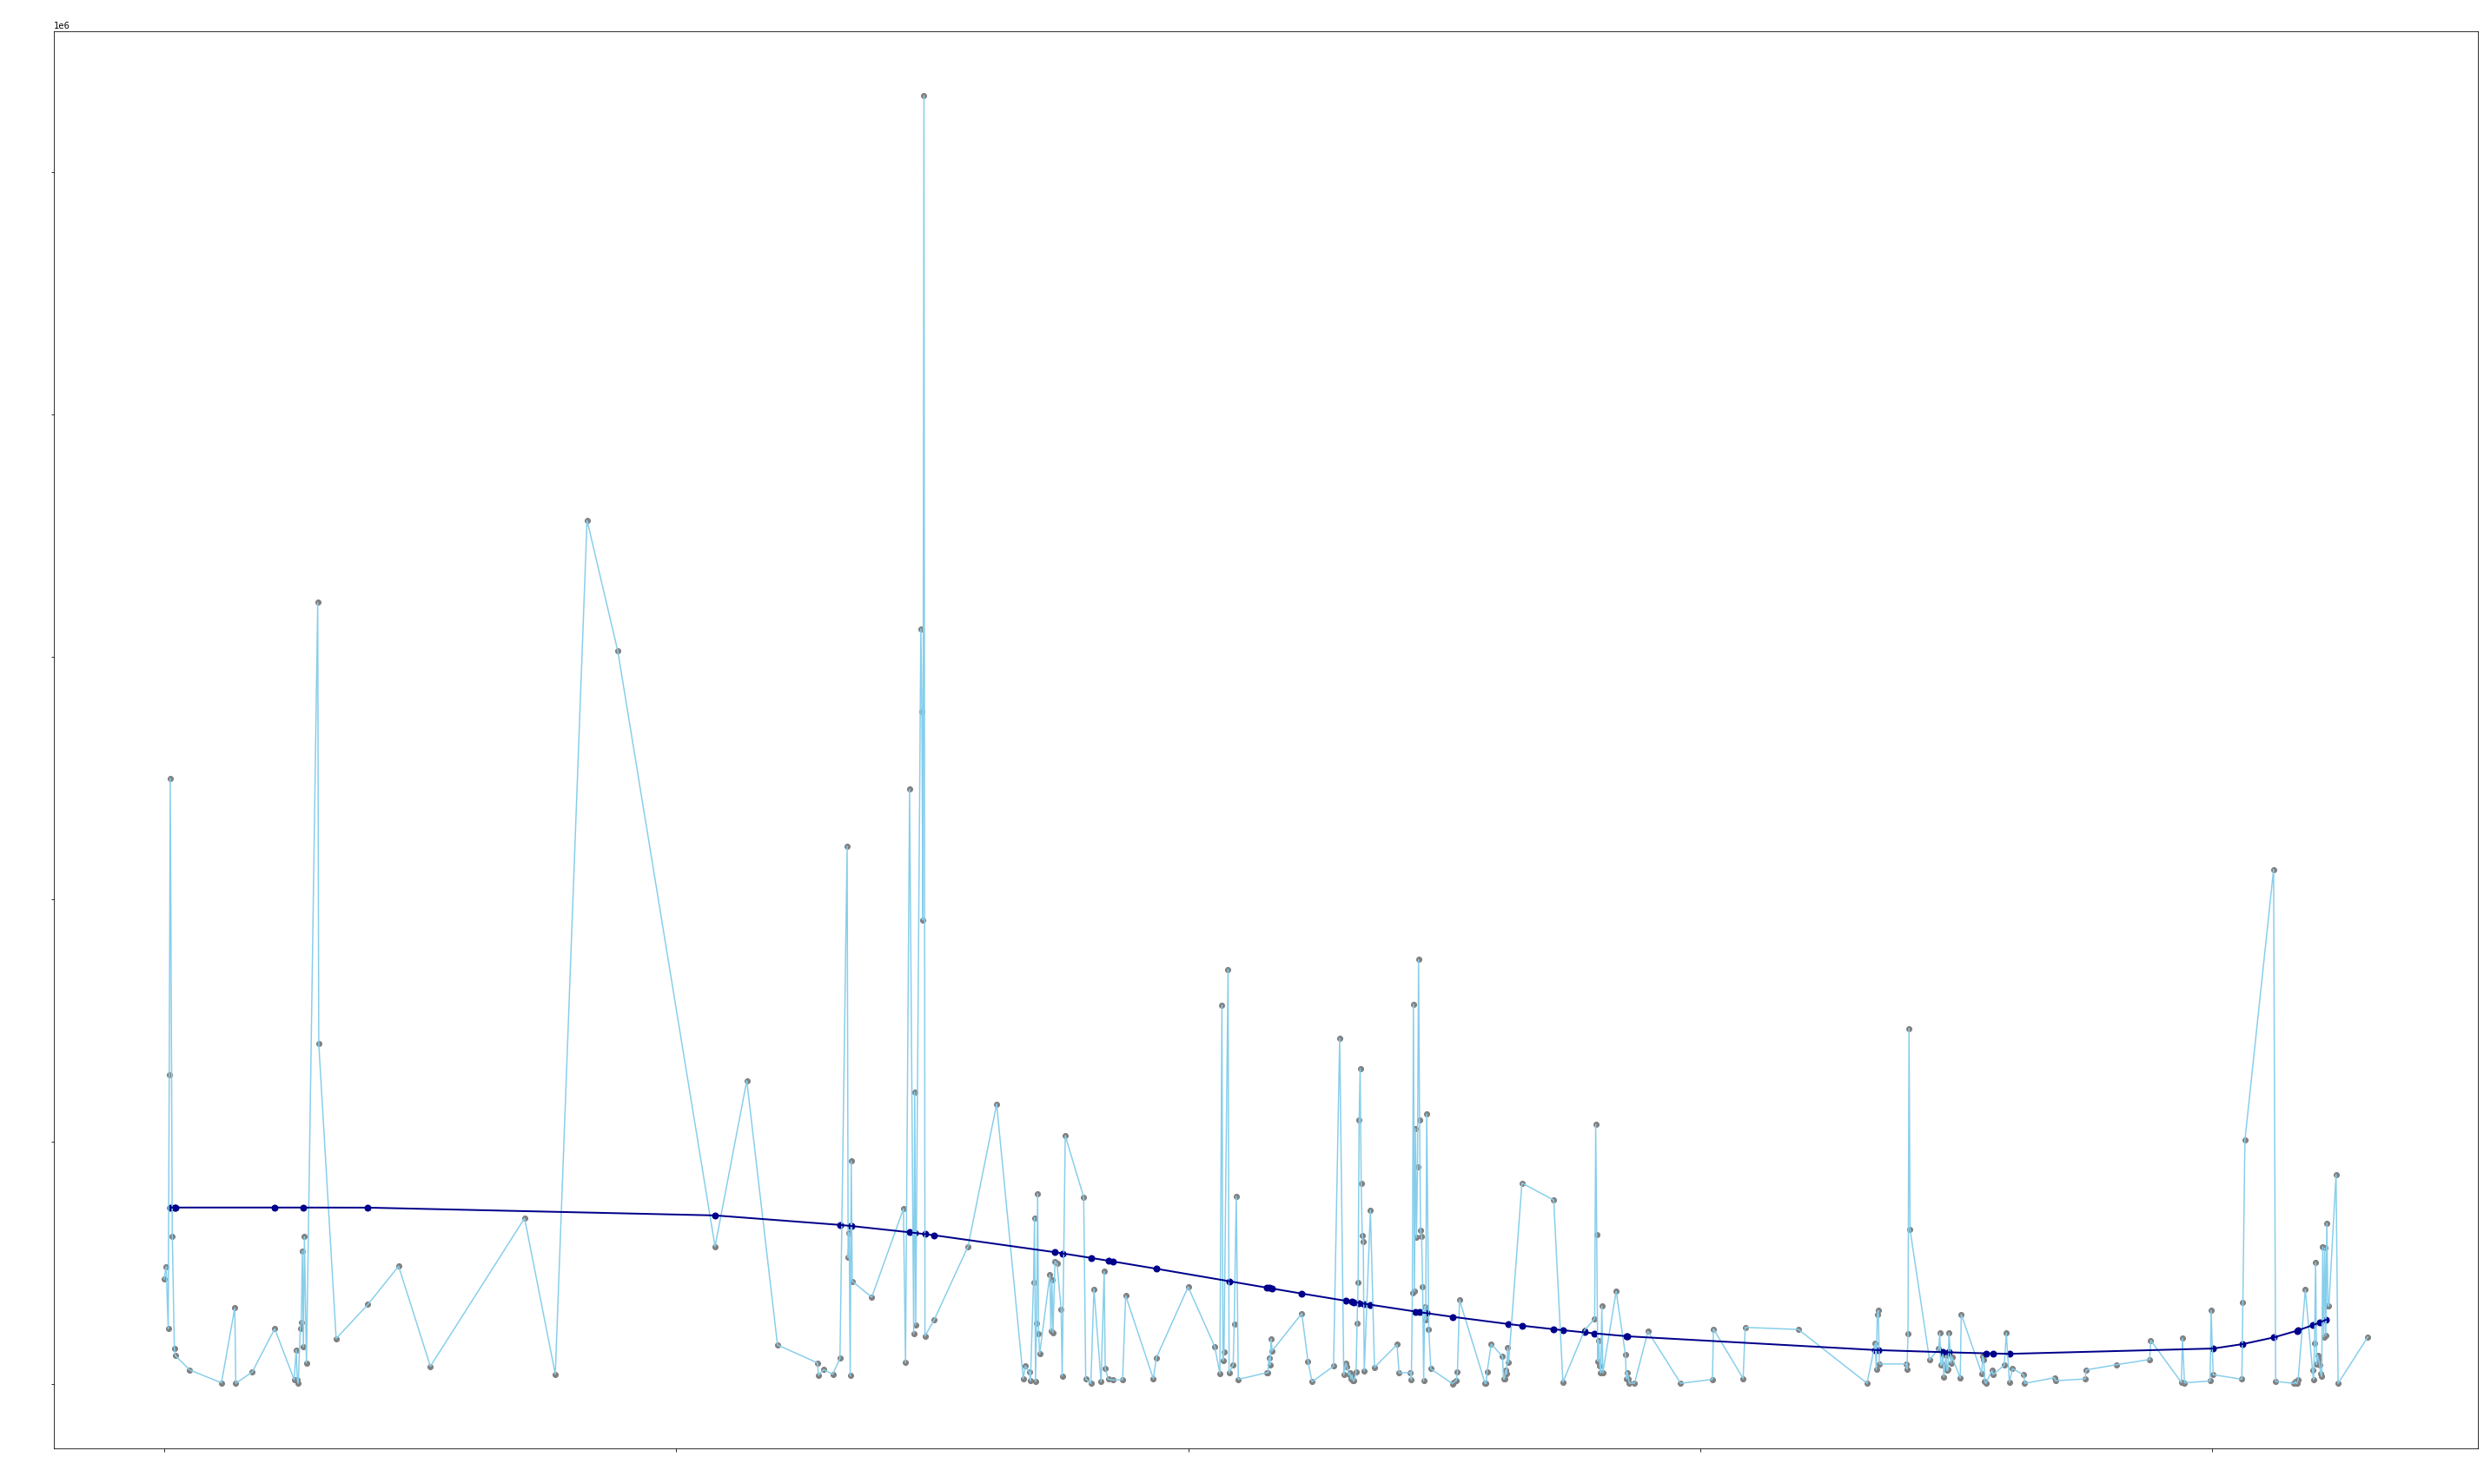

Linear Regressor performance:
Mean absolute error =  103885.57
Mean squared error =  17840646238.52
Median absolute error =  100416.53
Explained variance score =  -0.92
R2 score =  -0.93


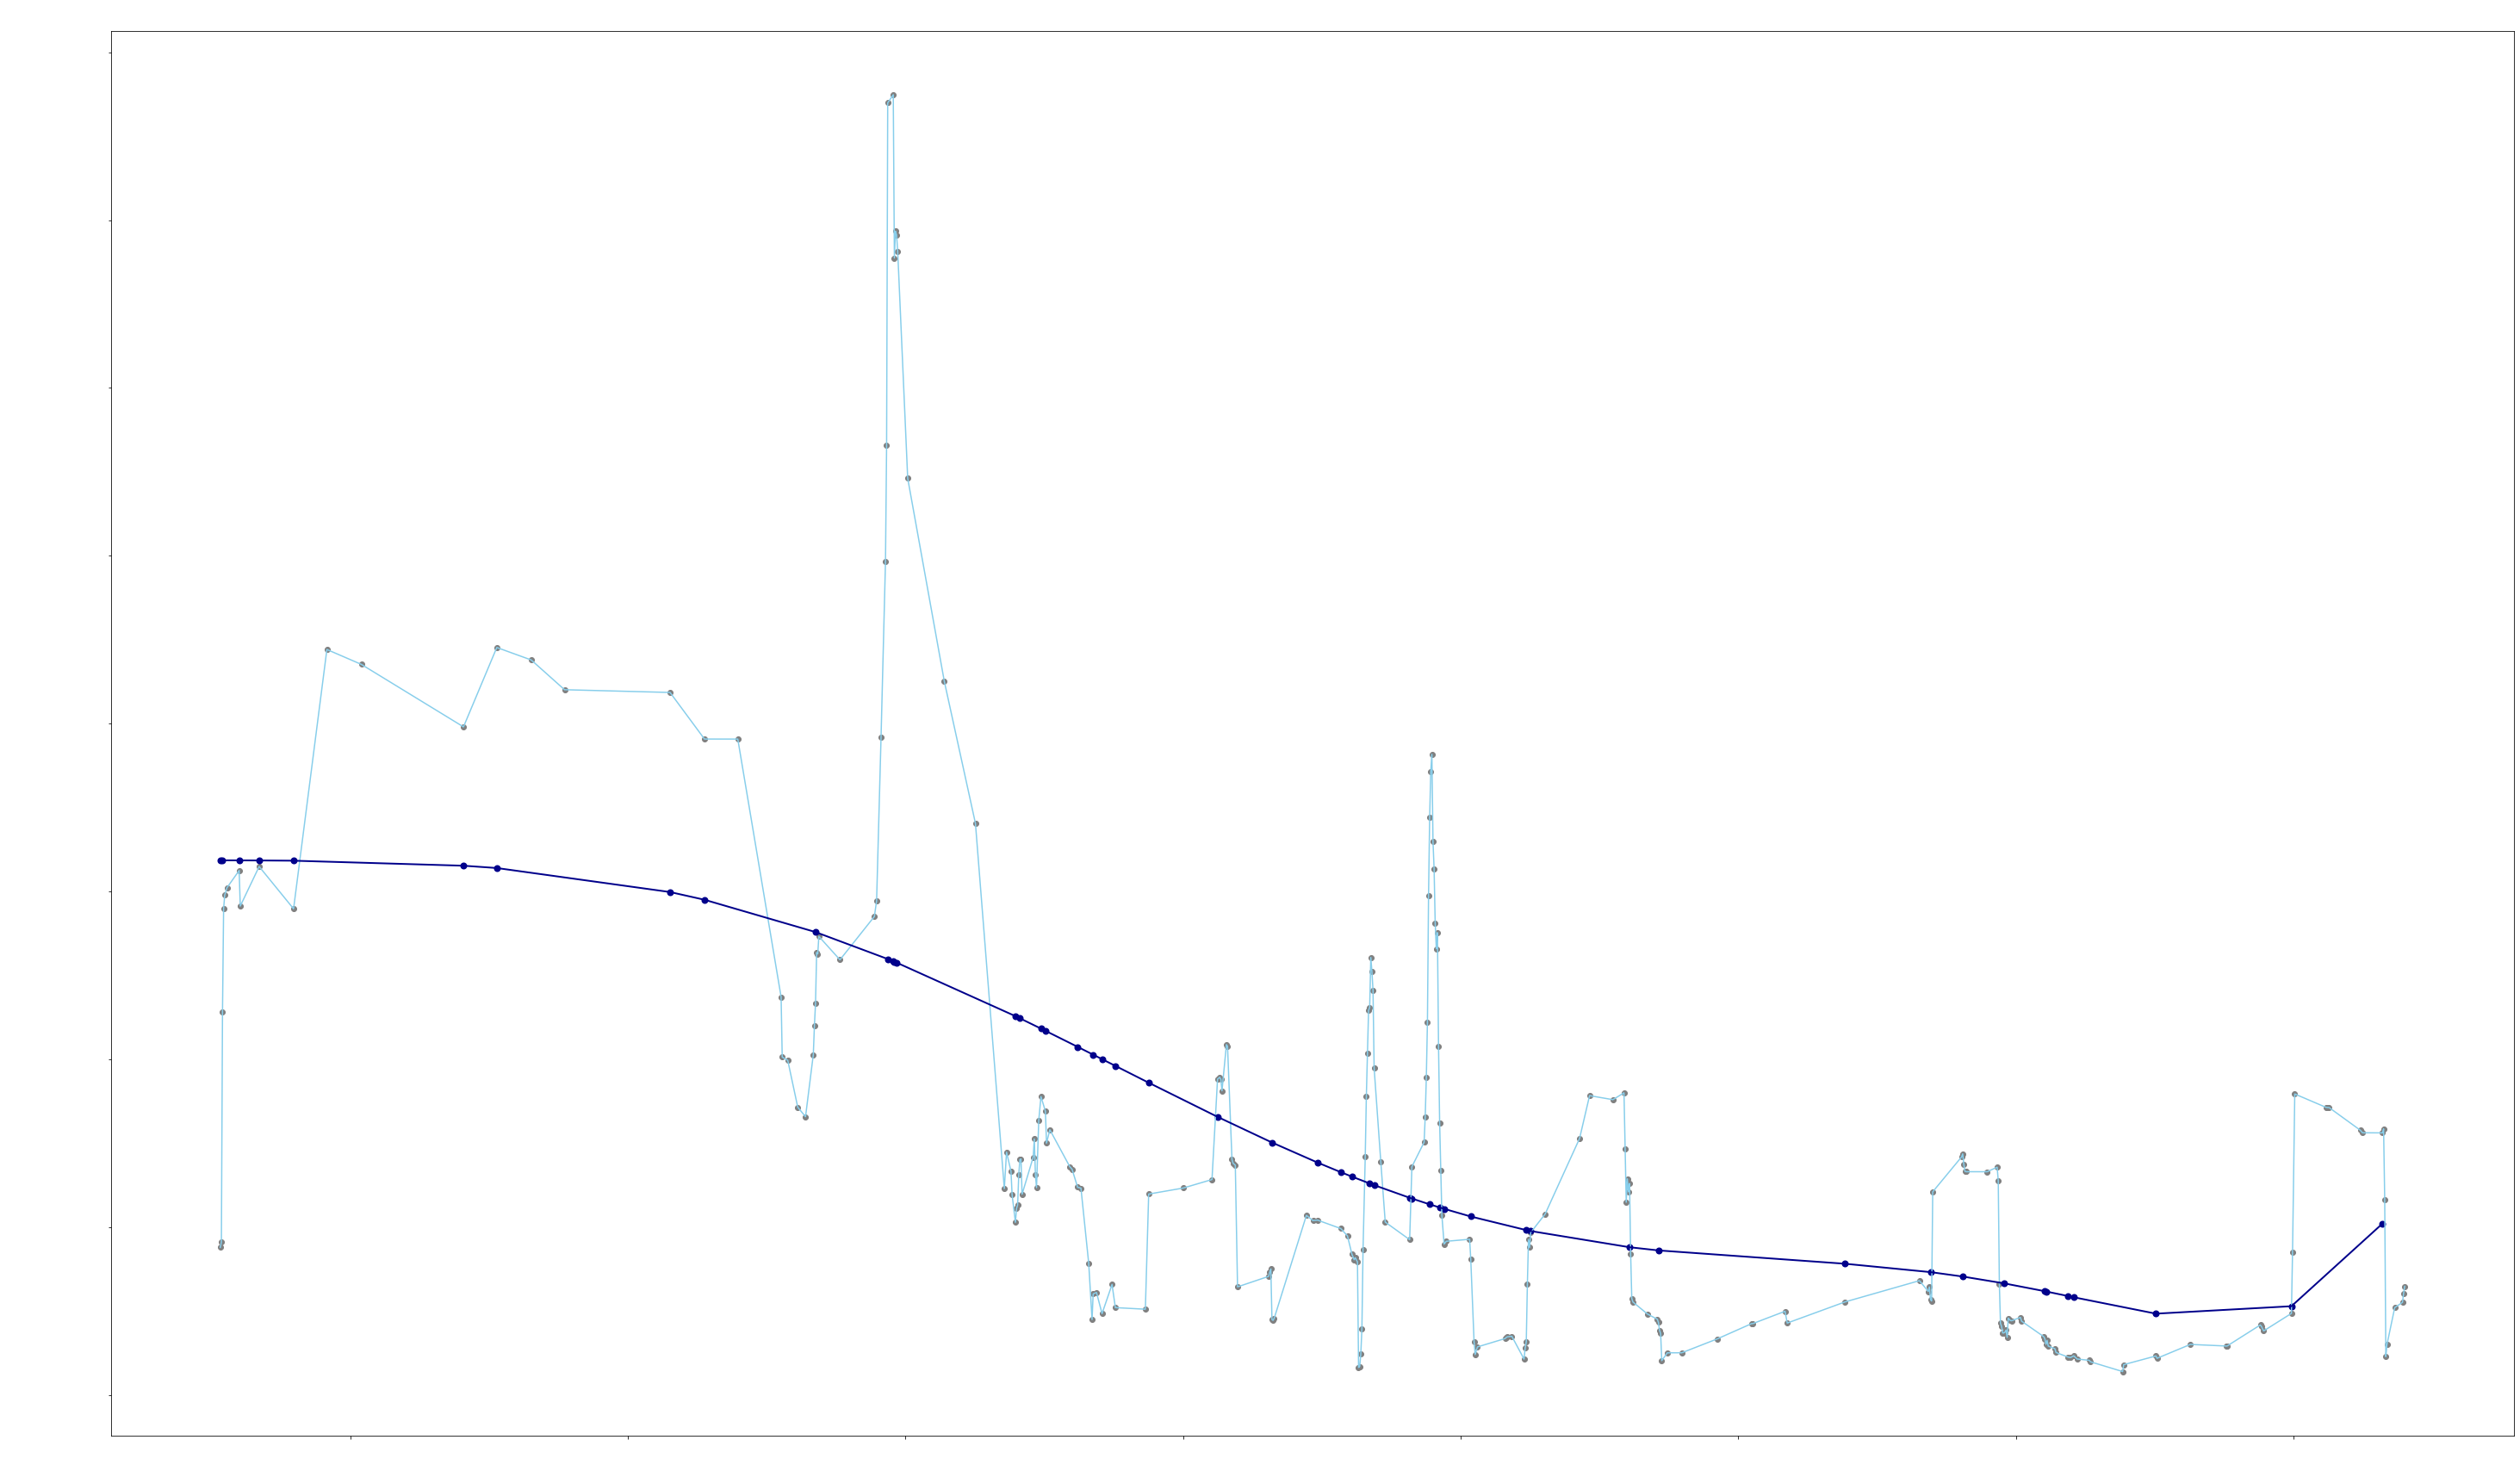

Linear Regressor performance:
Mean absolute error =  64209.57
Mean squared error =  6565165918.49
Median absolute error =  51891.18
Explained variance score =  -1.39
R2 score =  -1.39


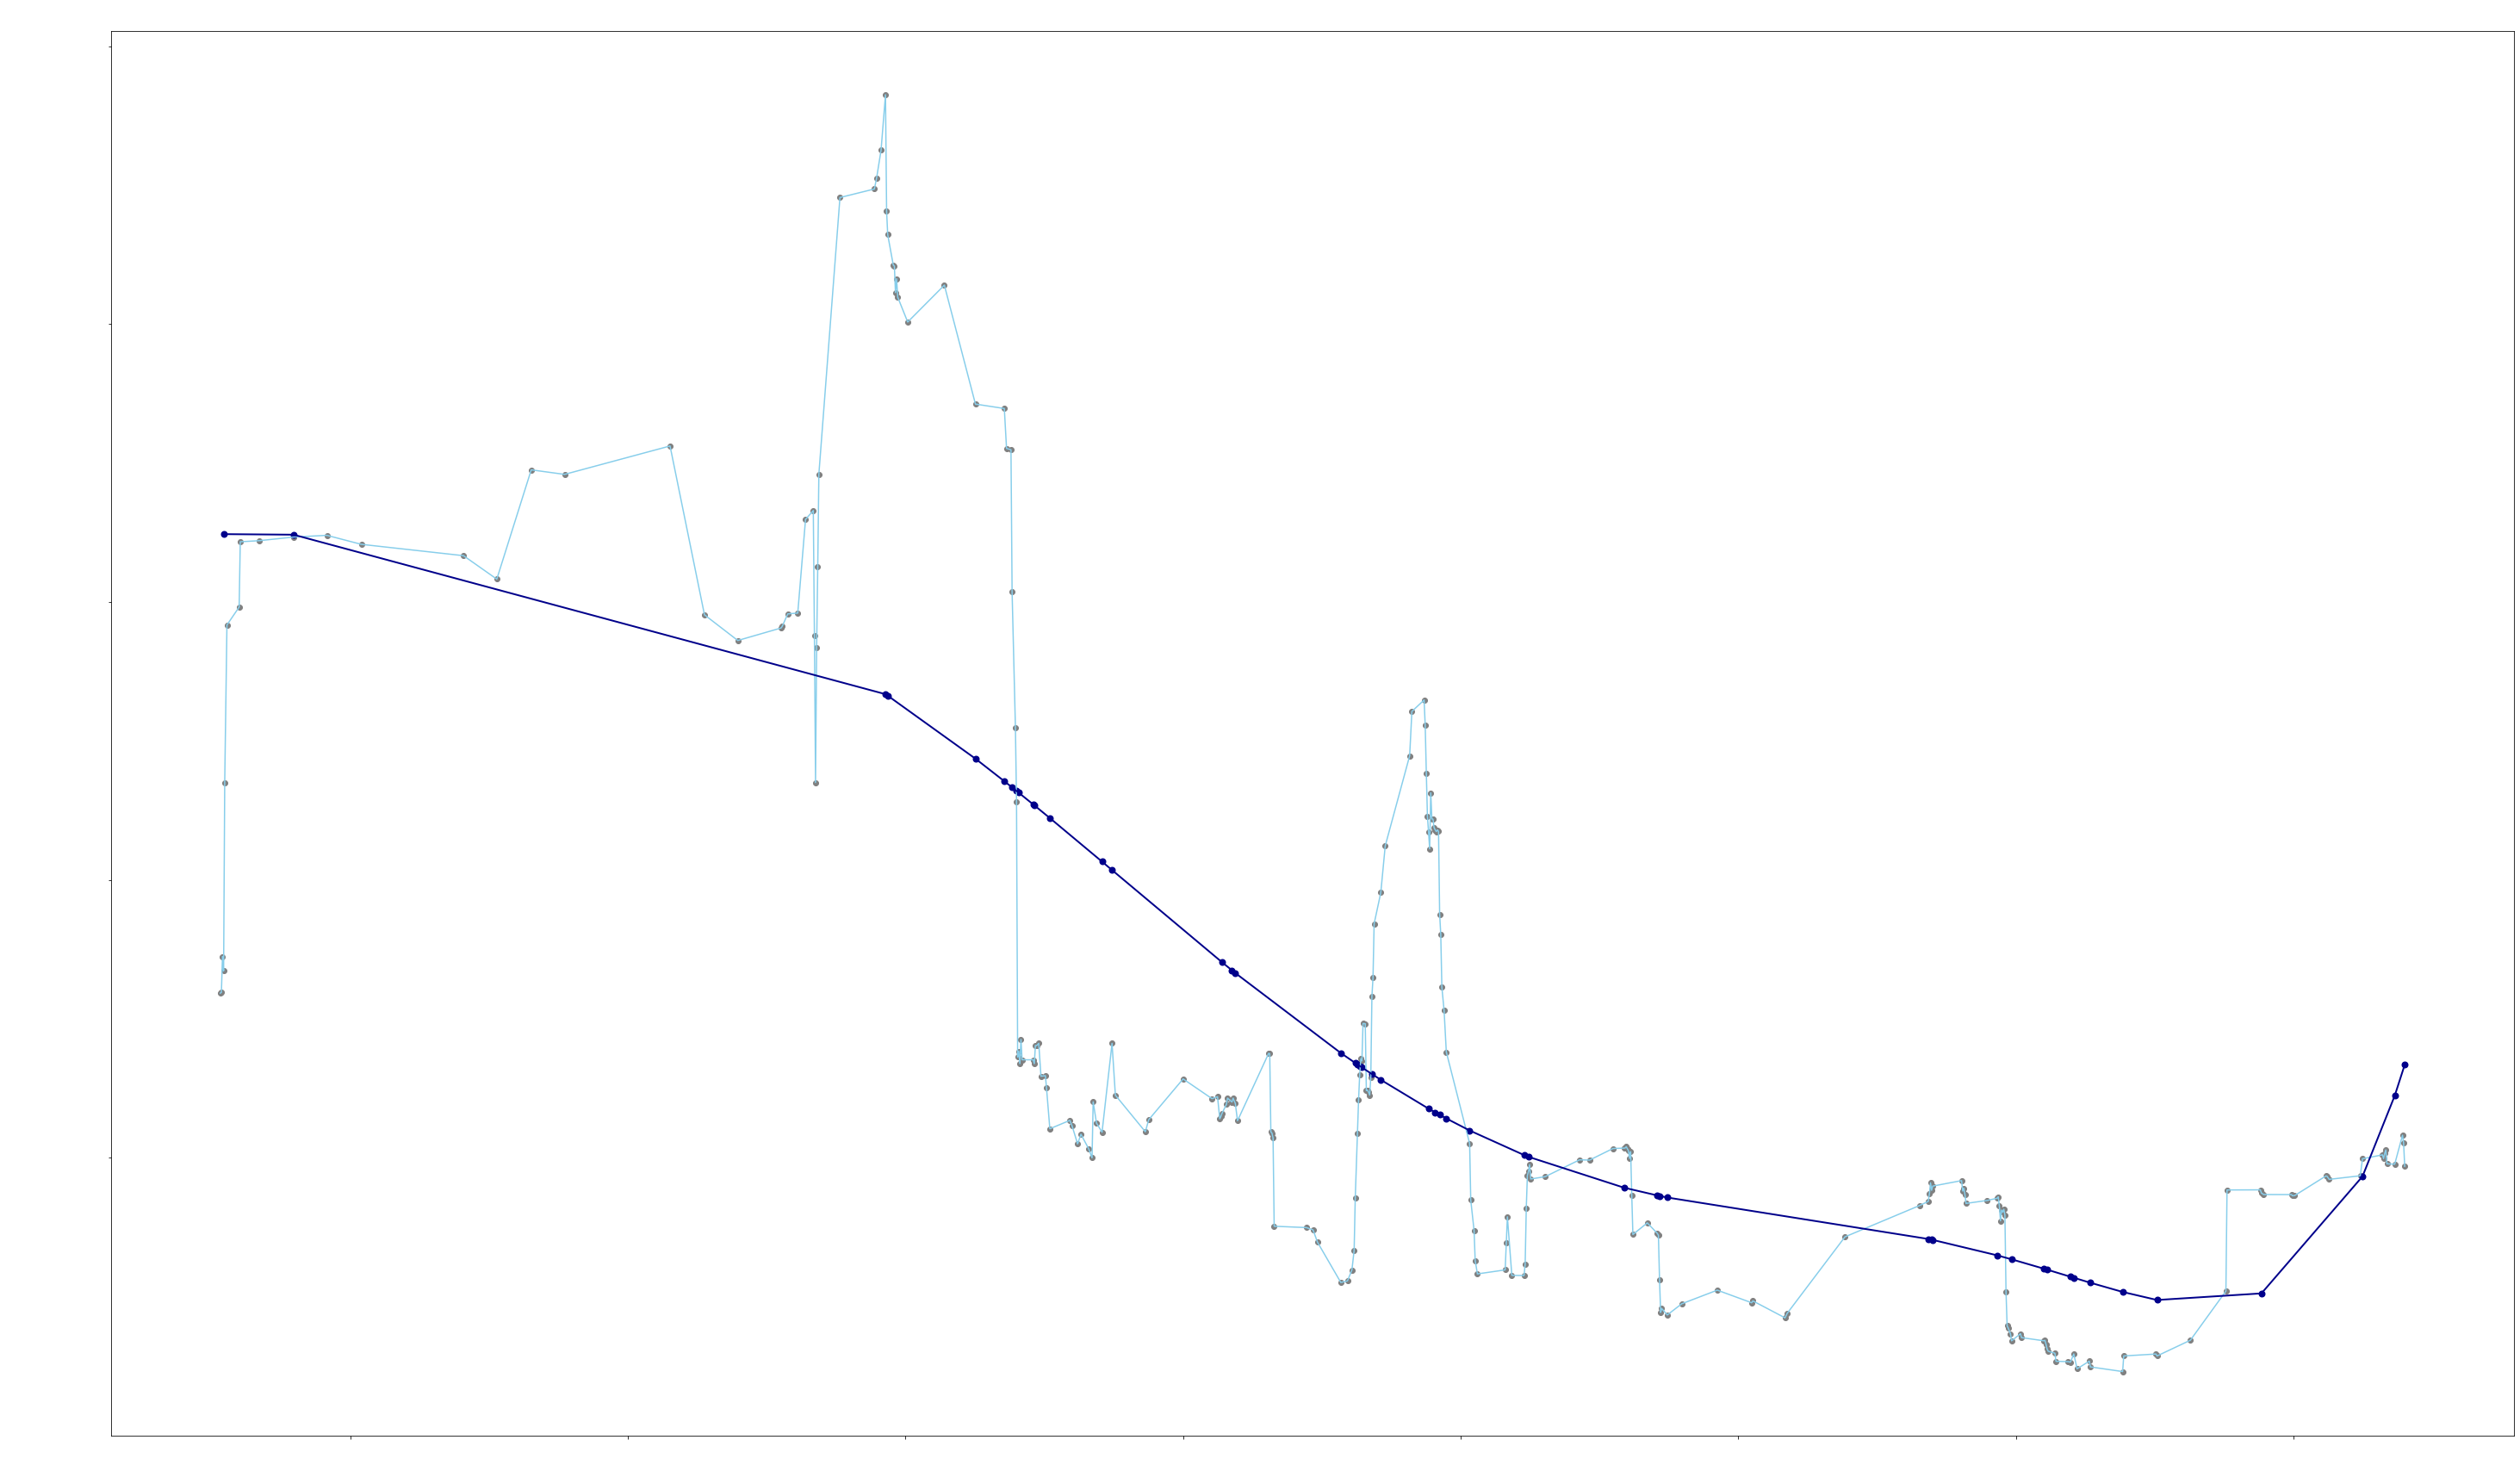

Linear Regressor performance:
Mean absolute error =  66684.55
Mean squared error =  6846169792.73
Median absolute error =  59076.82
Explained variance score =  -1.58
R2 score =  -1.58


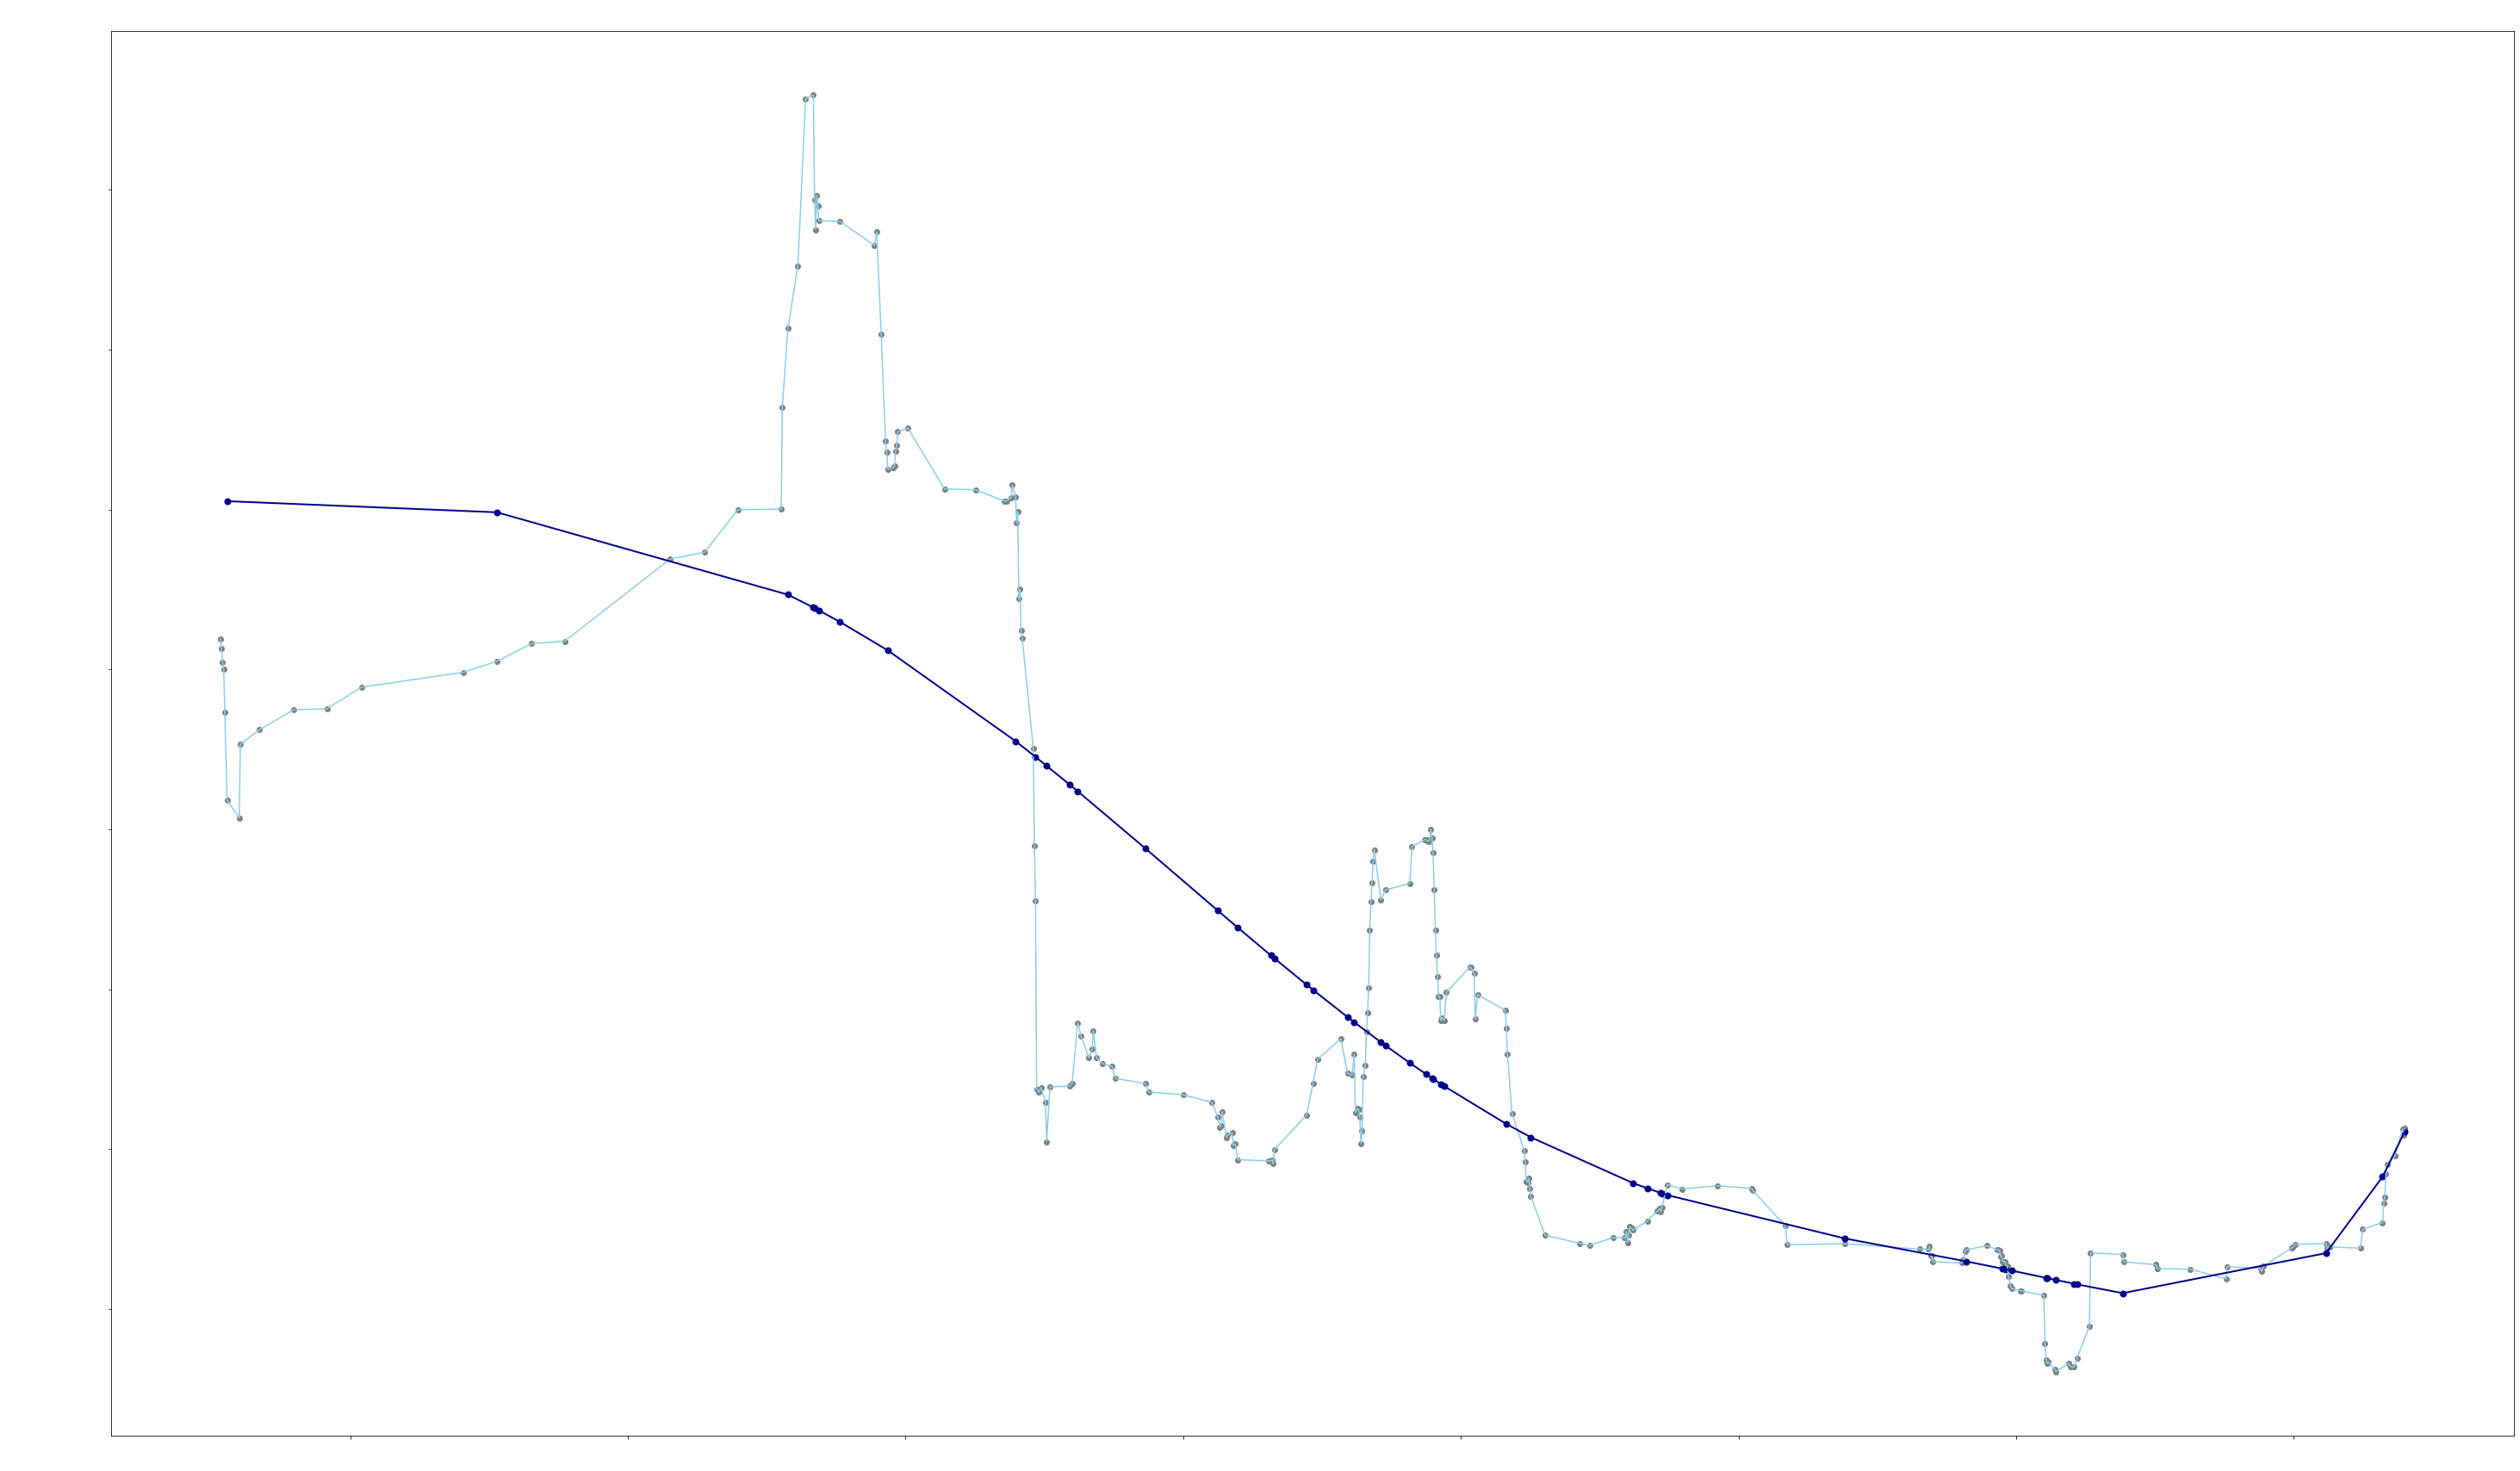

In [0]:
########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_original, y_original, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 8 > ] ##########
polynomial = PolynomialFeatures(degree=8)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 8 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_original, y_original, color='gray')
plt.plot(X_original, y_original, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_9, y_moving_average_9, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 8 > ] ##########
polynomial = PolynomialFeatures(degree=8)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 8 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_9, y_moving_average_9, color='gray')
plt.plot(X_moving_average_9, y_moving_average_9, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_21, y_moving_average_21, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 8 > ] ##########
polynomial = PolynomialFeatures(degree=8)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 8 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_21, y_moving_average_21, color='gray')
plt.plot(X_moving_average_21, y_moving_average_21, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_36, y_moving_average_36, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 8 > ] ##########
polynomial = PolynomialFeatures(degree=8)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 8 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_36, y_moving_average_36, color='gray')
plt.plot(X_moving_average_36, y_moving_average_36, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

THE REGRESSION WITH DEGREE = 10



Linear Regressor performance:
Mean absolute error =  94382.7
Mean squared error =  14809438502.41
Median absolute error =  79852.2
Explained variance score =  -0.5
R2 score =  -0.5


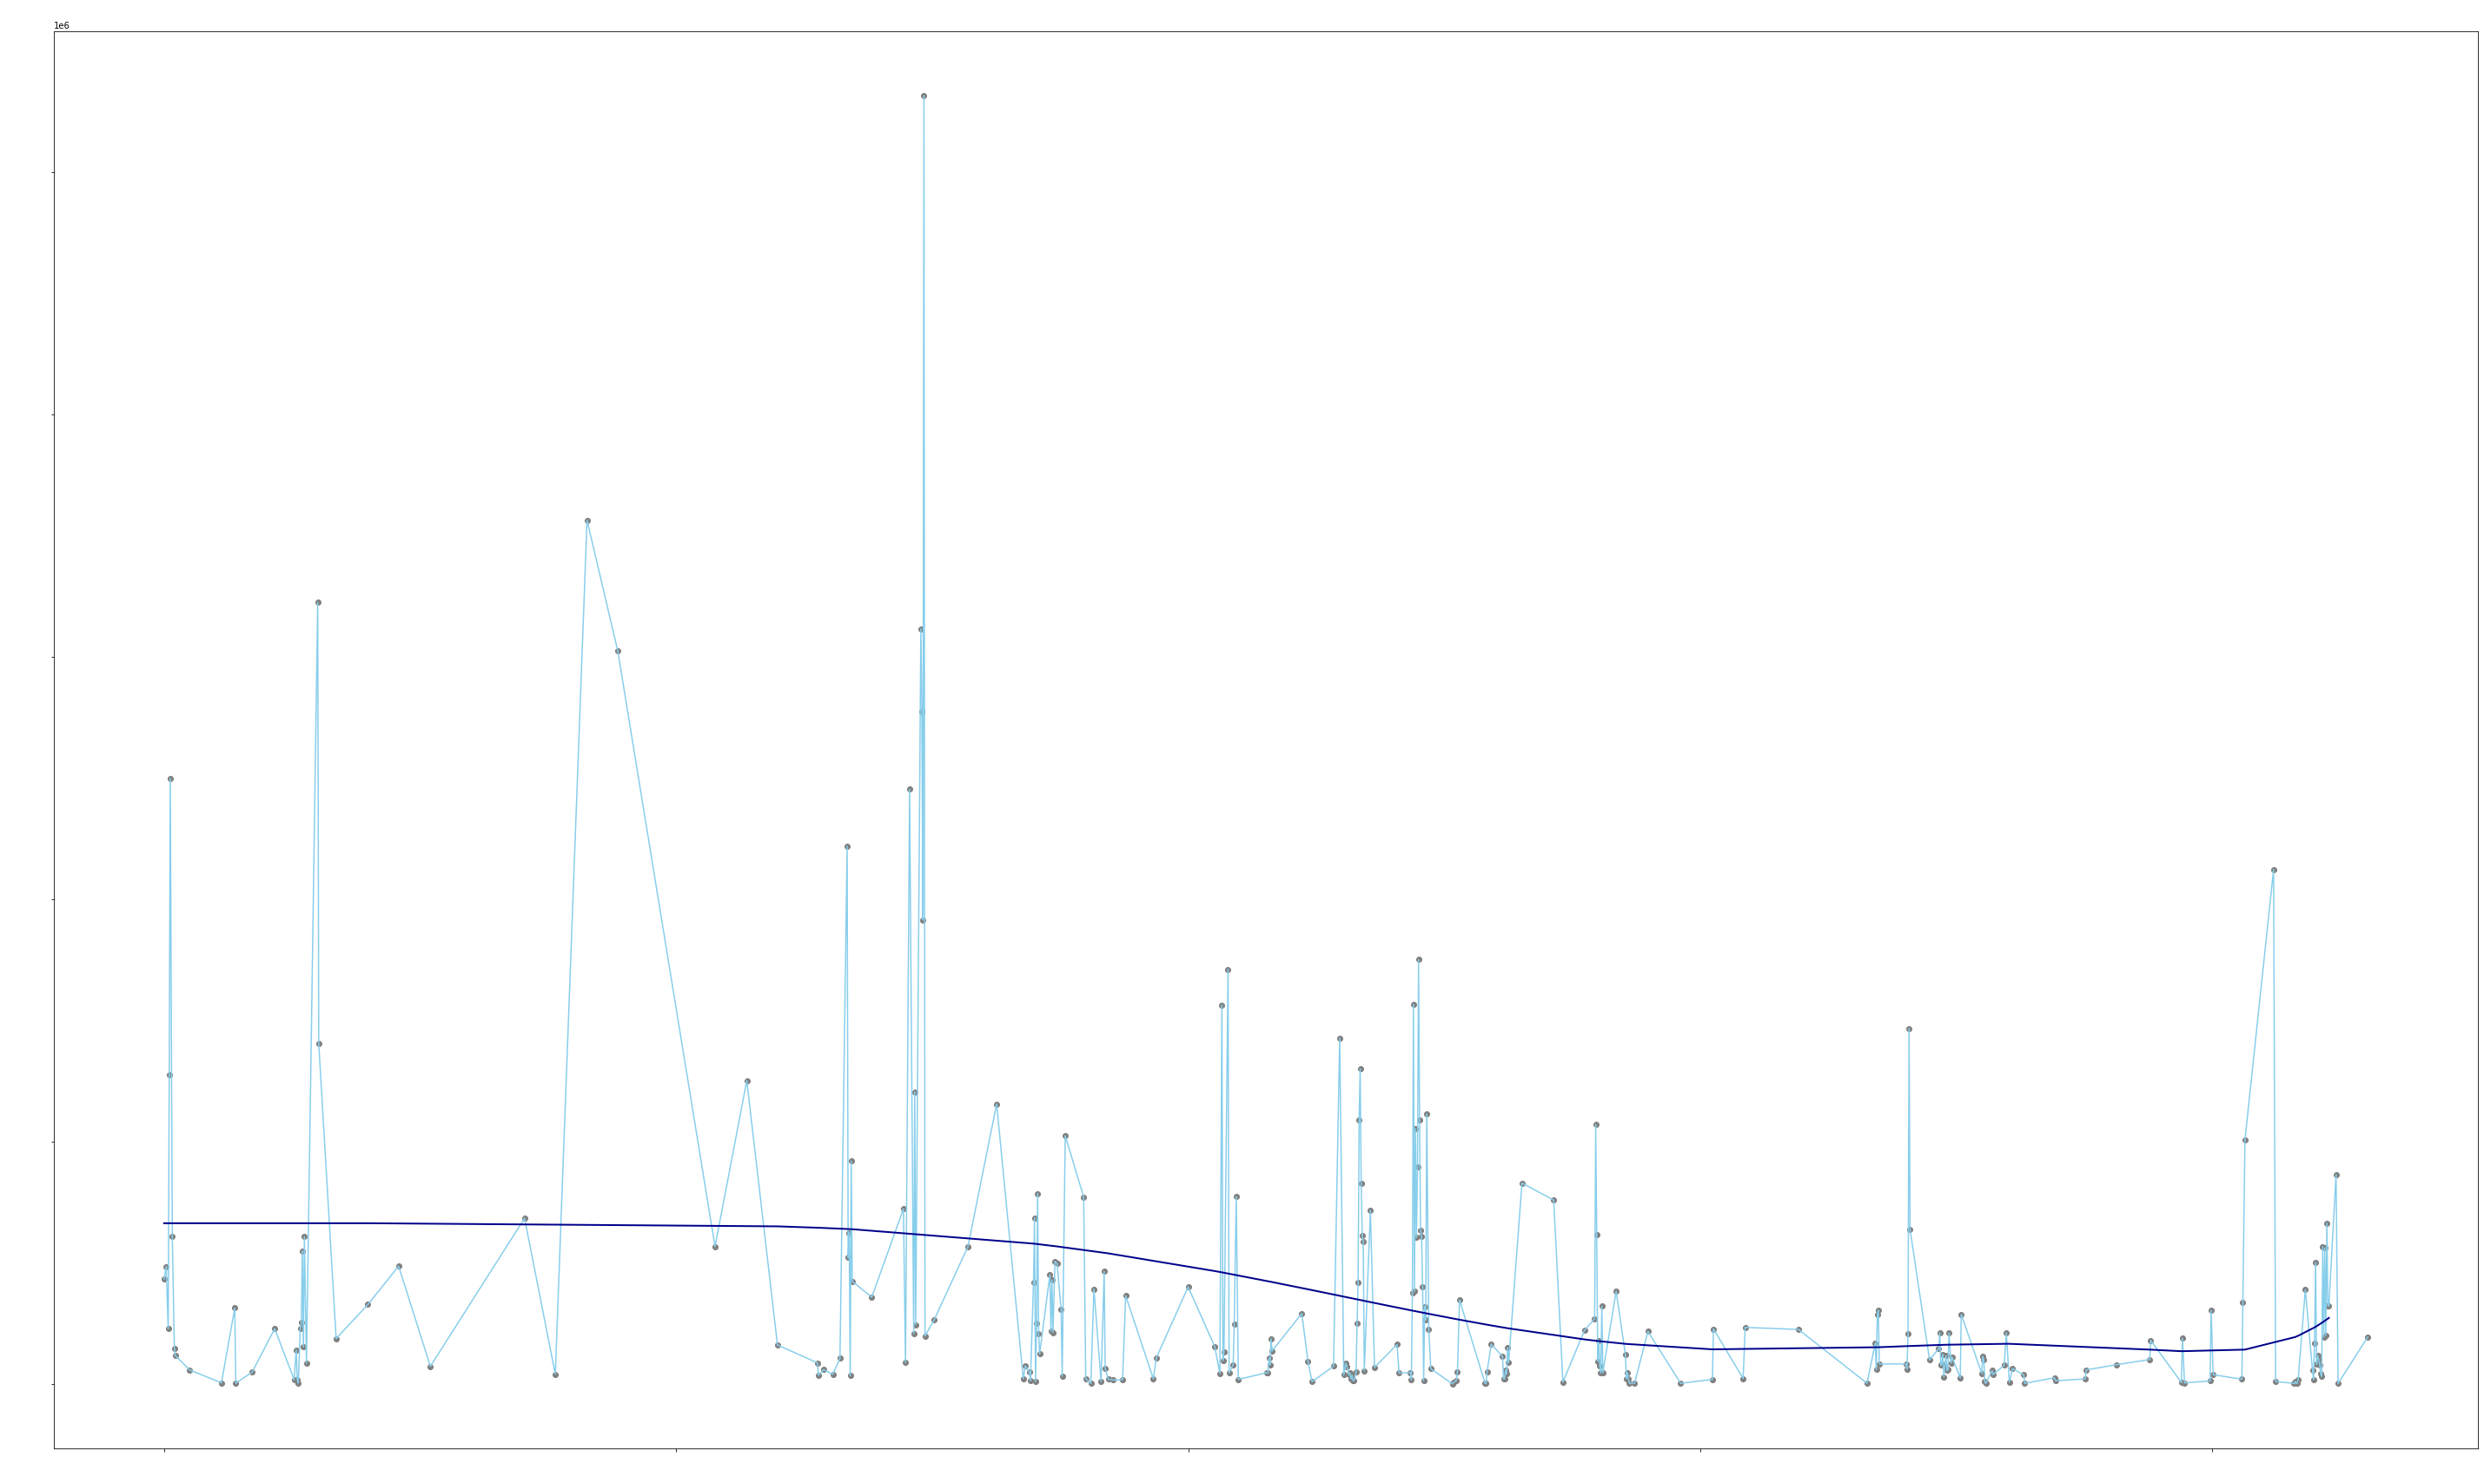

Linear Regressor performance:
Mean absolute error =  91961.53
Mean squared error =  13849250459.57
Median absolute error =  91555.89
Explained variance score =  -0.71
R2 score =  -0.76


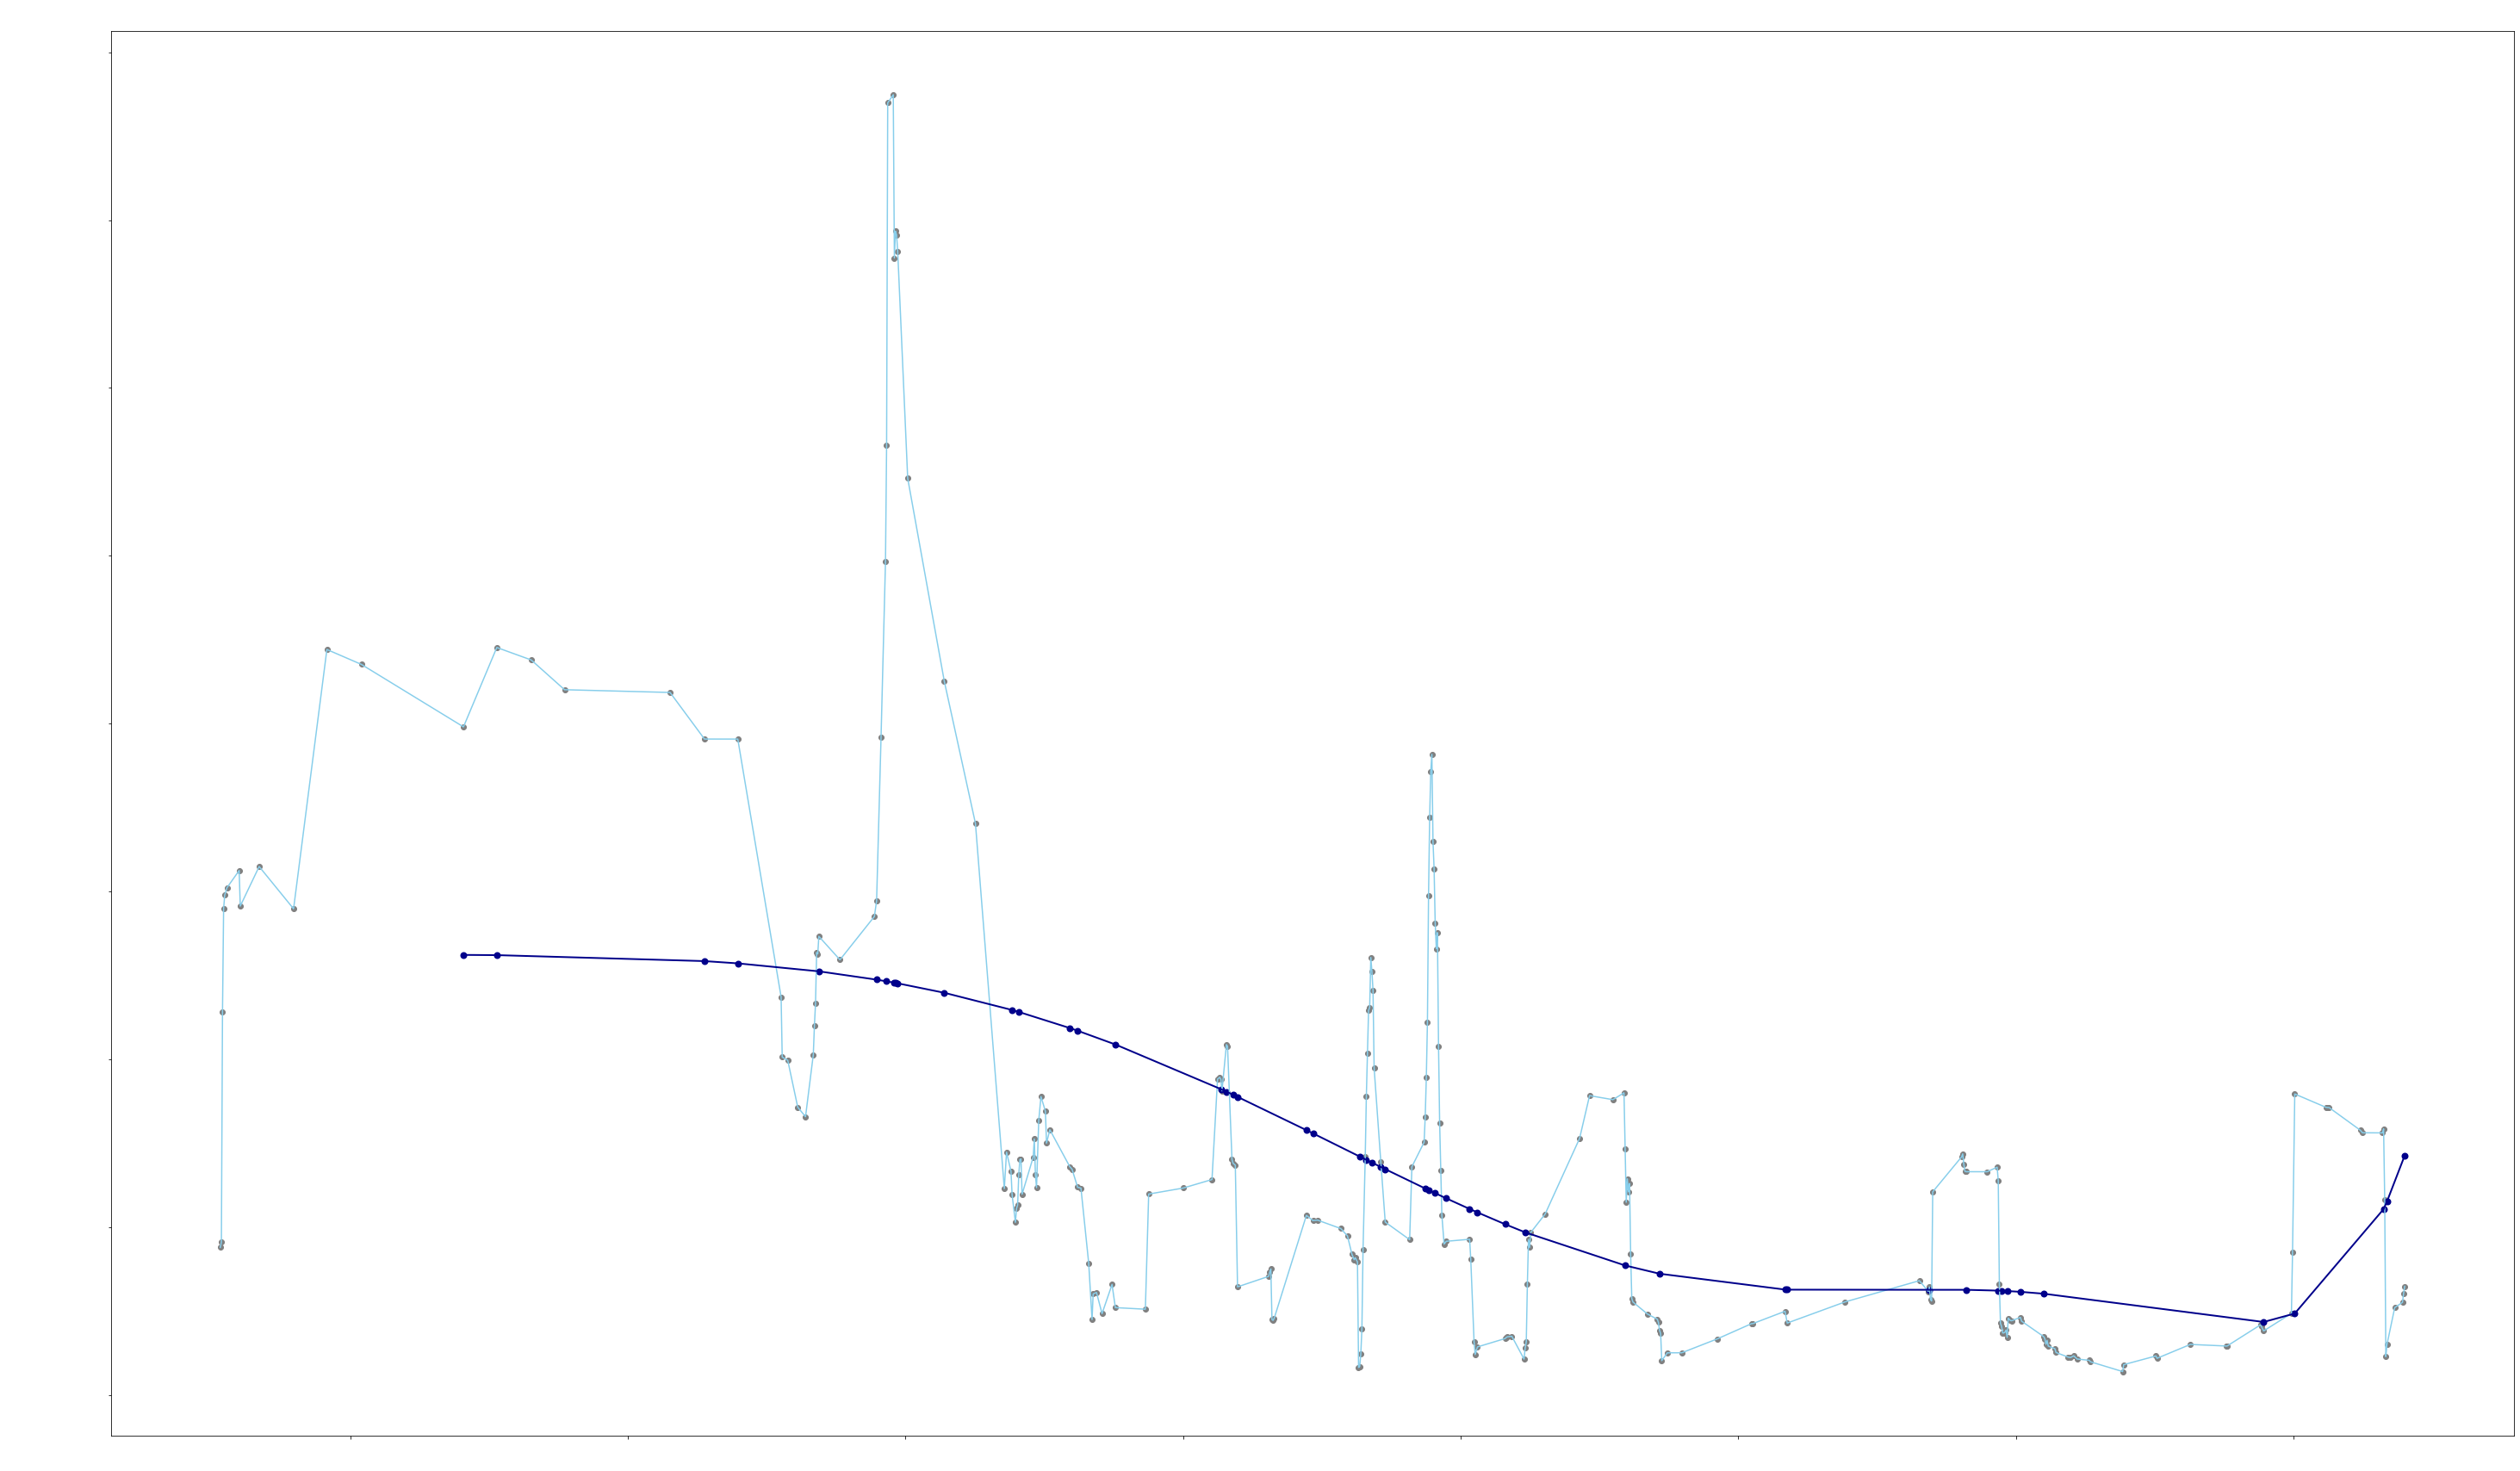

Linear Regressor performance:
Mean absolute error =  72357.76
Mean squared error =  7137897605.05
Median absolute error =  74350.58
Explained variance score =  -1.98
R2 score =  -2.0


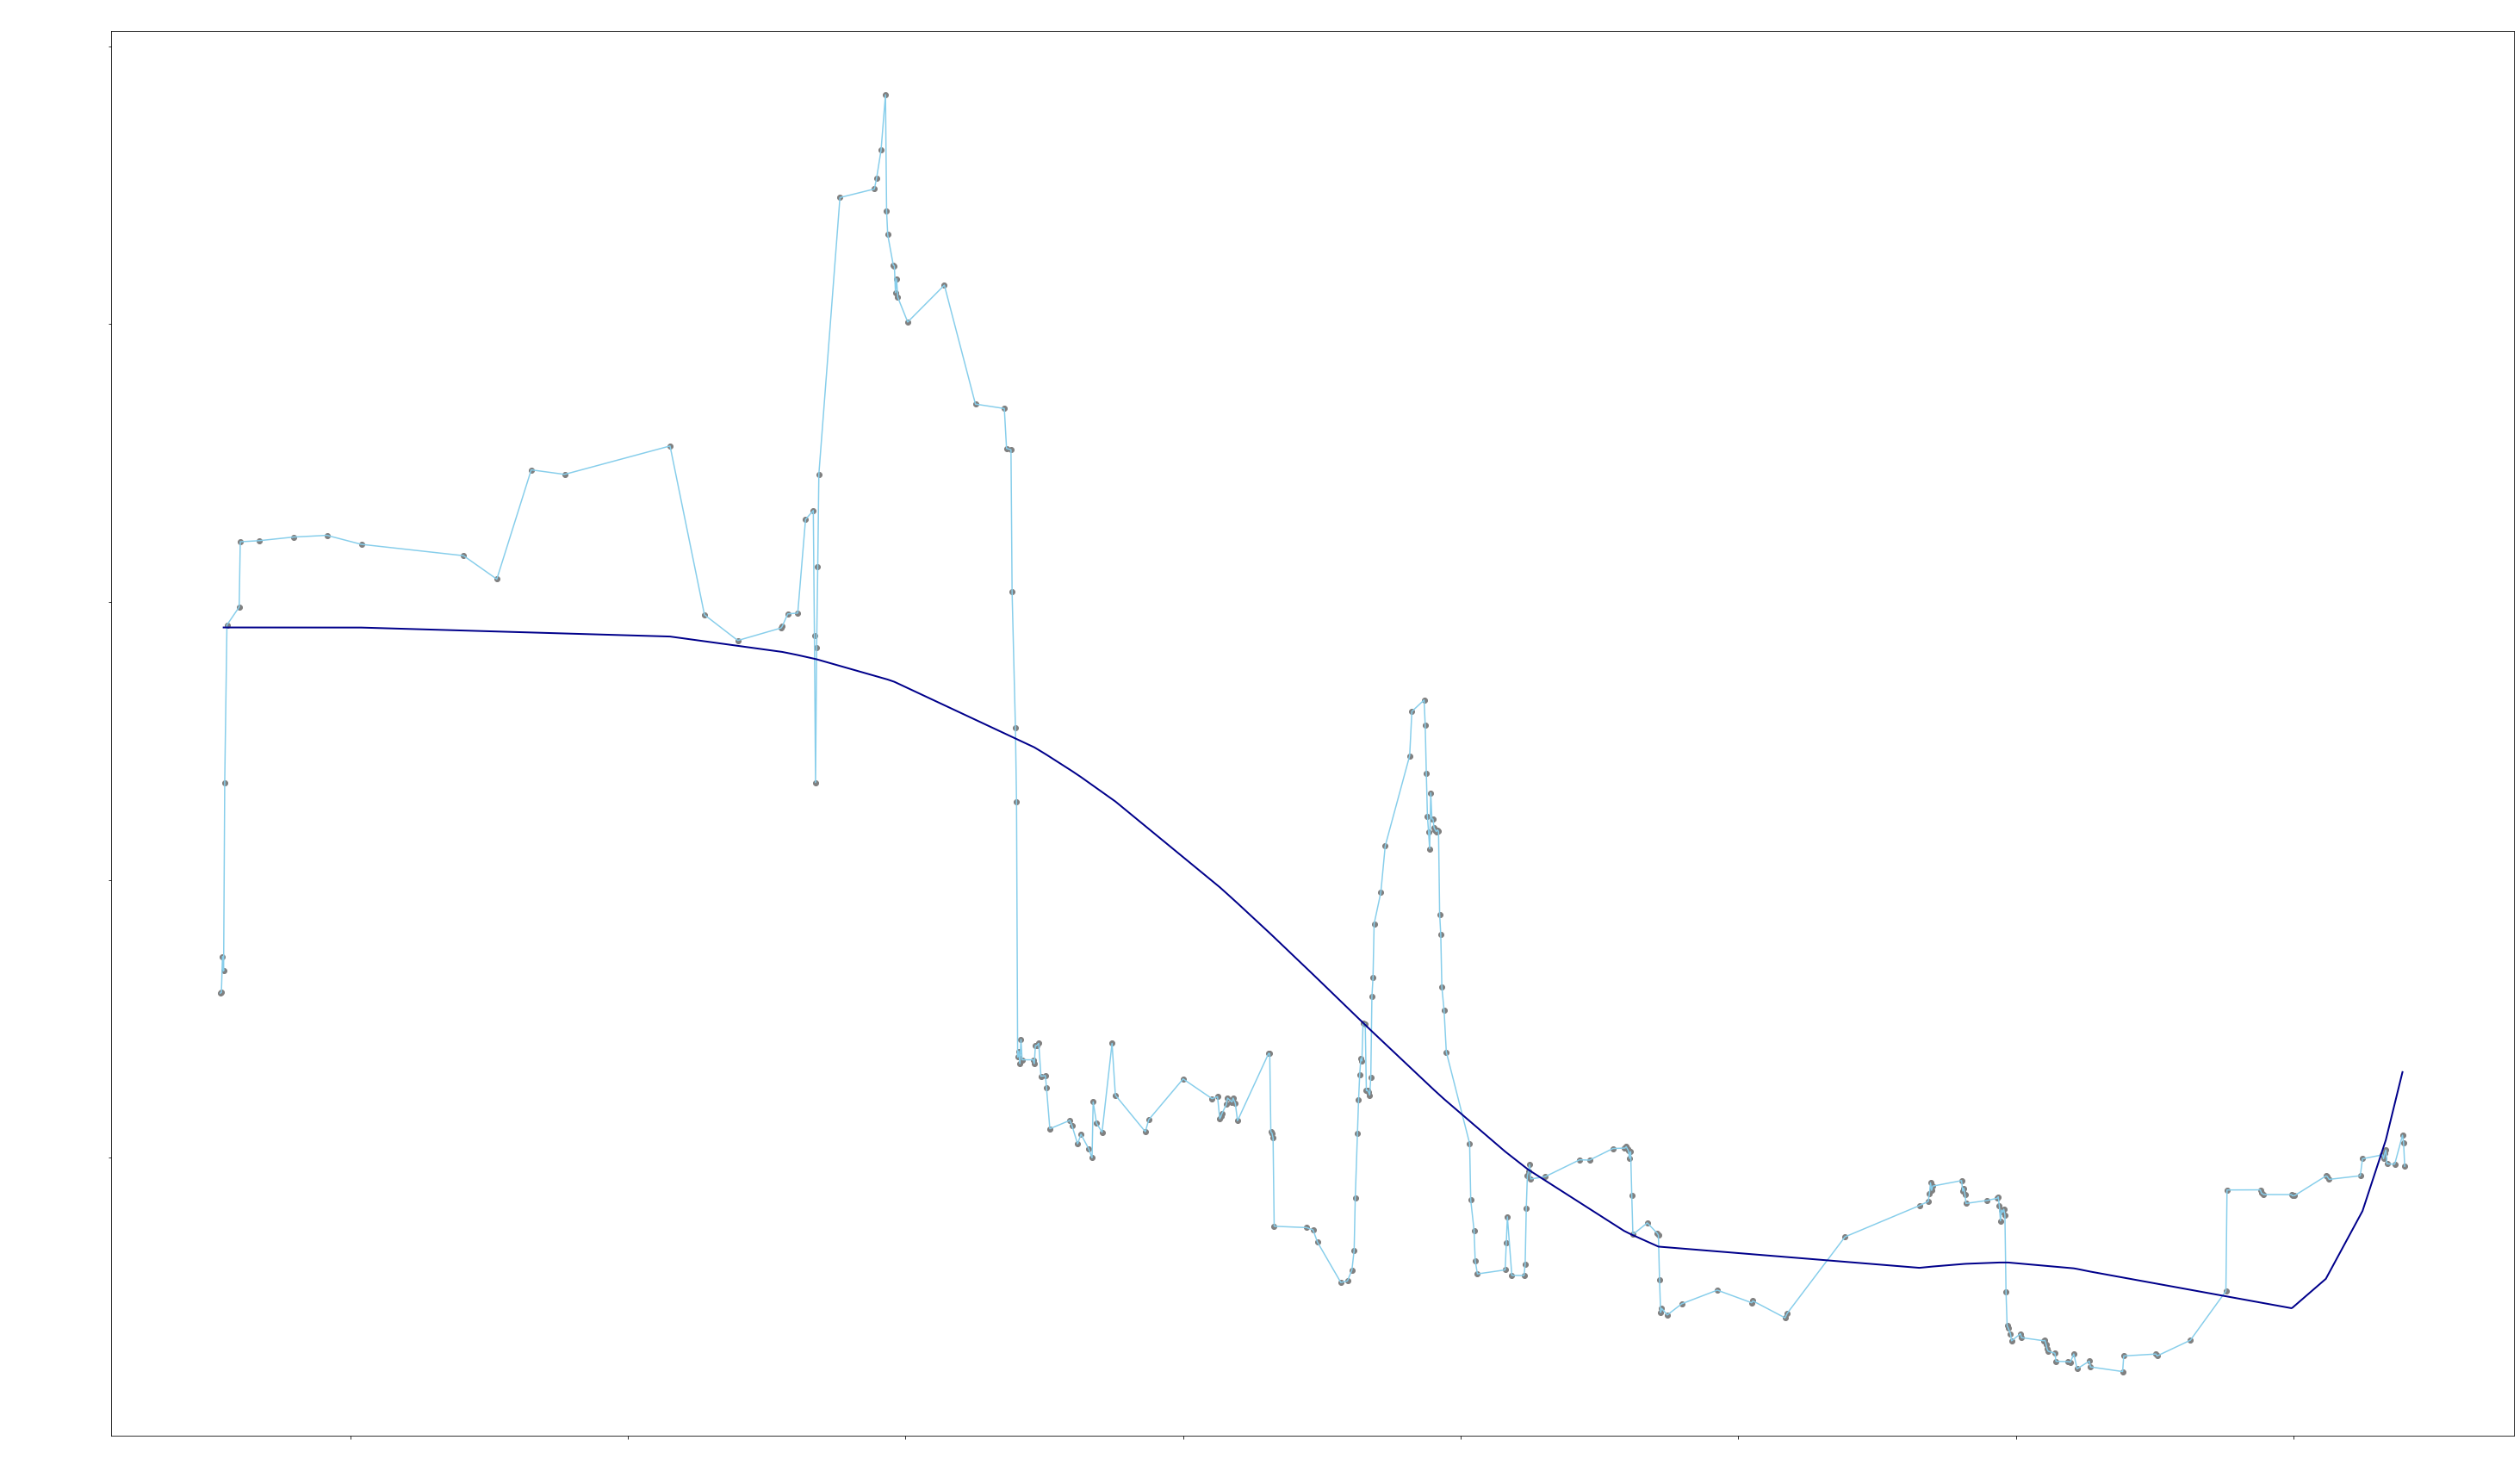

Linear Regressor performance:
Mean absolute error =  74138.68
Mean squared error =  7471847896.81
Median absolute error =  69563.86
Explained variance score =  -2.28
R2 score =  -2.28


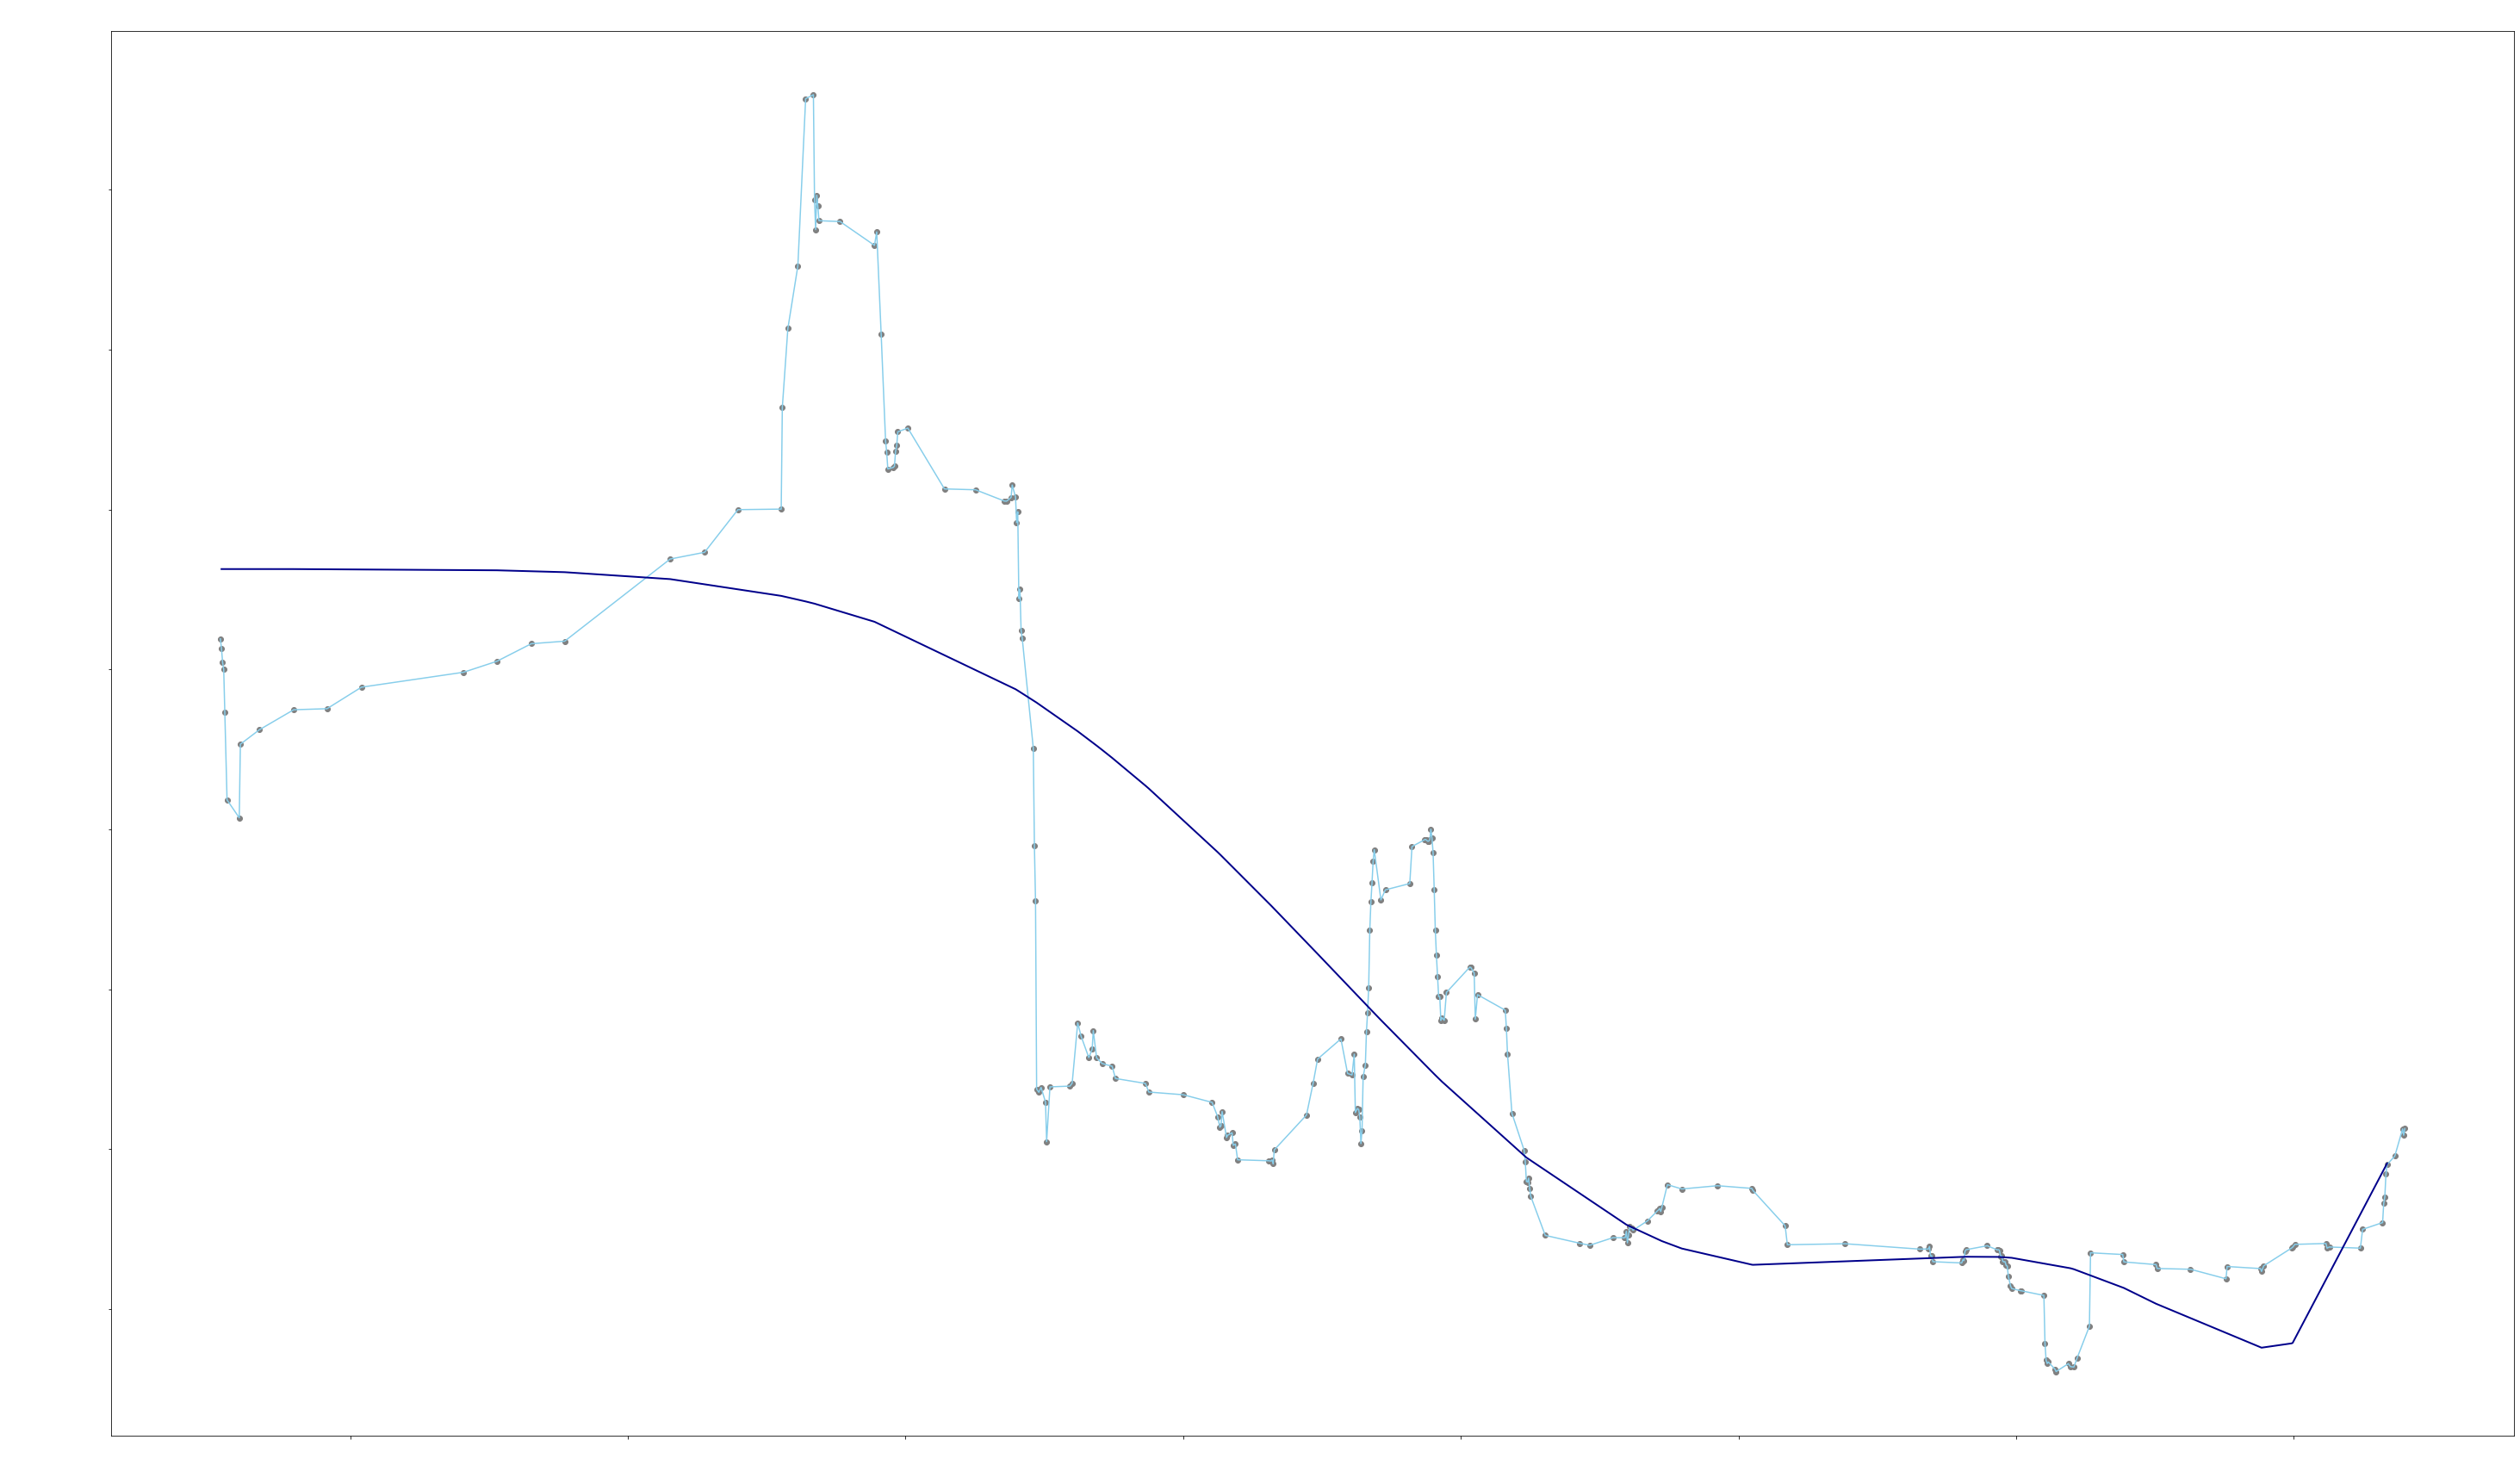

In [0]:
########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_original, y_original, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 10 > ] ##########
polynomial = PolynomialFeatures(degree=10)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 10 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_original, y_original, color='gray')
plt.plot(X_original, y_original, color='skyblue')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_9, y_moving_average_9, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 10 > ] ##########
polynomial = PolynomialFeatures(degree=10)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 10 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_9, y_moving_average_9, color='gray')
plt.plot(X_moving_average_9, y_moving_average_9, color='skyblue')

plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2',)


plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_21, y_moving_average_21, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 10 > ] ##########
polynomial = PolynomialFeatures(degree=10)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 10 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_21, y_moving_average_21, color='gray')
plt.plot(X_moving_average_21, y_moving_average_21, color='skyblue')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_36, y_moving_average_36, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 10 > ] ##########
polynomial = PolynomialFeatures(degree=10)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 3 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_36, y_moving_average_36, color='gray')
plt.plot(X_moving_average_36, y_moving_average_36, color='skyblue')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

THE REGRESSION WITH DEGREE = 30

Linear Regressor performance:
Mean absolute error =  87805.66
Mean squared error =  12285653138.23
Median absolute error =  84569.87
Explained variance score =  -0.58
R2 score =  -0.58


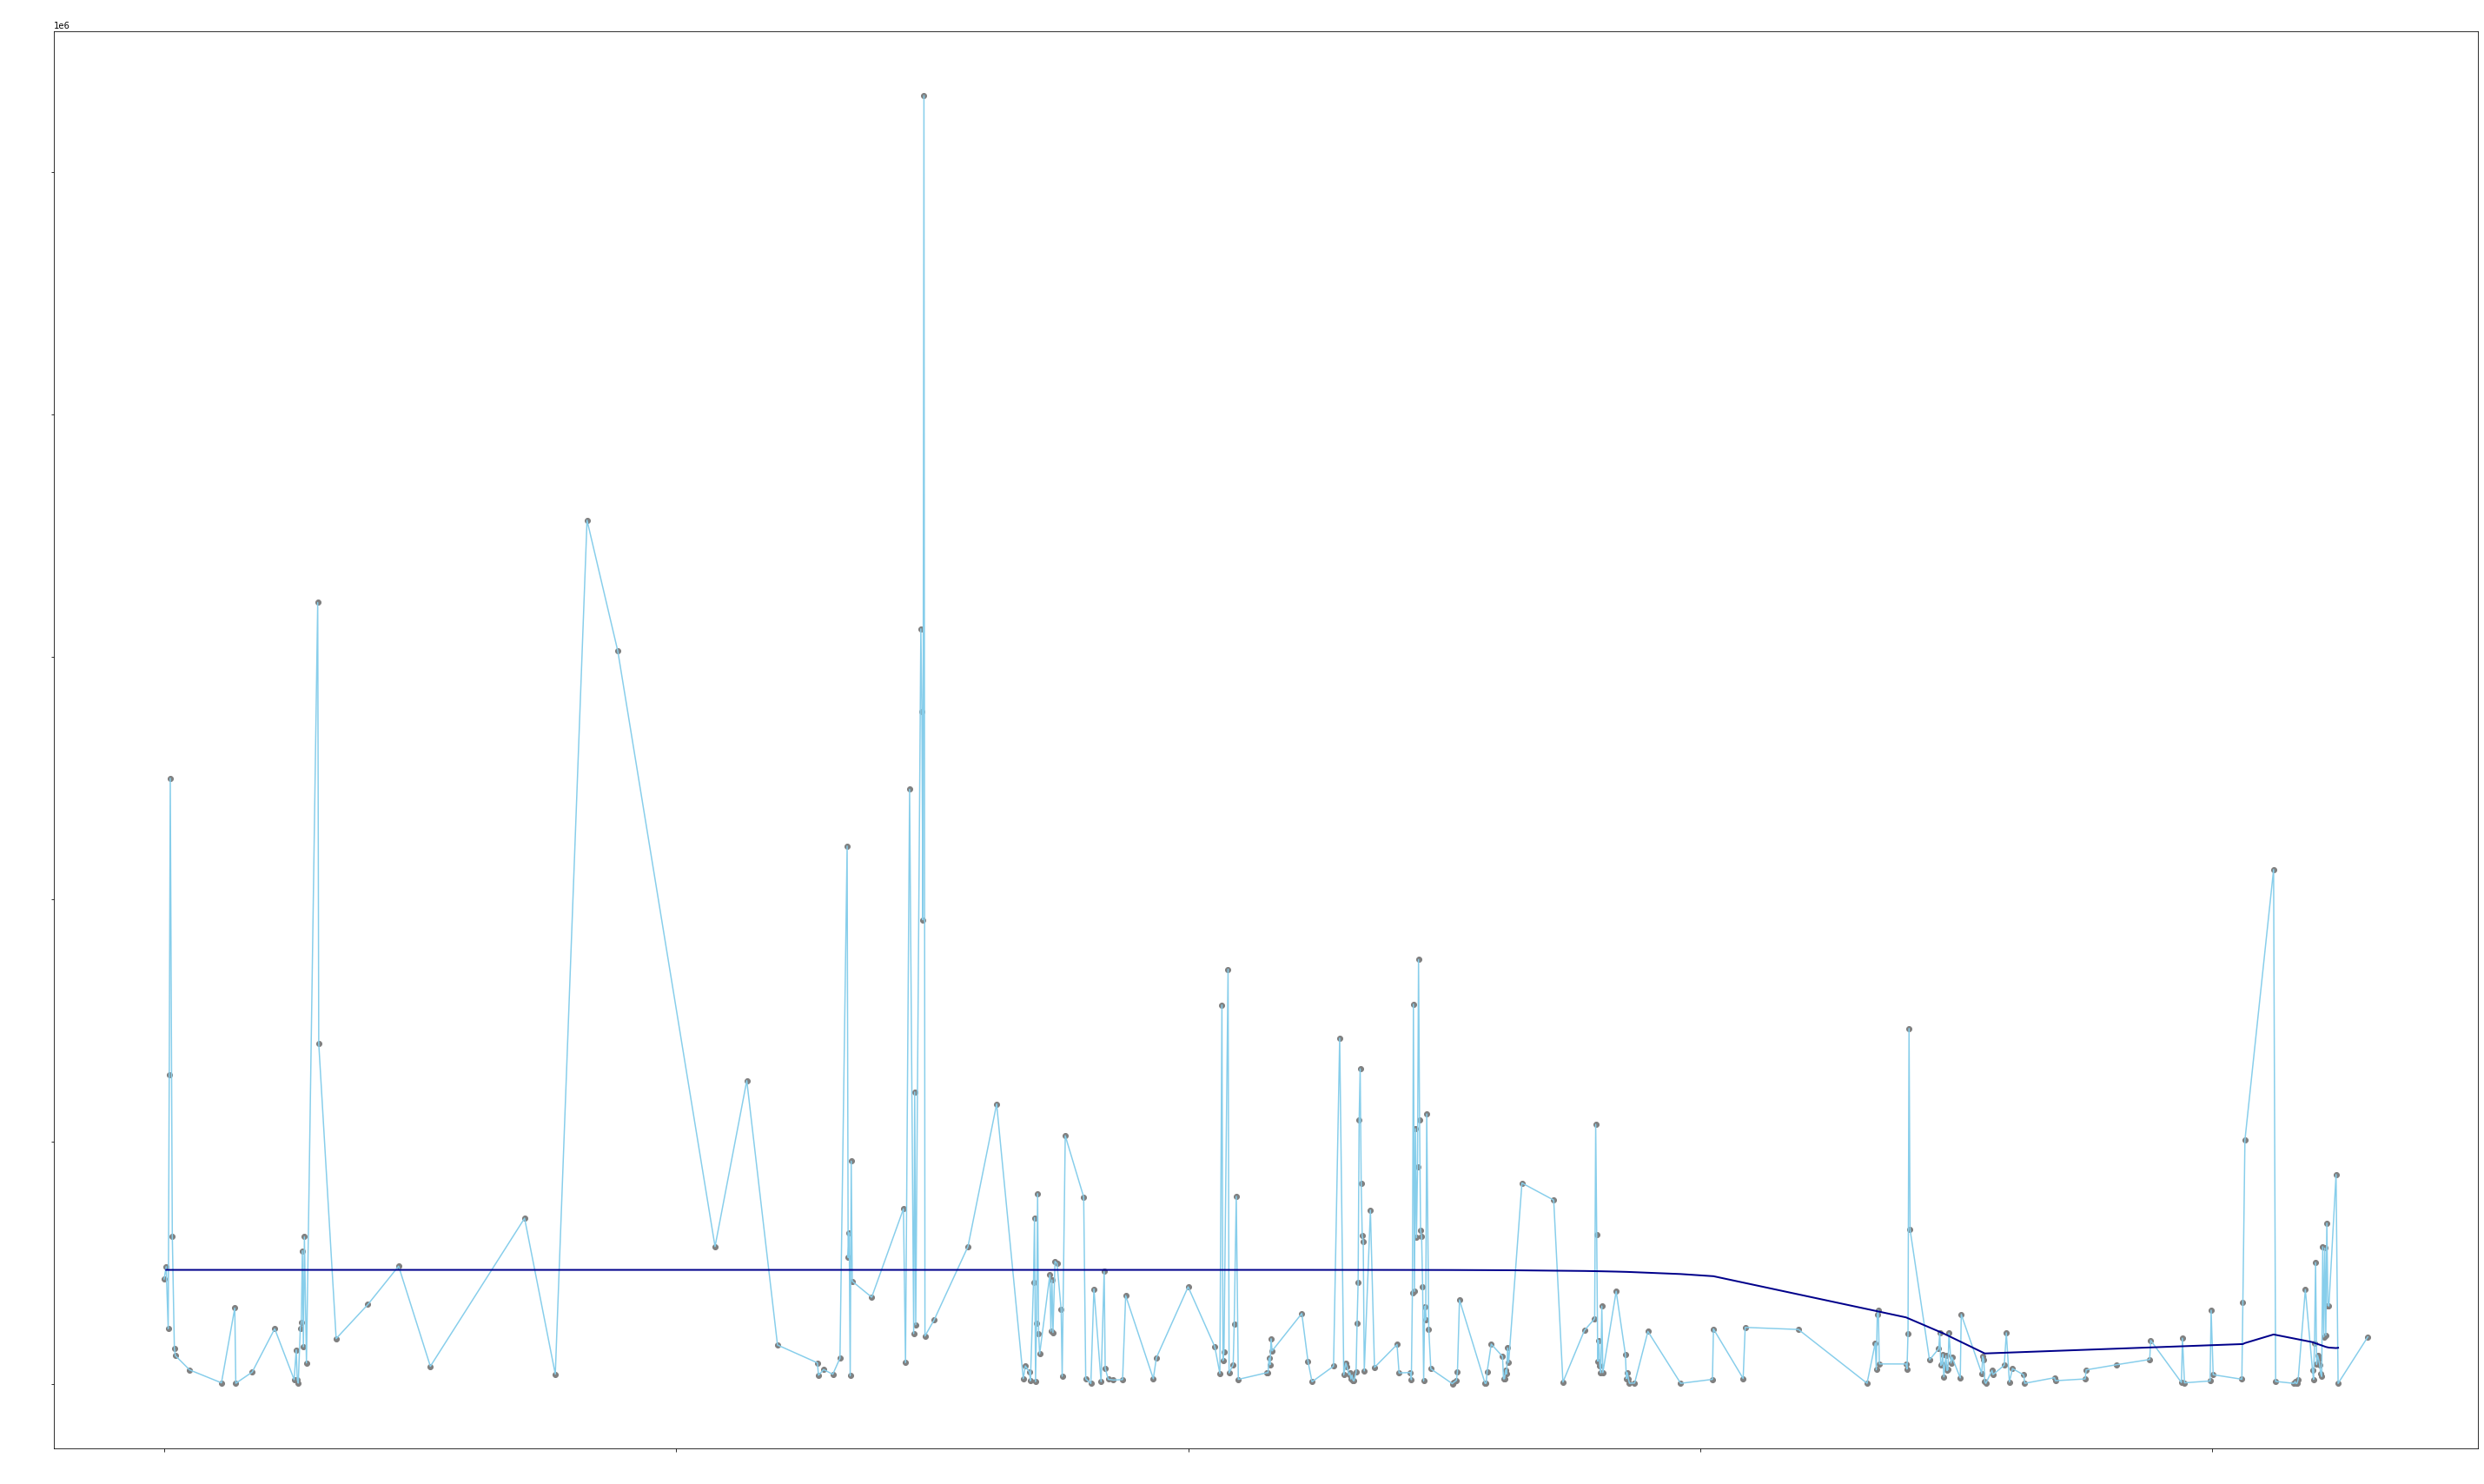

Linear Regressor performance:
Mean absolute error =  85575.06
Mean squared error =  12197167441.96
Median absolute error =  68952.28
Explained variance score =  -0.64
R2 score =  -0.64


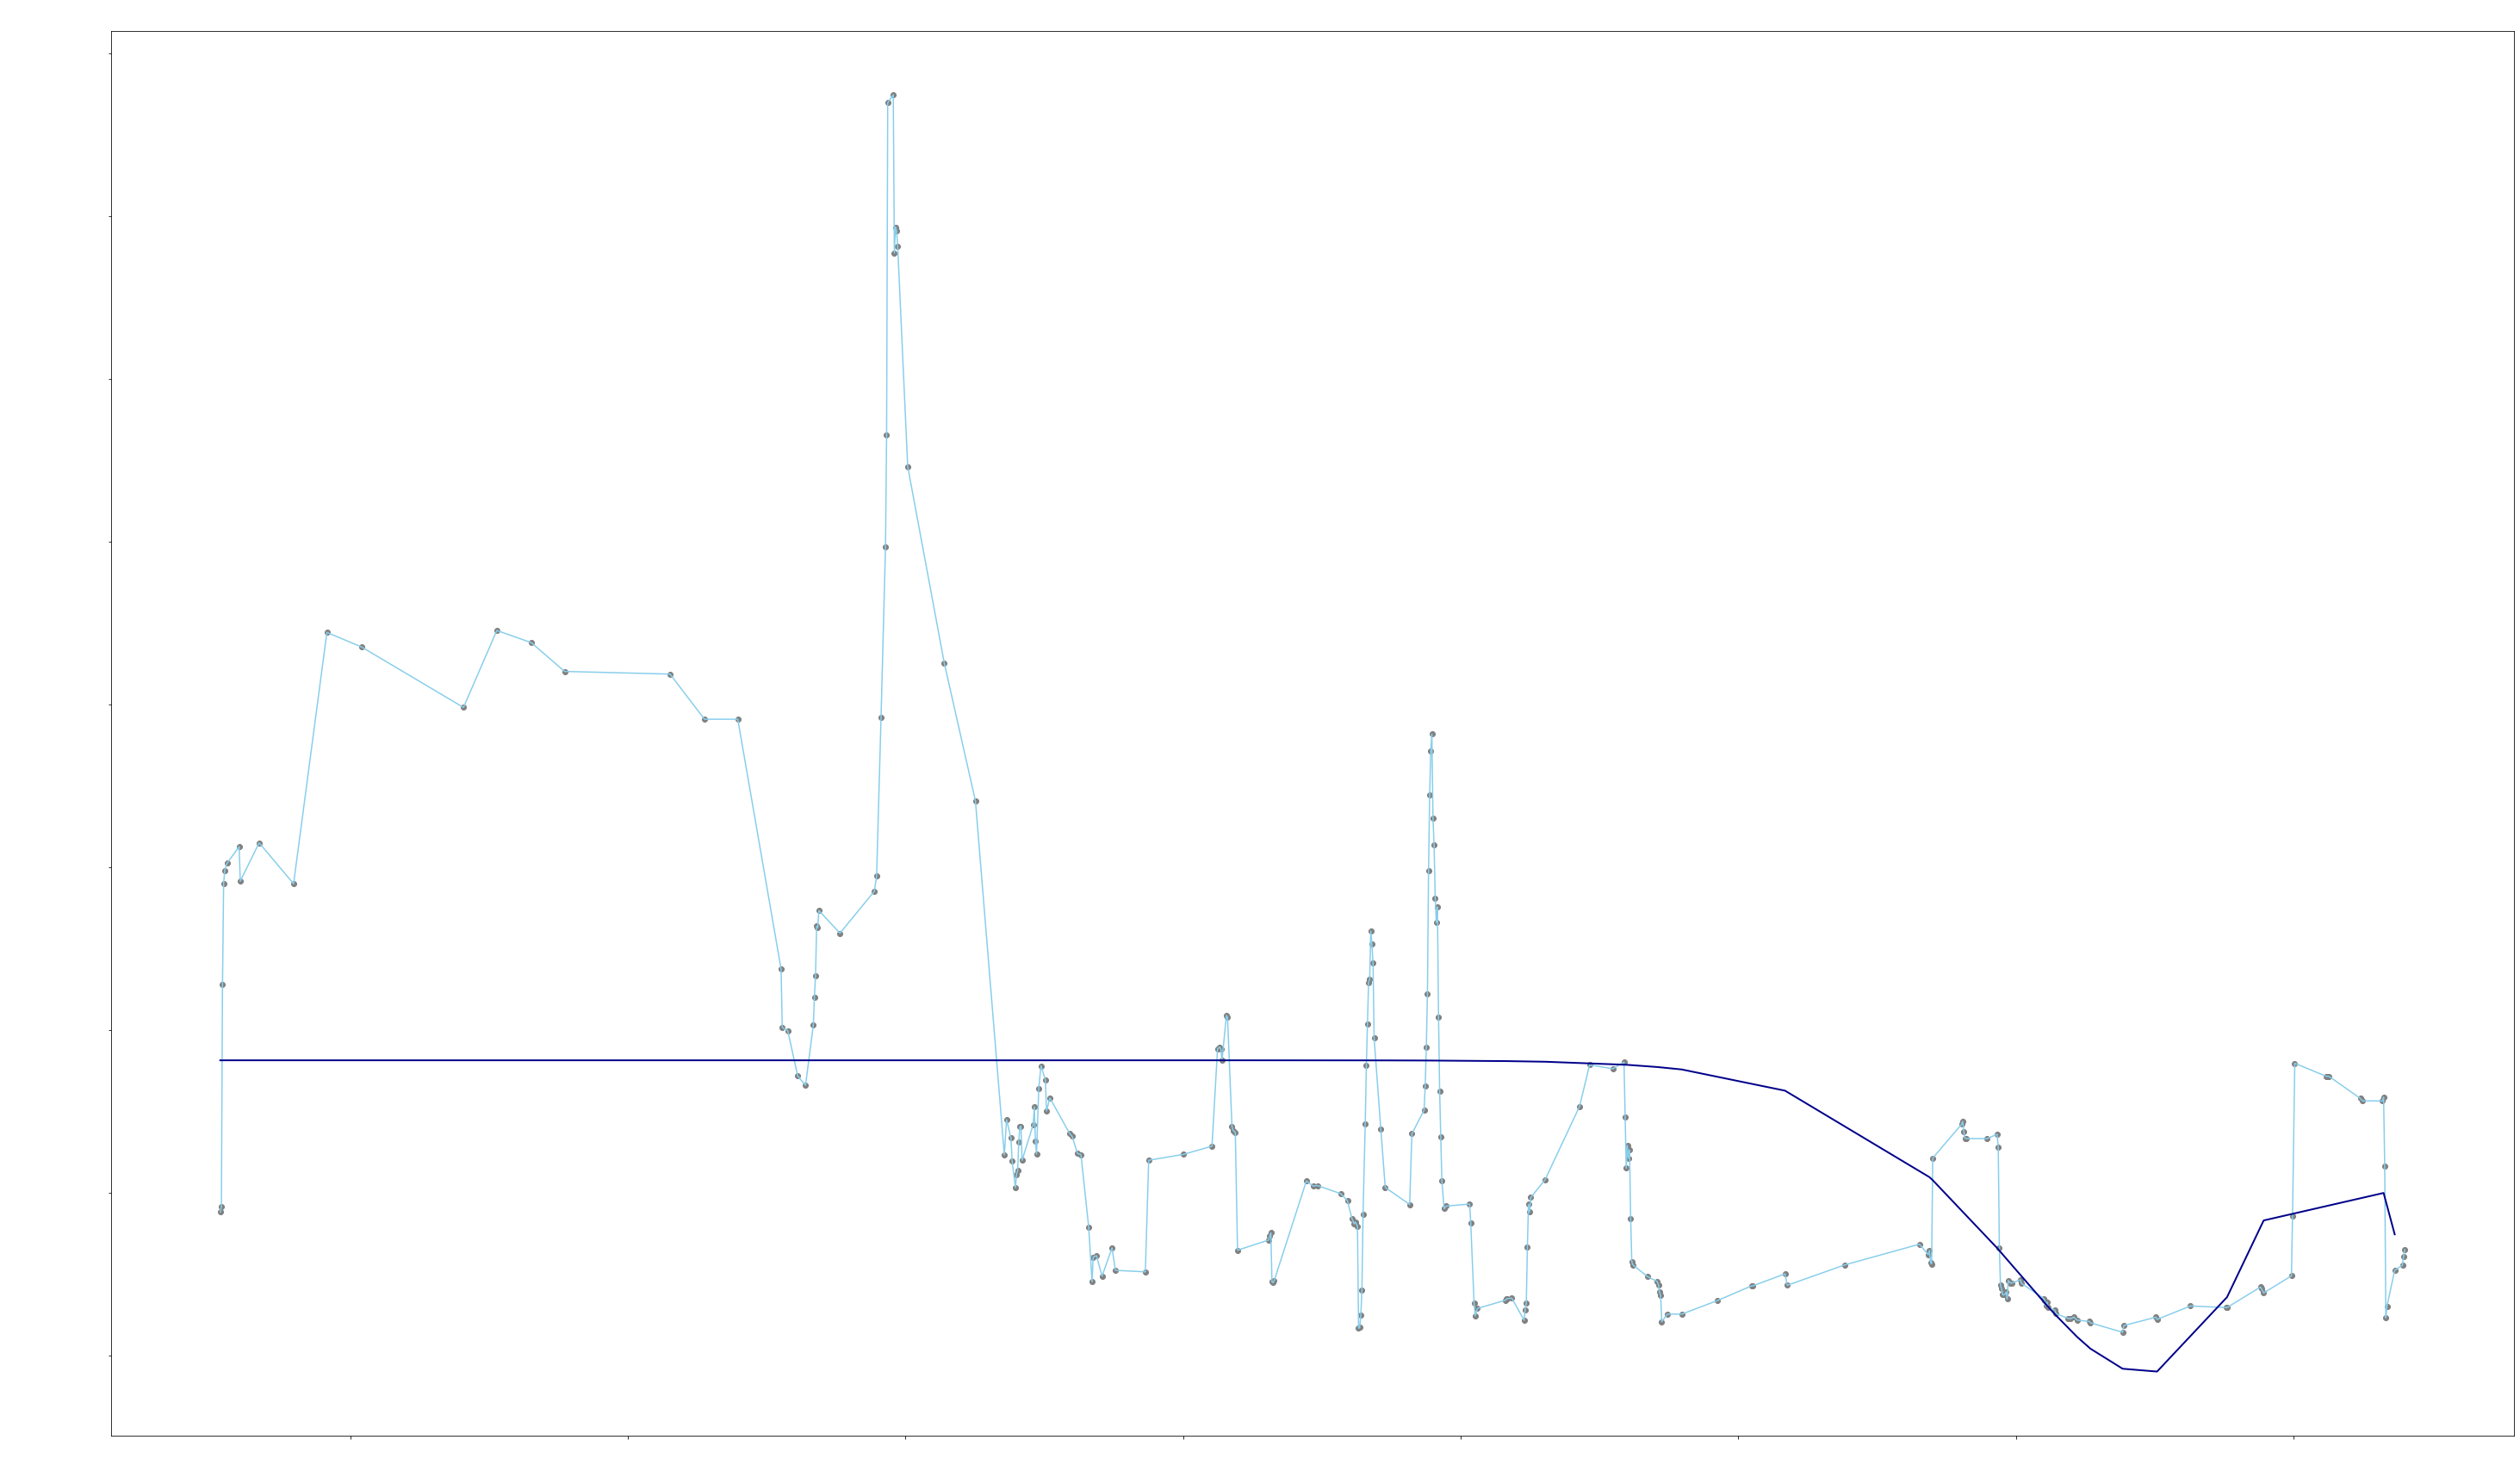

Linear Regressor performance:
Mean absolute error =  59498.14
Mean squared error =  4402310866.94
Median absolute error =  48952.82
Explained variance score =  -0.89
R2 score =  -0.92


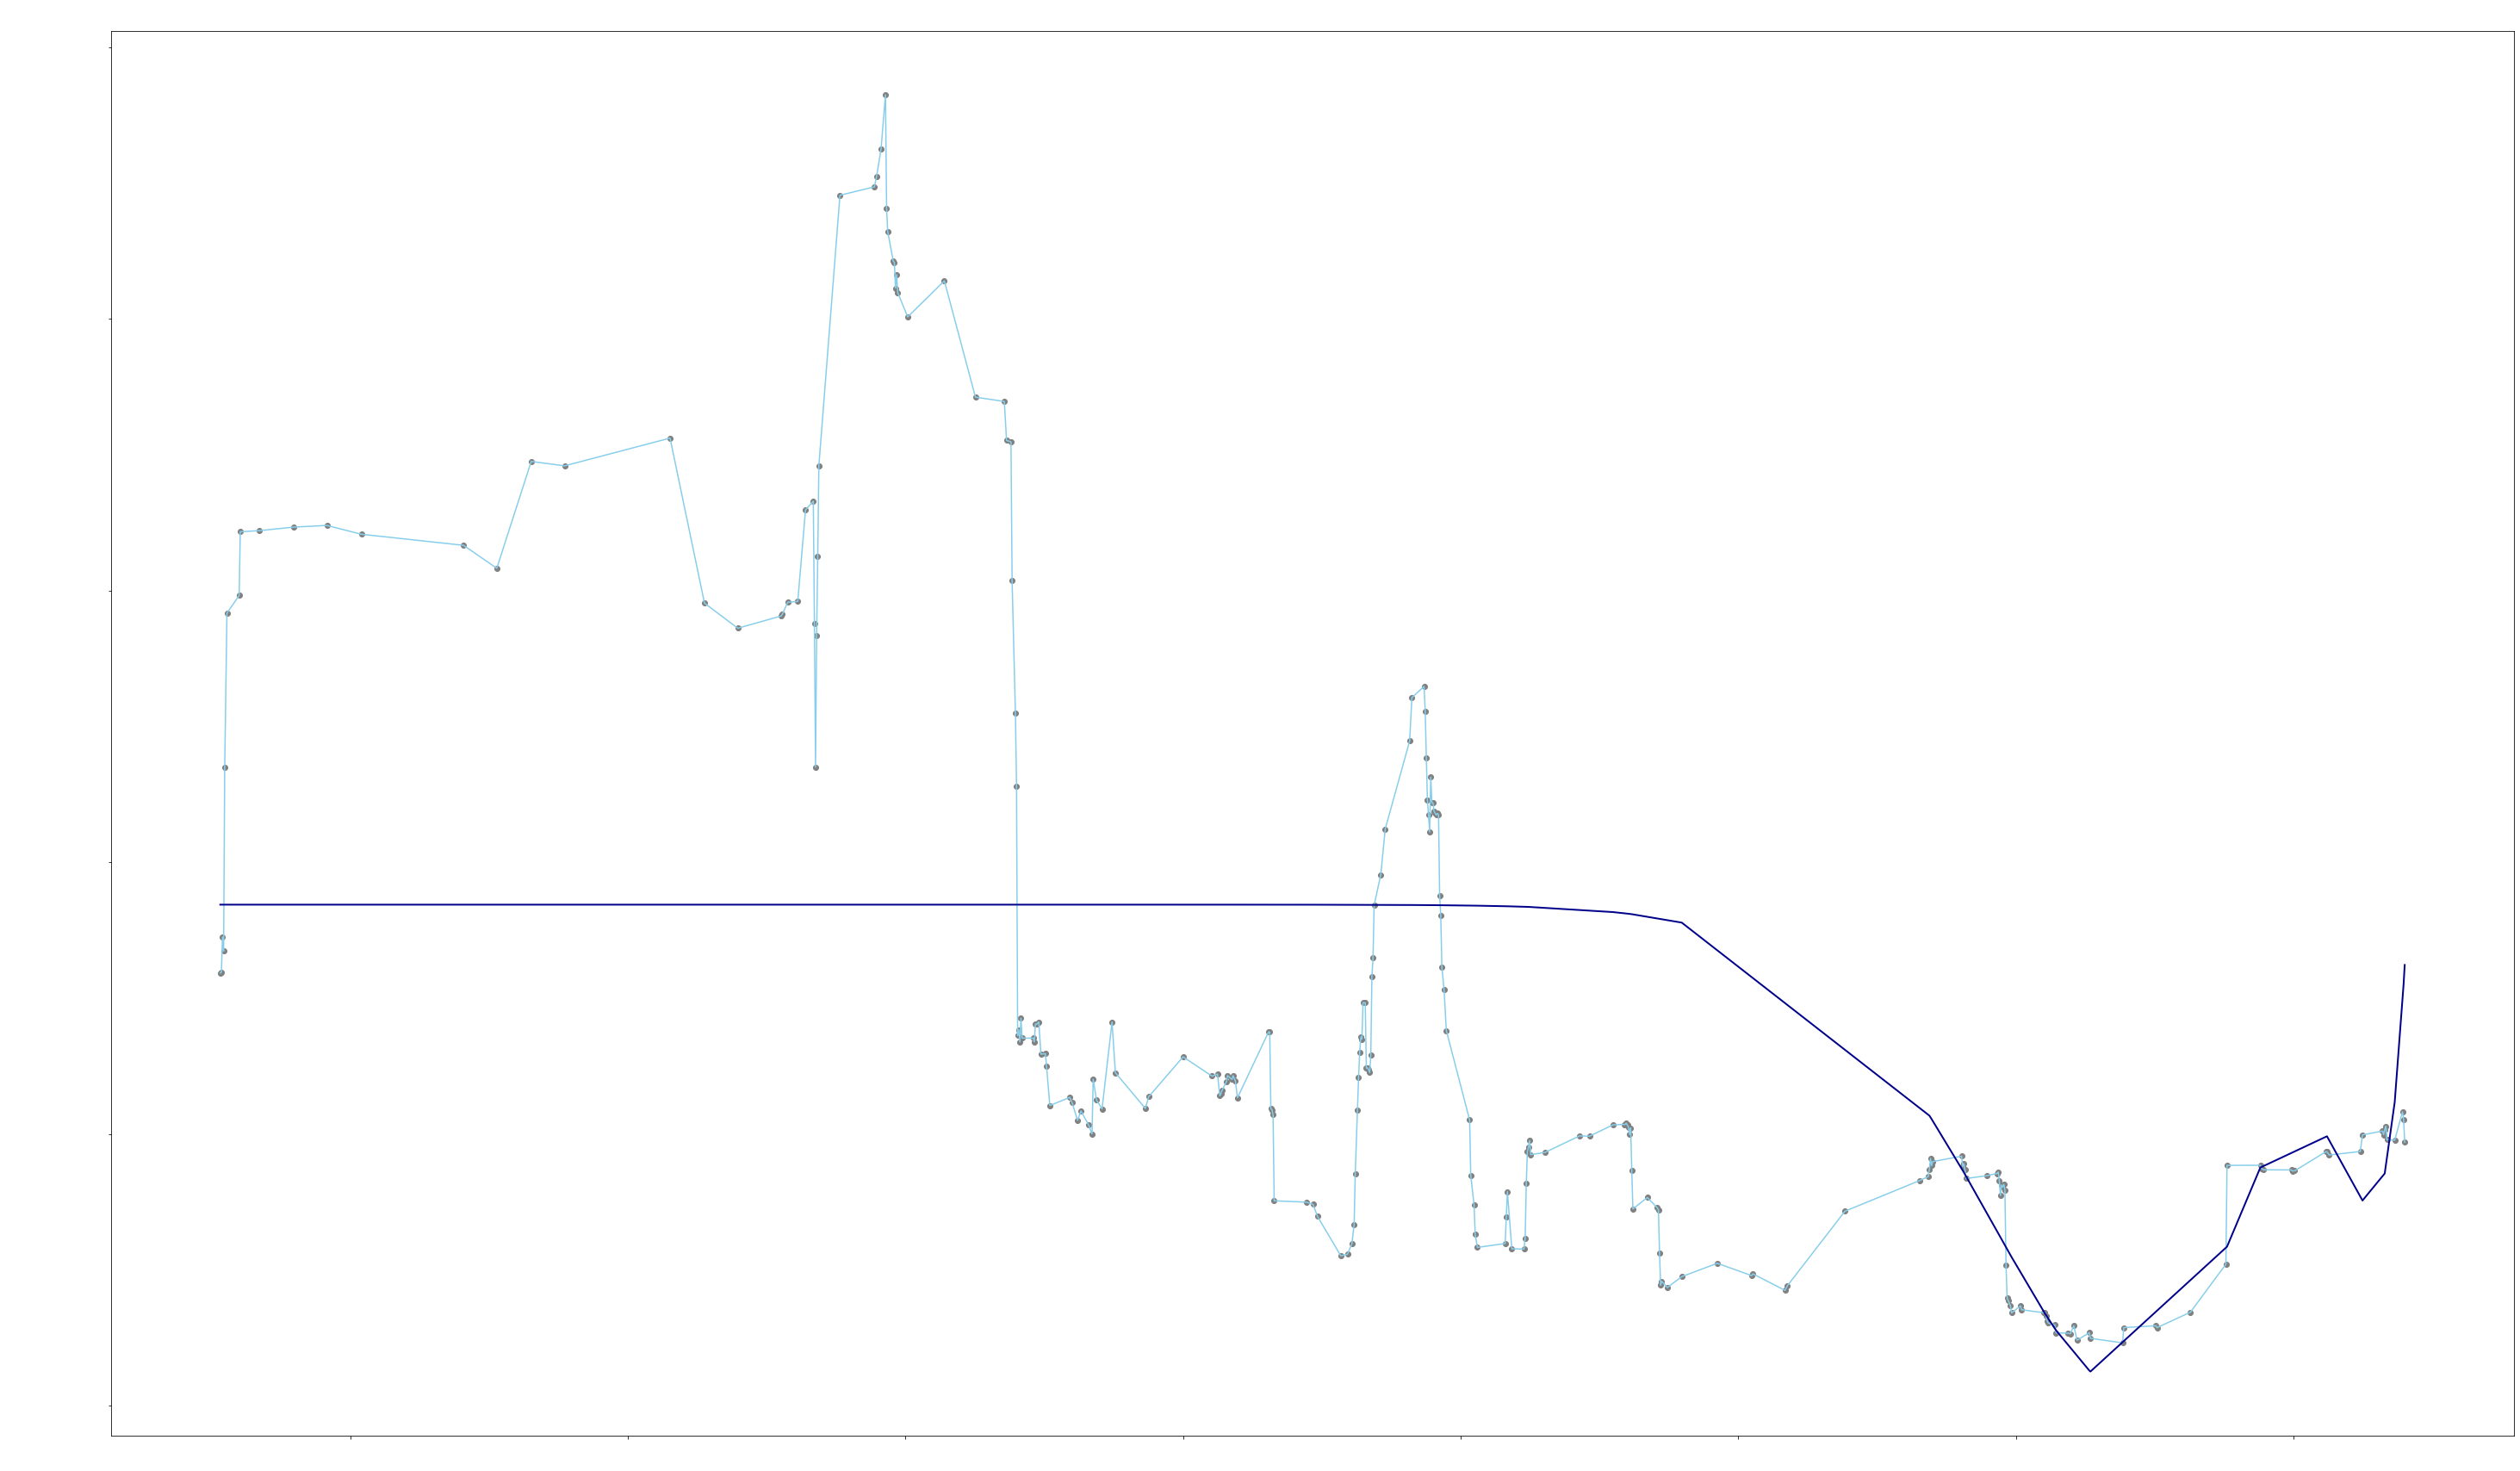

Linear Regressor performance:
Mean absolute error =  56296.28
Mean squared error =  4812059277.26
Median absolute error =  51609.22
Explained variance score =  -1.13
R2 score =  -1.15


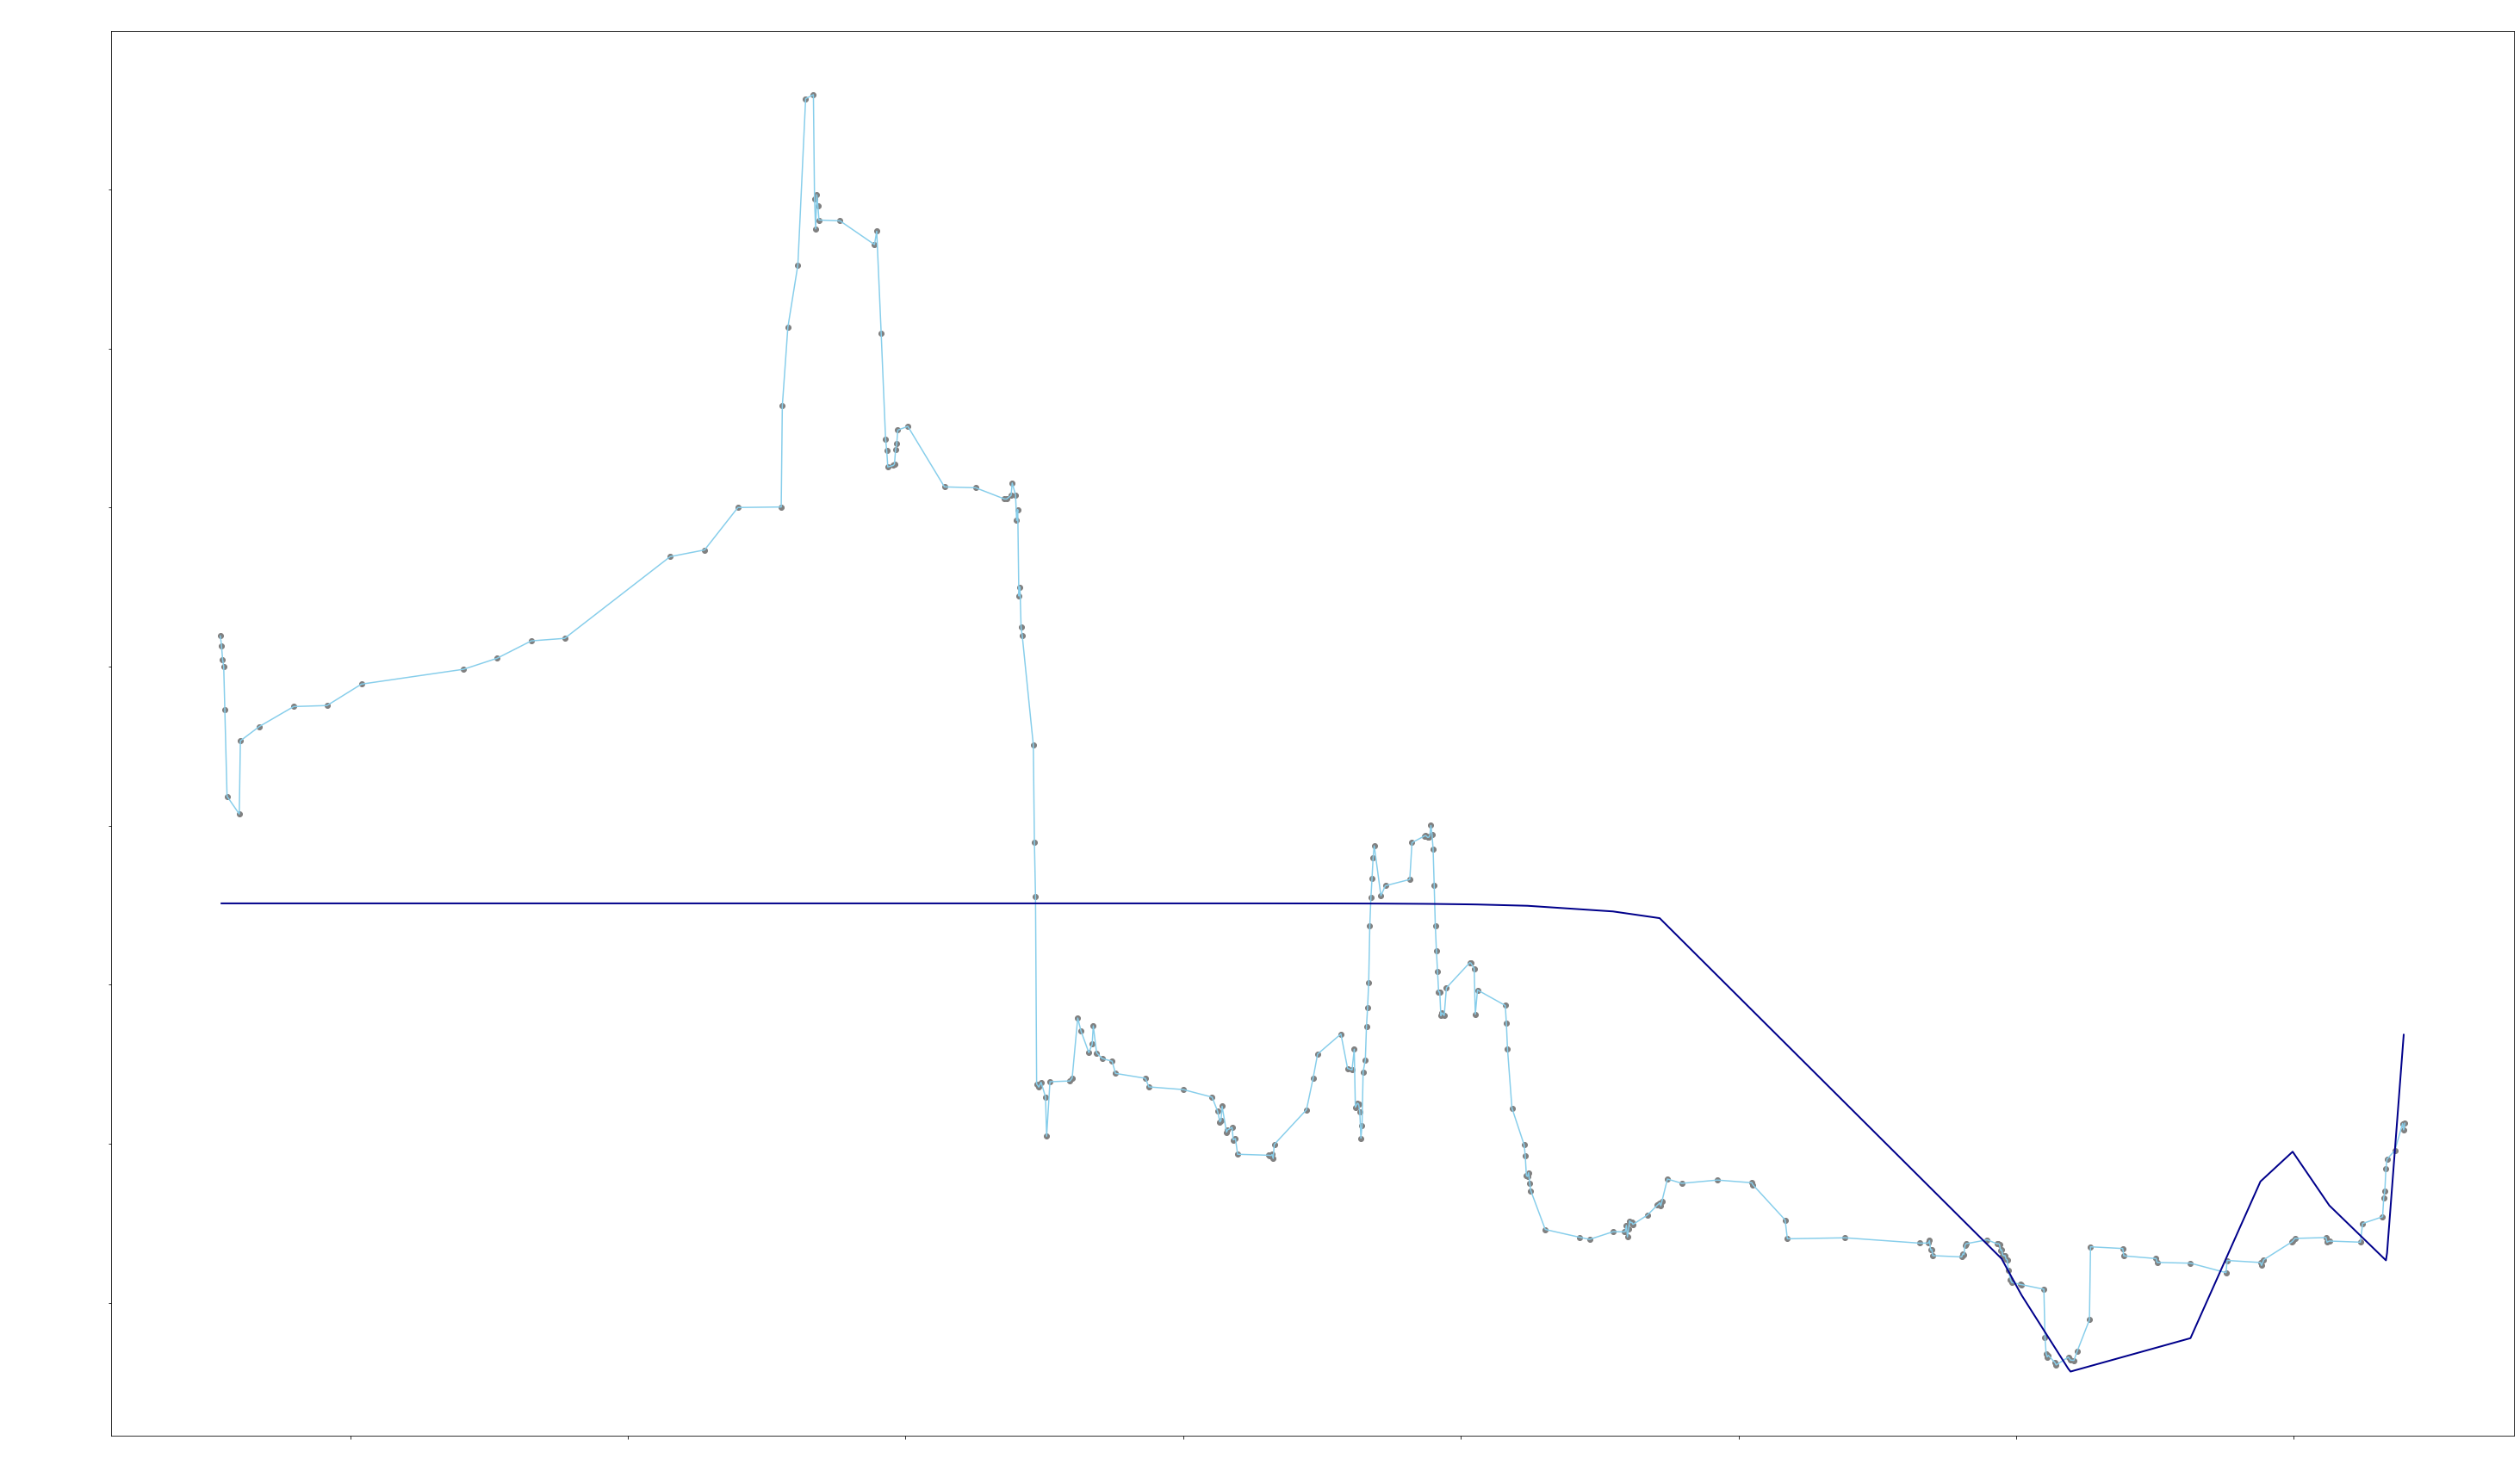

In [0]:
########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_original, y_original, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 30 > ] ##########
polynomial = PolynomialFeatures(degree=30)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 30 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_original, y_original, color='gray')
plt.plot(X_original, y_original, color='skyblue')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_9, y_moving_average_9, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 30 > ] ##########
polynomial = PolynomialFeatures(degree=30)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 30 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_9, y_moving_average_9, color='gray')
plt.plot(X_moving_average_9, y_moving_average_9, color='skyblue')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_21, y_moving_average_21, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 30 > ] ##########
polynomial = PolynomialFeatures(degree=30)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 30 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_21, y_moving_average_21, color='gray')
plt.plot(X_moving_average_21, y_moving_average_21, color='skyblue')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_36, y_moving_average_36, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 30 > ] ##########
polynomial = PolynomialFeatures(degree=30)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 30 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_36, y_moving_average_36, color='gray')
plt.plot(X_moving_average_36, y_moving_average_36, color='skyblue')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()